# Summmary



<p>
Data sets consistings of millions and more observations are exceeding the capacities of a single machine. Based on the Hadoop distributed file system Apache Spark offers a solution for processing large, big data sets by building a virtual machine managing file chunks on distributed worker nodes. The goal here is to apply methods for preparing, cleaning and optimizing data sets. This support a smooth execution with good performance.
</p>

<p>
For getting a better understanding a glossary of common terms is provided below:
</p> 

<p>
<b>Feature engineering</b><br>
"Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself."<br>
<a href="https://en.wikipedia.org/wiki/Feature_engineering" target="_blank">Wikipedia</a> 
</p> 

<p>
<b>Feature selection</b><br>
"In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. The central premise when using a feature selection technique is that the data contains some features that are either redundant or irrelevant, and can thus be removed without incurring much loss of information."<br>
<a href="https://en.wikipedia.org/wiki/Feature_selection" target="_blank">Wikipedia</a> 
</p> 

<p>
<b>Feature extraction</b><br>
"In machine learning, pattern recognition and in image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction."<br>
<a href="https://en.wikipedia.org/wiki/Feature_extraction" target="_blank">Wikipedia</a> 
</p> 


<p>
Some topics and methods applied here in the context of feature engineering are in this project:
</p> 

<ul>
  <li>importing</li>
  <li>setting up Spark</li>
  <li>exploring RDDs</li>
  <li>exploring pyspark.sql.dataframes</li>
  <li>Parquet files</li>
  <li>data visualizations</li>
  <li>Spark.sql</li>
  <li>statistics</li>
  <li>outliers</li>
  <li>data cleaning</li>
  <li>missing values</li>
  <li>Helper functions</li>
  <li>UDFs</li>
  <li>feature scaling</li>
  <li>statistics</li>
  <li>outliers</li>
  <li>data cleaning</li>
  <li>user defined function</li>
  <li>feature scaling</li>
  <li>log transformation</li>
  <li>joining</li>
  <li>feature engineering by creating new features<br>
      from existing ones</li>
  <li>new features from time data<br>
      from existing ones</li> 
  <li>extracting new features from substrings</li> 
  <li>Yes / no filters with binarizing</li> 
  <li>OneHotEncoderEstimator</li>
  <li>Machine learning with pyspark.ml</li>
</ul> 

<p>
There are two data set used here is the real estate data set with the
target variable sales close price. The given label makes the data set
suitable for supervised machine learning.
</p> 

# Import packages

In [1658]:
# IPython
from IPython.display import display, HTML, display_html 
#usefull to display wide tables

# base packages
import numpy as np
import pandas as pd
import time
from time import time
from datetime import timedelta
import math
import random
import pathlib
import inspect
from datetime import datetime
from glob import glob
import matplotlib.pyplot as plt
from scipy import stats

# pyspark
from pyspark.sql import DataFrame
from pyspark.rdd import RDD
# from pyspark.sql.types import *
from pyspark.sql.types import StructType, StructField, IntegerType, \
StringType, BooleanType, DateType, FloatType
from pyspark.sql.functions import lower, col, concat, col, lit
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.rdd import RDD
import pyspark.sql.functions as F
from pyspark.sql.functions import *
# from pyspark.sql.functions import datediff, to_date, lit
from pyspark.sql.functions import isnan, when, count, col
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import GBTRegressor

# from pyspark.sql.functions import mean, stddev , col, avg, round
# from pyspark.sql.functions import isnan
# from pyspark.sql.functions import broadcast
# from pyspark.sql.functions import *
# import pyspark.sql.functions as f

# machine learning in spark has got different libraries
# for different data objects

# machine learning on dataframes
# is based on pyspark.ml
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Binarizer
from pyspark.ml.feature import Binarizer, Bucketizer, \
OneHotEncoder, StringIndexer


# machine learning on RDDs
# is based pyspark.mllib
from pyspark.ml.regression import RandomForestRegressor


# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pyspark_dist_explore import Histogram, hist, distplot, \
pandas_histogram

from handyspark import *

print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext lo64)
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree 

In [1659]:
import matplotlib as mpl
from cycler import cycler
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [1660]:
plt.style.use('ggplot')
plt.style.use('classic')


# Inspect working directory

In [1661]:
cwd = os.getcwd()
# print(cwd)

cwd_path = pathlib.Path.cwd()
# print(cwd_path)

home_path = pathlib.Path.home()
# print(home_path)

# Spark

### Spark context

In [1662]:
print("Spark version: {}".format(sc.version))
print("Python version: {}".format(sc.pythonVer))
print("Spark master: {}".format(sc.master))
# print("Spark user: {}".format(sc.sparkUser))
print("Application name: {}".format(sc.appName))
# print("Application id: {}".format(sc.applicationId))
print("Parllelism: {}".format(sc.defaultParallelism))


Spark version: 3.0.0-preview
Python version: 3.7
Spark master: local[*]
Application name: PySparkShell
Parllelism: 4


# Spark

### Spark context

In [1663]:
print("Spark version: {}".format(sc.version))
print("Python version: {}".format(sc.pythonVer))
print("Spark master: {}".format(sc.master))
# print("Spark user: {}".format(sc.sparkUser))
print("Application name: {}".format(sc.appName))
# print("Application id: {}".format(sc.applicationId))
print("Parllelism: {}".format(sc.defaultParallelism))


Spark version: 3.0.0-preview
Python version: 3.7
Spark master: local[*]
Application name: PySparkShell
Parllelism: 4


### Spark session

<p>
<b>Spark Configuration</b><br>
from pyspark.sql import SparkSession<br>
spark = SparkSession.builder<br>
.appName("Python Spark regression example")<br>
.config("config.option", "value").getOrCreate()<br>
</p> 

### Spark session

In [1664]:
# this is for example needed to activate the SQL-api
spark_session = SparkSession.builder.appName("realEstate").\
getOrCreate()
print(spark_session)
print(spark_session.catalog.currentDatabase())
print(spark_session.catalog.listTables())

default
[Table(name='estate5', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate5_table', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate6_table', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate5_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='estate6_windows', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='estate_sql', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='geo_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='scores_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


# Import data

In [1665]:
realEstate = spark.read.csv('2017_StPaul_MN_Real_Estate.csv', header=True,
                            sep=",", inferSchema=True)
print(type(realEstate))

<class 'pyspark.sql.dataframe.DataFrame'>


The underlying RDD is accessed with the rdd method.
The RDD or Resilient Distributed Dataset is the first citizen
of Apache Spark or a an immutable distributed collection
of data partioned over some machines residing in a cluster.
The SQL API of Sparks connects SQL-queries to the partioned data.
In does this without performance losses.

In [1666]:
realEstate_rdd_1 = realEstate.rdd
print(type(realEstate_rdd_1))

<class 'pyspark.rdd.RDD'>


In [1667]:
data_file  = "2017_StPaul_MN_Real_Estate.csv"
realEstate_rdd_2 = sc.textFile(data_file)

# Explore the data

<p>
This project uses structured data fitting into a tabular format
like data frames. RDDs are better suited to work with semi-unstructured data like JSON or HTML or XML or even more specific data types. Data is considered here as semi-unstructured, when it is not in tabular formats, but is equipped with tags like in HTML-tags.
</p>

<p>
This is actually a strength of RDDs as most of the "Big Data" generated constantly is unstructured and often in text formats. On the other hand if the data is in a tabular format naturally the data frame, SQL APIs offer
more options to query and analyse the data.
</p>

<p>
Anyway let's explore first the underlying RDD using domain-specific language.
</p> 

#### Explore pyspark.rdd.RDD

Showing the first row of the rdd created with realEstate.rdd

Showing the first row of the rdd created with sc.textFile

In [1668]:
realEstate_rdd_2.cache().first()

'No.,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation'

What you can see on the representation above is that the RDDs 
are row orientated and not tabular. The first method takes one row from the RDD like shown above.
You can also see that the .rdd method creates an RDD in key-value-pair
format aligned with the tabular structure of the Spark data frame 
and the sc.textFile function creates a text consisting of strings.
This is the core RDD representation. The text can be treated as 
a text corpus and with string methods manipulated.

In [1669]:
realEstate_rdd_2.count()

5001

There are different ways to simulate taking a subset from an RDD by
applying operation functions on the RDD.

In [1670]:
# This prints out the first 300 letters of the RDD
subset_1 = realEstate_rdd_2.groupBy(lambda x: x[:300])
print(type(subset_1))
print(subset_1.first())

<class 'pyspark.rdd.PipelinedRDD'>
('No.,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFl', <pyspark.resultiterable.ResultIterable object at 0x0000023968BCD548>)


The user defined function below streamlines the text of the RDD.

In [1671]:
def streamline(row):
      # makes the text in the row to lower case
      row = row.lower()
      # splits every row
      row = row.split(",")
      return row


In [1672]:
# maps the function in functional programming style on the rows
rdd_3 = realEstate_rdd_2.map(streamline)
# f'Hello, {name}!'
print (f'number of rows: {rdd_3.count()}')
rdd_3.take(1)

number of rows: 5001


[['no.',
  'mlsid',
  'streetnumbernumeric',
  'streetaddress',
  'streetname',
  'postalcode',
  'stateorprovince',
  'city',
  'salescloseprice',
  'listdate',
  'listprice',
  'listtype',
  'originallistprice',
  'pricepertsft',
  'foundationsize',
  'fence',
  'mapletter',
  'lotsizedimensions',
  'schooldistrictnumber',
  'daysonmarket',
  'offmarketdate',
  'fireplaces',
  'roomarea4',
  'roomtype',
  'roof',
  'roomfloor4',
  'potentialshortsale',
  'pooldescription',
  'pdom',
  'garagedescription',
  'sqftaboveground',
  'taxes',
  'roomfloor1',
  'roomarea1',
  'taxwithassessments',
  'taxyear',
  'livingarea',
  'unitnumber',
  'yearbuilt',
  'zoning',
  'style',
  'acres',
  'coolingdescription',
  'appliances',
  'backonmarketdate',
  'roomfamilychar',
  'roomarea3',
  'exterior',
  'roomfloor3',
  'roomfloor2',
  'roomarea2',
  'diningroomdescription',
  'basement',
  'bathsfull',
  'bathshalf',
  'bathquarter',
  'bathsthreequarter',
  'class',
  'bathstotal',
  'bathdes

The commas in the second row above are due to the original text.
Filtering the RDD with a search term returns every row, where
the search term appears.

#### How to get nth row of Spark RDD?

<p>
RDD.collect() and RDD.take(x) both return a list, which supports indexing.
</p> 

<a href="https://stackoverflow.com/questions/27826174/how-to-get-nth-row-of-spark-rdd" target="_blank">Stackoverflow</a> 

In [1673]:
rdd_3=rdd_3.filter(lambda x: x is not None).filter(lambda x: x != "")

In [1674]:
rdd_3.take(5)[5-1]

['4',
 'rmls',
 '9350',
 '9350 31st st n',
 '31st',
 '55042',
 'mn',
 'lelm - lake elmo',
 '265000',
 '8/25/2017 0:00',
 '230000',
 'exclusive right',
 '230000',
 '162.3775',
 '959',
 'none',
 'a1',
 '208x208',
 '834 - stillwater',
 '19',
 '9/13/2017 0:00',
 '1',
 '12x16',
 '"living room',
 ' dining room',
 ' family room',
 ' kitchen',
 ' first (1st) bedroom',
 ' second (2nd) bedroom',
 ' third (3rd) bedroom',
 ' fourth (4th) bedroom',
 ' office',
 ' office',
 ' deck"',
 '"asphalt shingles',
 ' pitched',
 ' age 8 years or less"',
 'main',
 'no',
 'none',
 '19',
 '"attached garage',
 ' detached garage',
 ' tuckunder',
 ' driveway - gravel"',
 '1284',
 '2146',
 '',
 '',
 '2146',
 '2017',
 '1632',
 '',
 '1960',
 'residential-single',
 '(sf) one story',
 '0.94',
 'central',
 '"range',
 ' washer',
 ' dryer"',
 '',
 'main level',
 '25x13',
 'stucco',
 'main',
 'main',
 '20x11',
 '',
 '"full',
 ' partial finished',
 ' drain tiled',
 ' sump pump"',
 '1',
 '1',
 '0',
 '0',
 'sf',
 '2',
 '"main 

#### flatMap

<p>
applies a function and then returns an unnested or "flattened" list
of (word) elements.
</p> 

In [1675]:
rdd4 = realEstate_rdd_2.flatMap(streamline)

print(f'number of elements: {rdd4.count()}')
print(rdd4.take(30))

# Instead of 5000 rows the unnested 476613 elements.

number of elements: 476613
['no.', 'mlsid', 'streetnumbernumeric', 'streetaddress', 'streetname', 'postalcode', 'stateorprovince', 'city', 'salescloseprice', 'listdate', 'listprice', 'listtype', 'originallistprice', 'pricepertsft', 'foundationsize', 'fence', 'mapletter', 'lotsizedimensions', 'schooldistrictnumber', 'daysonmarket', 'offmarketdate', 'fireplaces', 'roomarea4', 'roomtype', 'roof', 'roomfloor4', 'potentialshortsale', 'pooldescription', 'pdom', 'garagedescription']


In 4937 rows of 5000 the word dishwasher appears.

In [1676]:
filter_2 = rdd4.filter(lambda x: 'dishwasher' in x)
print(type(filter_2))
print(filter_2.count())

<class 'pyspark.rdd.PipelinedRDD'>
3796


Out of 339023 words in total word dishwasher appears 3796 times.

#### Key-value-pairs

<p>
Creating key-value pairs where every word in the text
builds a key and the value 1 is added to this key.
</p> 

In [1677]:
rdd4=rdd4.filter(lambda x: x is not None).filter(lambda x: x != "")
rdd4_keyValue = rdd4.map(lambda x: (x,1))

print(type(rdd4_keyValue))
rdd4_keyValue.take(10)

<class 'pyspark.rdd.PipelinedRDD'>


[('no.', 1),
 ('mlsid', 1),
 ('streetnumbernumeric', 1),
 ('streetaddress', 1),
 ('streetname', 1),
 ('postalcode', 1),
 ('stateorprovince', 1),
 ('city', 1),
 ('salescloseprice', 1),
 ('listdate', 1)]

groupByKey does what it says. It groups equal keys together.
The values are here lists of 1. 

In [1678]:
rdd4_grouped = rdd4_keyValue.groupByKey()

print(type(rdd4_grouped))
print(rdd4_grouped.count())
print(list((j[0], list(j[1])) for j in rdd4_grouped.take(10)))

<class 'pyspark.rdd.PipelinedRDD'>
25429
[('no.', [1]), ('streetnumbernumeric', [1]), ('streetaddress', [1]), ('postalcode', [1]), ('salescloseprice', [1]), ('listtype', [1]), ('pricepertsft', [1]), ('foundationsize', [1]), ('fence', [1]), ('lotsizedimensions', [1])]


#### Filter

In [1679]:
filter_1 = rdd_3.filter(lambda x: 'exclusive right' in x)
print(type(filter_1))
print(f"The word 'exclusive right' appears in {filter_1.count()} rows.")

<class 'pyspark.rdd.PipelinedRDD'>
The word 'exclusive right' appears in 4937 rows.


In [1680]:
kitchen = \
rdd4_keyValue.filter(lambda x: x[0] ==' kitchen').collect()
print(f"The word kitchen appears in {len(kitchen)} rows.")

asphalt = \
rdd4_keyValue.filter(lambda z: z[0] == 'asphalt shingles').collect()
print(f"The word asphalt appears in {len(asphalt)} rows.")

The word kitchen appears in 4999 rows.
The word asphalt appears in 1417 rows.


In [1681]:
rdd5 = rdd4_grouped.filter(lambda x: x is not None).\
filter(lambda x: x != "")
print(rdd4_grouped.count())
print(rdd5.count())

25429
25429


\# Py4JJavaError<br>
\# trying to sum the frequency of every key or word<br>
rdd6_wordfreq = \ <br>
rdd5.mapValues(sum).map(lambda x: (x[1],x[0])).sortByKey(False)<br>
\# AttributeError: 'NoneType' object has no attribute '_jvm'

#### Distinct

In [1682]:
distinct_1 = rdd4.distinct()
print(len(distinct_1.collect()))
# There are 25430 distinct words in the flattened output.

25429


#### Explore pyspark.sql.dataframe.DataFrame

In [1683]:
obs_n = realEstate.count()
n_vari = len(realEstate.columns)

print(f"shape: variables: {n_vari}, observations {obs_n}")

cols = realEstate.columns
print(cols[:10])

shape: variables: 74, observations 5000
['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE']


In [1684]:
realEstate.printSchema()

root
 |-- No.: integer (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: integer (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: integer (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: integer (nullable = true)
 |-- LISTDATE: string (nullable = true)
 |-- LISTPRICE: integer (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: integer (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: integer (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: integer (nullable = true)
 |-- offmarketdate: string (nullable = true)
 |-- Fireplaces: integer (nullable = true)
 |-- RoomArea4: string (nullable =

In [1685]:
print(realEstate.head(1))

[Row(No.=1, MLSID='RMLS', StreetNumberNumeric=11511, streetaddress='11511 Stillwater Blvd N', STREETNAME='Stillwater', PostalCode=55042, StateOrProvince='MN', City='LELM - Lake Elmo', SalesClosePrice=143000, LISTDATE='7/15/2017 0:00', LISTPRICE=139900, LISTTYPE='Exclusive Right', OriginalListPrice=139900, PricePerTSFT=145.9184, FOUNDATIONSIZE=980, FENCE='Other', MapLetter='C4', LotSizeDimensions='279X200', SchoolDistrictNumber='834 - Stillwater', DAYSONMARKET=10, offmarketdate='7/30/2017 0:00', Fireplaces=0, RoomArea4='12 x  9', roomtype='Living Room, Dining Room, Family Room, Kitchen, First (1st) Bedroom, Second (2nd) Bedroom, Third (3rd) Bedroom, Fourth (4th) Bedroom, Deck', ROOF=None, RoomFloor4='Main', PotentialShortSale='No', PoolDescription=None, PDOM=10, GarageDescription='Attached Garage', SQFTABOVEGROUND=980, Taxes=1858, RoomFloor1='Main', RoomArea1='16 x 13', TAXWITHASSESSMENTS=1858.0, TAXYEAR=2017, LivingArea=980, UNITNUMBER=None, YEARBUILT=1950, ZONING='Residential-Single',

In [1686]:
# NO. the point in number must be escaped otherwise it does not work
# the better solution is here to rename the column
realEstate = realEstate.withColumnRenamed('No.', 'number')

In [1687]:
realEstate.select(['number', 'MLSID', 'StreetNumberNumeric', 
                   'streetaddress', 'City']).show(5)

+------+-----+-------------------+--------------------+----------------+
|number|MLSID|StreetNumberNumeric|       streetaddress|            City|
+------+-----+-------------------+--------------------+----------------+
|     1| RMLS|              11511|11511 Stillwater ...|LELM - Lake Elmo|
|     2| RMLS|              11200|     11200 31st St N|LELM - Lake Elmo|
|     3| RMLS|               8583|8583 Stillwater B...|LELM - Lake Elmo|
|     4| RMLS|               9350|      9350 31st St N|LELM - Lake Elmo|
|     5| RMLS|               2915|   2915 Inwood Ave N|LELM - Lake Elmo|
+------+-----+-------------------+--------------------+----------------+
only showing top 5 rows



In [1688]:
print(type(realEstate.dtypes))
realEstate.dtypes[:5]
# dtypes produces a list of tuples
# a list can be iterated

<class 'list'>


[('number', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string')]

In [1689]:
# select column names of type int
# below names are used to select columns
int_cols = \
[ i[0] for i in realEstate.dtypes if i[1].startswith('int')]
print(int_cols)

len_ic = len(int_cols)
print(len_ic)
# there are 23 variables of type int

['number', 'StreetNumberNumeric', 'PostalCode', 'SalesClosePrice', 'LISTPRICE', 'OriginalListPrice', 'FOUNDATIONSIZE', 'DAYSONMARKET', 'Fireplaces', 'PDOM', 'SQFTABOVEGROUND', 'Taxes', 'TAXYEAR', 'LivingArea', 'YEARBUILT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'Bedrooms', 'SQFTBELOWGROUND', 'AssociationFee']
23


In [1690]:
realEstate.select(int_cols[:5]).show(5)

+------+-------------------+----------+---------------+---------+
|number|StreetNumberNumeric|PostalCode|SalesClosePrice|LISTPRICE|
+------+-------------------+----------+---------------+---------+
|     1|              11511|     55042|         143000|   139900|
|     2|              11200|     55042|         190000|   210000|
|     3|               8583|     55042|         225000|   225000|
|     4|               9350|     55042|         265000|   230000|
|     5|               2915|     55042|         249900|   239900|
+------+-------------------+----------+---------------+---------+
only showing top 5 rows



In [1691]:
realEstate.select(int_cols[0:3]).describe().show()

+-------+------------------+-------------------+-----------------+
|summary|            number|StreetNumberNumeric|       PostalCode|
+-------+------------------+-------------------+-----------------+
|  count|              5000|               5000|             5000|
|   mean|            2500.5|          2617.3074|       55113.2166|
| stddev|1443.5200033252052| 2854.5641360786785|16.04082123923336|
|    min|                 1|                  1|            55042|
|    max|              5000|              12521|            55130|
+-------+------------------+-------------------+-----------------+



In [1692]:
realEstate.select(int_cols[5:10]).show(5)

+-----------------+--------------+------------+----------+----+
|OriginalListPrice|FOUNDATIONSIZE|DAYSONMARKET|Fireplaces|PDOM|
+-----------------+--------------+------------+----------+----+
|           139900|           980|          10|         0|  10|
|           210000|          1144|           4|         0|   4|
|           225000|          1102|          28|         0|  28|
|           230000|           959|          19|         1|  19|
|           239900|          1026|          21|         1|  21|
+-----------------+--------------+------------+----------+----+
only showing top 5 rows



In [1693]:
realEstate.select(int_cols[5:8]).describe().show()

+-------+-----------------+----------------+------------------+
|summary|OriginalListPrice|  FOUNDATIONSIZE|      DAYSONMARKET|
+-------+-----------------+----------------+------------------+
|  count|             5000|            5000|              5000|
|   mean|      275002.6304|       1016.4118|           28.3584|
| stddev|409620.6825325362|339.260405212971|28.708702293163125|
|    min|                5|               1|                 0|
|    max|         21990000|            3792|               225|
+-------+-----------------+----------------+------------------+



In [1694]:
realEstate.select(int_cols[len_ic-5:len_ic]).show(5)

+-----------------+----------+--------+---------------+--------------+
|BATHSTHREEQUARTER|BATHSTOTAL|Bedrooms|SQFTBELOWGROUND|AssociationFee|
+-----------------+----------+--------+---------------+--------------+
|                0|         2|       3|              0|             0|
|                2|         3|       4|            960|             0|
|                0|         1|       2|              0|             0|
|                0|         2|       2|            348|             0|
|                1|         2|       3|           1026|             0|
+-----------------+----------+--------+---------------+--------------+
only showing top 5 rows



In [1695]:
realEstate.select(int_cols[len_ic-3:len_ic]).describe().show()

+-------+------------------+------------------+------------------+
|summary|          Bedrooms|   SQFTBELOWGROUND|    AssociationFee|
+-------+------------------+------------------+------------------+
|  count|              5000|              5000|              5000|
|   mean|             3.088|           355.515|           83.9132|
| stddev|0.9915909693669597|418.70633428917097|146.36032500205434|
|    min|                 0|                 0|                 0|
|    max|                 9|              2487|              1683|
+-------+------------------+------------------+------------------+



### Identifying the target variable or label

In [1696]:
realEstate.select('SALESCLOSEPRICE').show(7)

+---------------+
|SALESCLOSEPRICE|
+---------------+
|         143000|
|         190000|
|         225000|
|         265000|
|         249900|
|         255000|
|         248000|
+---------------+
only showing top 7 rows



In [1697]:
realEstate.select(['SALESCLOSEPRICE']).describe().collect()

[Row(summary='count', SALESCLOSEPRICE='5000'),
 Row(summary='mean', SALESCLOSEPRICE='262804.4668'),
 Row(summary='stddev', SALESCLOSEPRICE='140559.82591998563'),
 Row(summary='min', SALESCLOSEPRICE='48000'),
 Row(summary='max', SALESCLOSEPRICE='1700000')]

## Data visualizations

#### Handyspark

<p>
Handy spark allows to directly create plots without
converting the spark data frame into a pandas data frame
as a work around. The functionality is however limited
and for more options pyplot and seaborn should be used.
</p> 
 

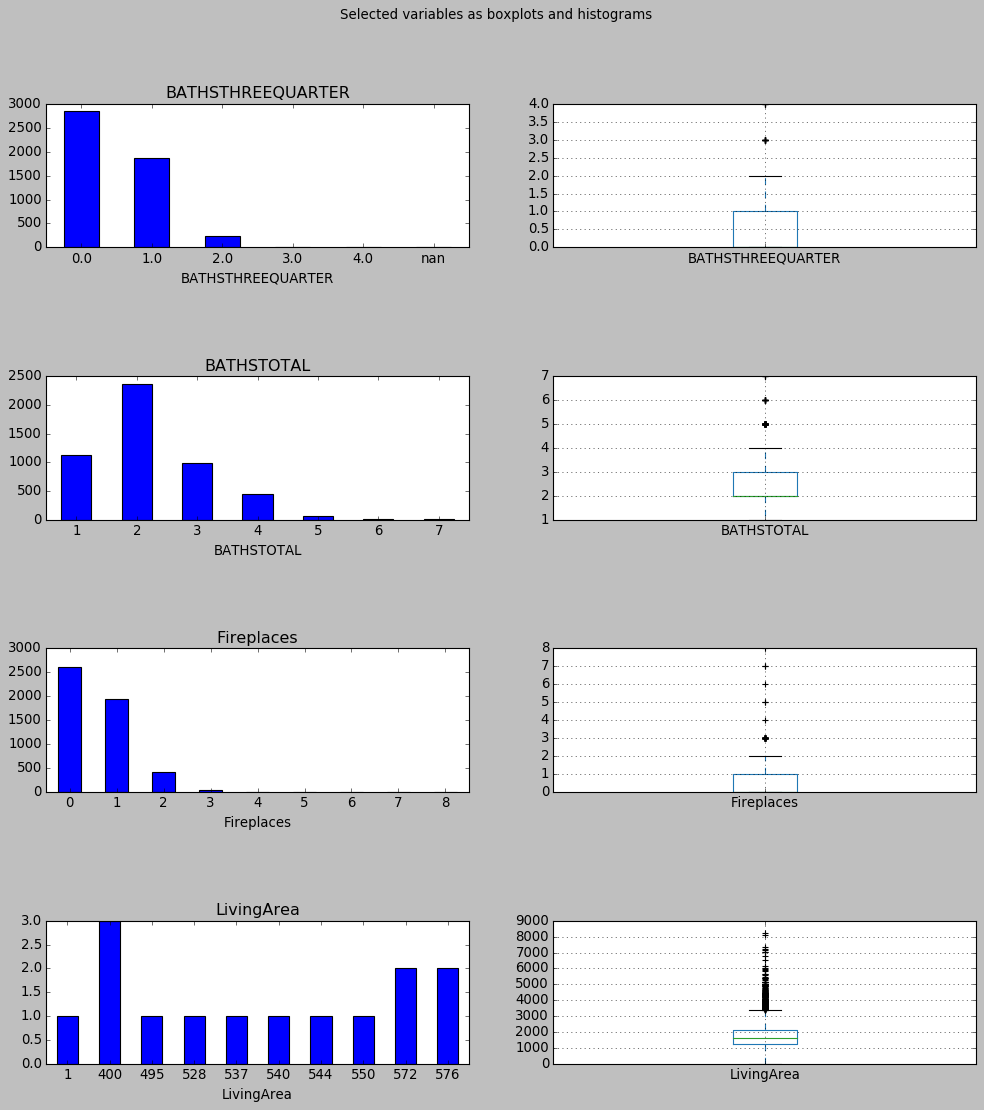

In [1698]:

hdf = realEstate.toHandy()

fig, axs = plt.subplots(4, 2, figsize=(15, 15))

plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=None, hspace=0.9)
fig.suptitle('Selected variables as boxplots and histograms')

hdf.cols['BATHSTHREEQUARTER'].hist(ax=axs[0,0])
hdf.cols['BATHSTHREEQUARTER'].boxplot(ax=axs[0,1])
hdf.cols['BATHSTOTAL'].hist(ax=axs[1,0])
hdf.cols['BATHSTOTAL'].boxplot(ax=axs[1,1])
hdf.cols['Fireplaces'].hist(ax=axs[2,0])
hdf.cols['Fireplaces'].boxplot(ax=axs[2,1])
hdf.cols['LivingArea'].hist(ax=axs[3,0])
hdf.cols['LivingArea'].boxplot(ax=axs[3,1])

plt.show()

#### Pandas

<p>
is used here to show selected plots.
Not all variables are immediately good for visualization.
For example adress is not suitable.
</p> 

In [1699]:
realEstate_pd = realEstate.toPandas()

pd_objects = realEstate_pd.select_dtypes(include='object')
print(pd_objects.shape)
pd_objects.iloc[:, :5].info()

print("")

pd_numbers = realEstate_pd.select_dtypes(include='number')
print(pd_numbers.shape)
pd_numbers.iloc[:, :5].info()

(5000, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
MLSID              5000 non-null object
streetaddress      5000 non-null object
STREETNAME         5000 non-null object
StateOrProvince    5000 non-null object
City               5000 non-null object
dtypes: object(5)
memory usage: 195.4+ KB

(5000, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
number                 5000 non-null int32
StreetNumberNumeric    5000 non-null int32
PostalCode             5000 non-null int32
SalesClosePrice        5000 non-null int32
LISTPRICE              5000 non-null int32
dtypes: int32(5)
memory usage: 97.8 KB


['LELM - Lake Elmo' 'MAPW - Maplewood' 'OAKD - Oakdale' 'STP - Saint Paul'
 'WB - Woodbury']
STP - Saint Paul    2825
WB - Woodbury       1147
MAPW - Maplewood     473
OAKD - Oakdale       400
LELM - Lake Elmo     155
Name: City, dtype: int64


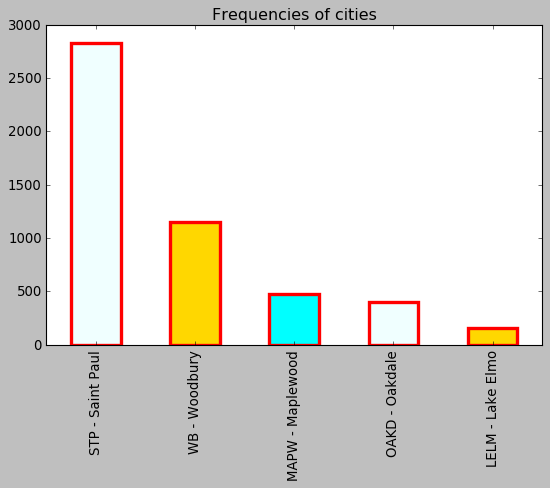

In [1700]:
print(pd_objects['City'].unique())
print(pd_objects['City'].value_counts())

pd_objects['City'].value_counts().\
plot.bar(edgecolor="red", linewidth=3, 
         color=['azure', 'gold', 'cyan'],
         title='Frequencies of cities',
         figsize=(8,5))
plt.show()

['834 - Stillwater' '622 - North St Paul-Maplewood' '832 - Mahtomedi'
 '6 - South St. Paul' '623 - Roseville' '624 - White Bear Lake'
 '625 - St. Paul' '833 - South Washington County']
625 - St. Paul                   2824
622 - North St Paul-Maplewood     918
833 - South Washington County     890
834 - Stillwater                  269
623 - Roseville                    87
832 - Mahtomedi                     6
624 - White Bear Lake               5
6 - South St. Paul                  1
Name: SchoolDistrictNumber, dtype: int64


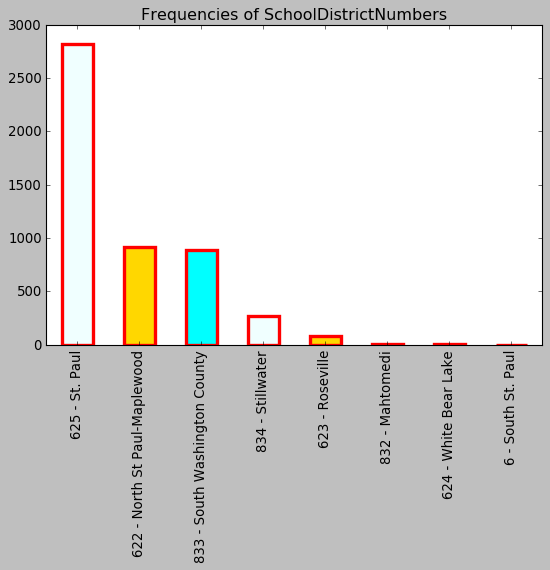

In [1701]:
print(pd_objects['SchoolDistrictNumber'].unique())
print(pd_objects['SchoolDistrictNumber'].value_counts())

pd_objects['SchoolDistrictNumber'].value_counts().\
plot.bar(edgecolor="red", linewidth=3, 
         color=['azure', 'gold', 'cyan'],
         title='Frequencies of SchoolDistrictNumbers',
         figsize=(8,5))
plt.show()

743


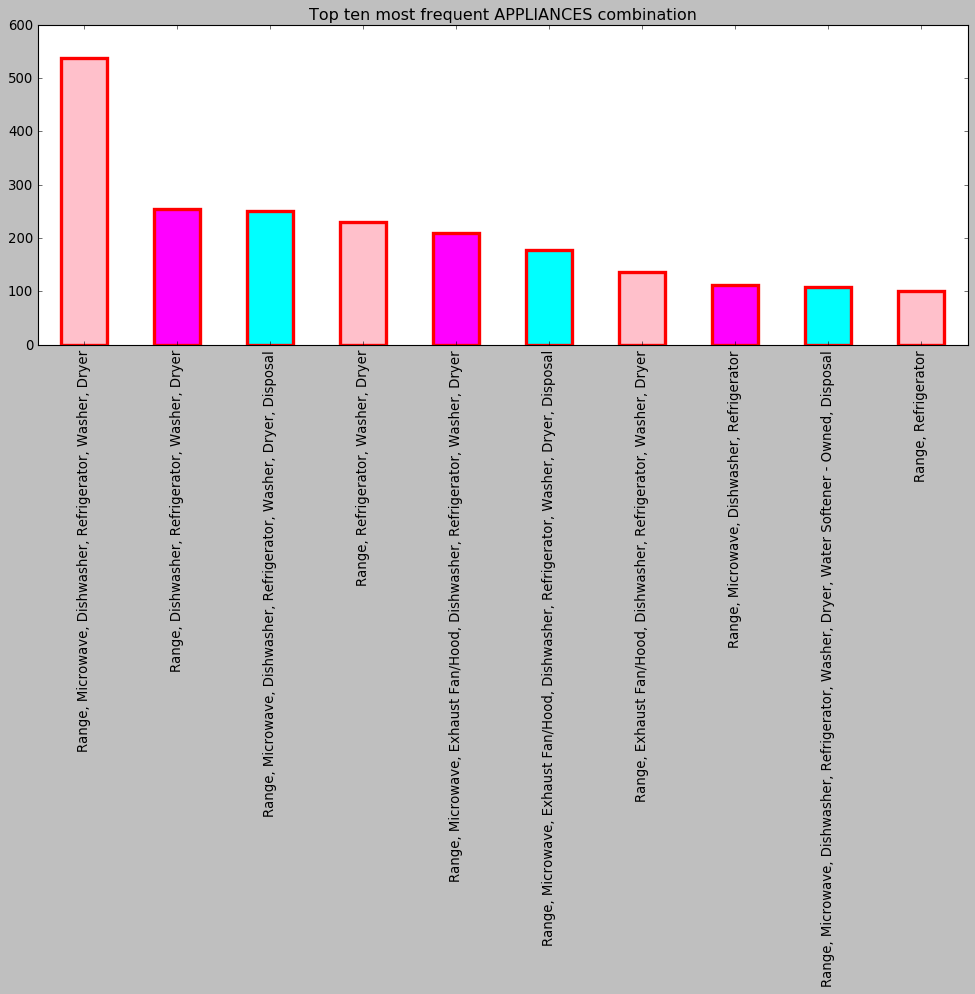

In [1702]:

print(len(pd_objects['APPLIANCES'].value_counts()))

pd_objects['APPLIANCES'].value_counts().\
sort_values(ascending=False)[:10].\
plot.bar(edgecolor="red", linewidth=3, 
         color=['pink', 'magenta', 'cyan'],
         title='Top ten most frequent APPLIANCES combination',
         figsize=(15,5))
plt.show()

#### Price variables

In [1703]:
prices_pd = \
pd_numbers.loc[:, ['SalesClosePrice',  'LISTPRICE']]

print(prices_pd.head())

   SalesClosePrice  LISTPRICE
0           143000     139900
1           190000     210000
2           225000     225000
3           265000     230000
4           249900     239900


In [1704]:
prices_agg =\
prices_pd.agg({'SalesClosePrice': ['min', 'max', 'median' , 'mean'], 
               'LISTPRICE': ['min', 'max', 'median' , 'mean']}).\
round(2)

prices_agg 

SalesClosePrice   LISTPRICE
min            48000.00    40000.00
max          1700000.00  1850000.00
median        225000.00   224900.00
mean          262804.47   263419.36

#### 'OriginalListPrice'

40000
1850000


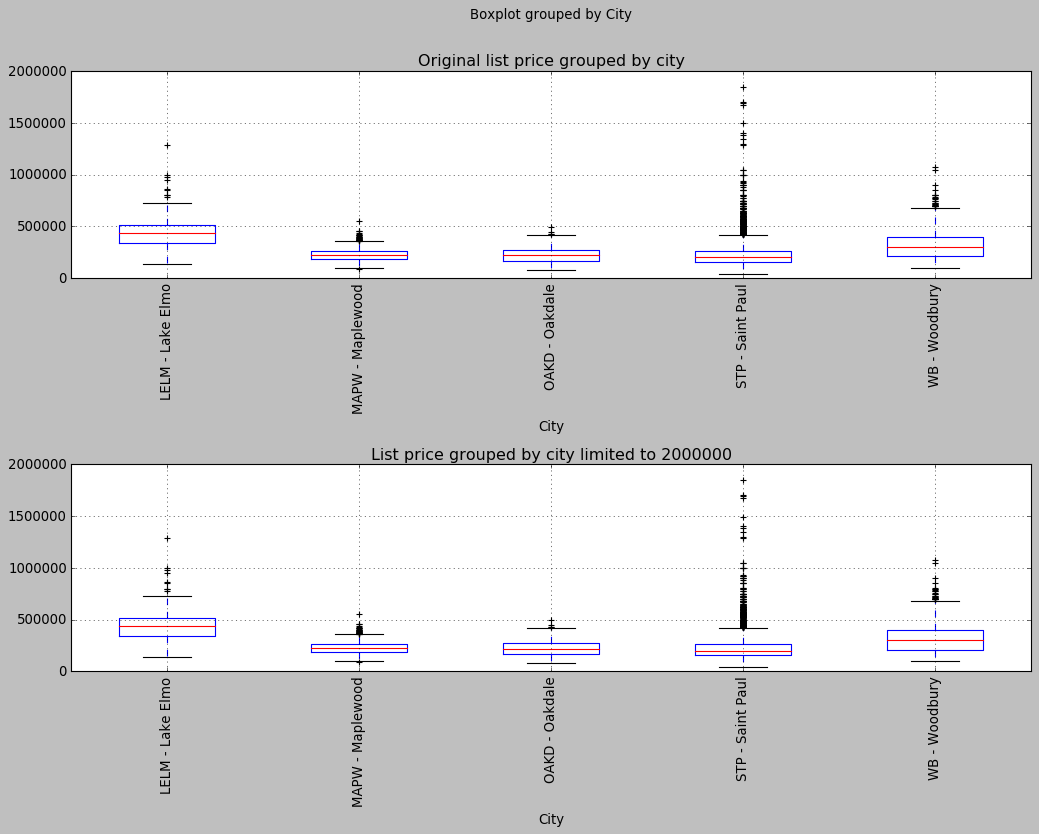

In [1705]:
# There are at least two outliers in the variable
# Therefor the y-scale is limited with ylim

print(pd_numbers['LISTPRICE'].min())
print(pd_numbers['LISTPRICE'].max())

fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=None, hspace=0.9)


ax1= fig.add_subplot(211)
realEstate_pd.boxplot(by='City', 
                      column=['LISTPRICE'], 
                      grid=True, figsize=(10,5), ax=ax1)
ax1.set_title("Original list price grouped by city")
# plt.ylim((0,1000000))
plt.xticks(rotation=90)


ax2 = fig.add_subplot(212)
realEstate_pd.boxplot(by='City', 
                       column=['LISTPRICE'], 
                       grid=True, figsize=(10,5), ax=ax2,
                       )
ax2.set_title("List price grouped by city limited to 2000000")
plt.ylim((0,2000000)) 
plt.xticks(rotation=90)

plt.show()

#### Outlier detection with Z-score

<p>
"In statistics, the standard score is the number of standard deviations by which the value of a raw score (i.e., an observed value or data point) is above or below the mean value of what is being observed or measured. Raw scores above the mean have positive standard scores, while those below the mean have negative standard scores.
</p>
<p>
It is calculated by subtracting the population mean from an individual raw score and then dividing the difference by the population standard deviation. This process of converting a raw score into a standard score is called standardizing or normalizing (however, "normalizing" can refer to many types of ratios; see normalization for more)."
</p> 


<a href="https://en.wikipedia.org/wiki/Standard_score" target="_blank">Wikipedia</a> 

<p>
The graphic show the number of standard deviation away from the mean
associated with the Z-score. A Z-score of 3 is associated with 3 standard
deviations. It is question of estimation, which standard deviation seems
acceptable to determine a data point as outlier. Z-Scores require the
normal distribution.
</p> 

<img src="Normal_distribution_and_scales.gif" alt="Normal_distribution_and_scales" height="500" width="500" align=left> 



In [1706]:
# from scipy import stats
# calculate z-scores
lp_Z = np.abs(stats.zscore(pd_numbers['LISTPRICE']))

#  number of z scores is equal to number of the variable
print(lp_Z.shape)
print(pd_numbers['LISTPRICE'].shape)

print(lp_Z)


(5000,)
(5000,)
[0.85819225 0.37114897 0.26693144 ... 4.42285072 5.46653376 5.65401416]


In [1707]:
# Return elements chosen from x or y depending on condition.
# returns the indices
threshold = 3 # meaning 3 standard deviation from the mean
zc3 = np.where(lp_Z > threshold)

print(type(zc3))
# How many data points are lower than 3 standard deviations?
print(len(zc3[0]))
# 9 data points are outliers
print(zc3)


<class 'tuple'>
82
(array([ 142,  143,  144,  145,  146,  147,  148,  149,  150,  151,  152,
        153,  154, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815,
       3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826,
       3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837,
       3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848,
       3849, 3850, 3851, 3852, 4977, 4978, 4979, 4980, 4981, 4982, 4983,
       4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994,
       4995, 4996, 4997, 4998, 4999], dtype=int64),)


Conceptionally the outliers can be to the left as to the right 
of the main body. Therefore outliers are checked on both sides.
On the left side outliers are considered data points smaller
than -3 standard deviations to the left. However on ground on
the given graphic this seems unlikely here.

In [1708]:
threshold = -3 # meaning 3 standard deviation from the mean
zc_minus_3 = np.where(lp_Z < threshold)

print(type(zc_minus_3))
# How many data points are lower than 3 standard deviations?
print(len(zc_minus_3[0]))
# 9 data points are outliers
print(zc_minus_3)


<class 'tuple'>
0
(array([], dtype=int64),)


There are none outliers to the left of this right skewed distribution.

Outliers are per definition those below the threshold.
In this case 9 data point are in the tails of the normal 
distribution and deemed outliers.

In [1709]:
# np.where returns the index of the data point 
# the index is used to subset the variable
print(lp_Z[1151])
print(pd_numbers.loc[1151, 'LISTPRICE'])
# the incredible high z score of 38.93
# corresponds with the price of 16220000

1.1006717212396053
105000


In [1710]:
# zc3[0] are the indices of outliers
lp_outliers = pd.DataFrame(pd_numbers.loc[zc3[0], 'LISTPRICE']).\
sort_values(by='LISTPRICE', ascending=False)
lp_outliers.index.name = 'index'
print(lp_outliers.shape)
lp_outliers.head()

(82, 1)


LISTPRICE
index           
3852     1850000
3851     1700000
3850     1695000
3849     1675000
3848     1495000

In [1711]:
pd_numbers['LISTPRICE'].sort_values(ascending=False)[:10]

3852    1850000
3851    1700000
3850    1695000
3849    1675000
3848    1495000
3847    1399999
3846    1380000
3845    1349000
3844    1295000
3843    1290000
Name: LISTPRICE, dtype: int32

Removing outliers from the data frame.

In [1712]:
pd_numbers_2 = \
pd_numbers.drop(zc3[0], axis=0)

In [1713]:
pd_numbers_2['LISTPRICE'].sort_values(ascending=False)[:10]

3806    695000
4976    694135
3805    680000
3804    679900
141     679900
4975    679375
4974    677760
3803    675225
3802    675000
4973    675000
Name: LISTPRICE, dtype: int32

In [1714]:
print(pd_numbers_2.shape)

(4918, 27)


#### SalesClosePrice

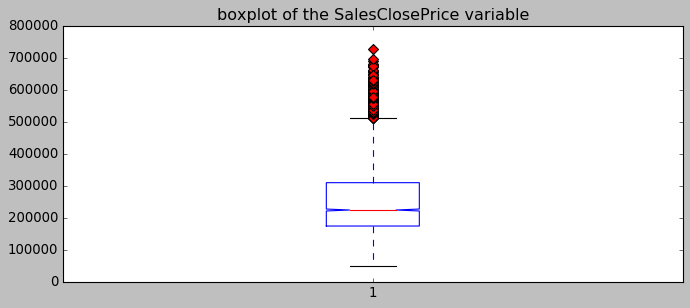

In [1715]:
fig, ax1 = plt.subplots(figsize=(10,4))
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(pd_numbers_2['SalesClosePrice'], notch=True,
            flierprops=red_diamond)
plt.title('boxplot of the SalesClosePrice variable')
plt.show()

According to the interquartile range used by pyplot 
boxplot there are outliers.

In [1716]:
spZ = np.abs(stats.zscore(pd_numbers_2['SalesClosePrice']))
spZ_index = np.where(spZ > 3) 
pd_numbers_2.drop(spZ_index[0], axis=0, inplace=True)

print(spZ_index)
print(len(spZ_index[0]))

(array([ 130,  132,  133,  134,  135,  137,  138,  139,  140,  141, 3747,
       3757, 3759, 3761, 3763, 3765, 3766, 3767, 3769, 3772, 3773, 3774,
       3775, 3776, 3777, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786,
       3787, 3788, 3789, 3790, 3791, 3792, 3793, 4891, 4894, 4896, 4897,
       4898, 4899, 4900, 4902, 4903, 4904, 4905, 4906, 4908, 4909, 4910,
       4911, 4912, 4913, 4914, 4915, 4916, 4917], dtype=int64),)
62


#### Plotting prices

In [1717]:
plt.style.use('Solarize_Light2')

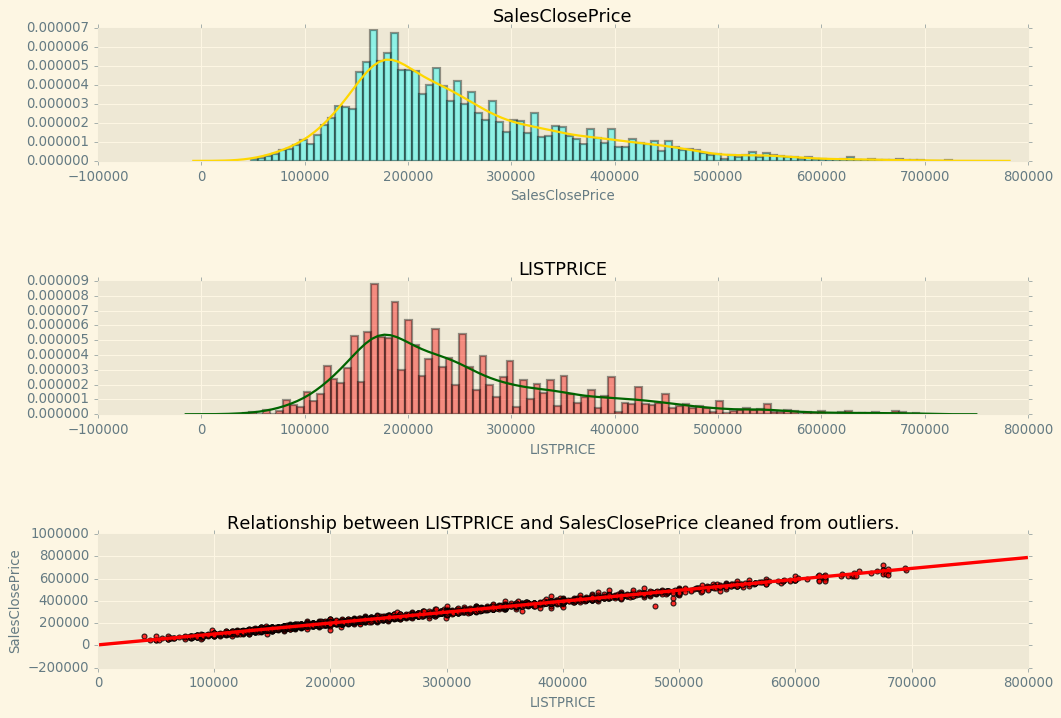

In [1718]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=None, hspace=0.9)
ax1 = sns.distplot(pd_numbers_2['SalesClosePrice'],
                   color="gold", 
                   hist_kws=dict(edgecolor="black", linewidth=2, 
                                 color=['cyan']),
                   ax=ax1, bins=100)
# ax1.set_xticklabels(g.get_xticklabels(), rotation=30)
ax1.set_title('SalesClosePrice')


ax2 = sns.distplot(pd_numbers_2['LISTPRICE'],
                 color="darkgreen", 
                 hist_kws=dict(edgecolor="black", linewidth=2, 
                               color=['r']),
                 ax=ax2, bins=100)
# ax2.set_xticklabels(g.get_xticklabels(), rotation=90)
ax2.set_title('LISTPRICE')


ax3 = sns.regplot(x='LISTPRICE', y='SalesClosePrice', 
                  data=pd_numbers_2, color="red",
                  scatter_kws = dict(edgecolor="black", linewidth=1))

ax3.set_title('Relationship between LISTPRICE and SalesClosePrice cleaned from outliers.')


plt.show()

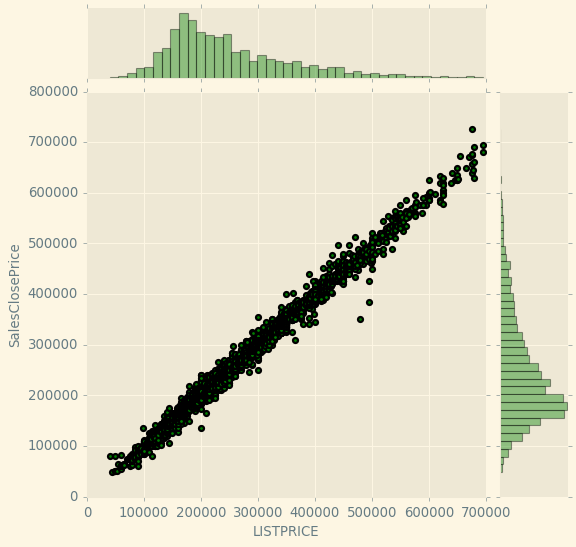

In [1719]:
# https://stackoverflow.com/questions/47029479/inner-got-multiple-values-for-argument-ax?rq=1
# The issue is that jointplot creates its own figure and axes. 
# It therefore does not have an ax argument available. 
# To change the size, use the size argument. 

sns.jointplot(x='LISTPRICE', 
              y='SalesClosePrice', 
              data=pd_numbers_2, color="g", height=7,
              joint_kws = dict(edgecolor="black", linewidth=2))
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

#### Taking a sample

<p>
As spark is normally applied to Big Data, understood here as every data set too large
to be processed by one machine or node, carrying the whole data set over
to pandas might cause disruptions. Instead taking a sample is an alternative.
</p> 

In [1720]:
sample_20 = realEstate.\
sample(withReplacement=False, fraction=0.2, seed=42)
print(sample_20.count())

sample20_pd = sample_20.toPandas()
print(type(sample20_pd))

1028
<class 'pandas.core.frame.DataFrame'>


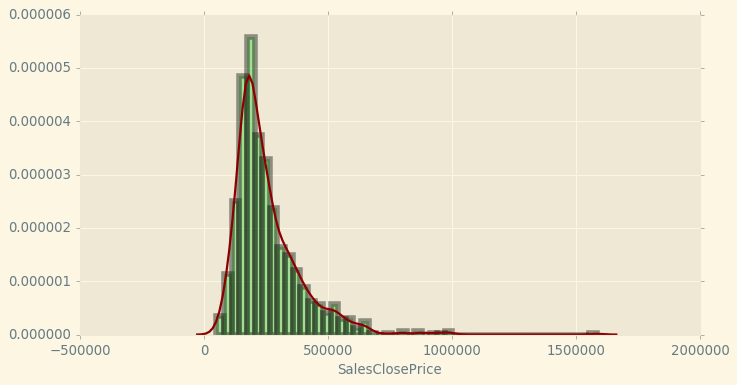

In [1721]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 5))
ax1 = sns.distplot(sample20_pd['SalesClosePrice'],
                   color="darkred", 
                   hist_kws=dict(edgecolor="black", linewidth=5,
                   color=['limegreen']))

## Correlations

<p>
correlations are a valuable instrument in <b>feature engineering</b>. The assumptions
is that features with higher correlations with the target variable are going to
contribute to better predictions.
</p> 

<p>
"A feature may be important if it is highly correlated with the dependent variable (the thing being predicted). Correlation coefficients and other univariate (each attribute is considered independently) methods are common methods."<br>
<a href="https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/" target="_blank">Wikipedia</a> 
</p> 




In [1722]:
corr_matrix = sample20_pd.corr()
corr_matrix.head( )

number  StreetNumberNumeric  PostalCode  \
number               1.000000             0.226792    0.381513   
StreetNumberNumeric  0.226792             1.000000    0.092327   
PostalCode           0.381513             0.092327    1.000000   
SalesClosePrice      0.425869             0.297982   -0.165089   
LISTPRICE            0.420345             0.292291   -0.158086   

                     SalesClosePrice  LISTPRICE  OriginalListPrice  \
number                      0.425869   0.420345           0.091384   
StreetNumberNumeric         0.297982   0.292291           0.071082   
PostalCode                 -0.165089  -0.158086          -0.042328   
SalesClosePrice             1.000000   0.995956           0.237504   
LISTPRICE                   0.995956   1.000000           0.243455   

                     PricePerTSFT  FOUNDATIONSIZE  DAYSONMARKET  Fireplaces  \
number                   0.231220        0.199967      0.042821    0.338667   
StreetNumberNumeric     -0.086444        0.258986      0.078208    0.285321   
PostalCode              -0.251784       -0.078500     -0.026457    0.042501   
SalesClosePrice          0.378399        0.614258      0.105750    0.606025   
LISTPRICE                0.364043        0.615156      0.130593    0.608842   

                     ...     ACRES  BathsFull  BathsHalf  BATHQUARTER  \
number               ... -0.087798   0.266209   0.216719     0.049771   
StreetNumberNumeric  ...  0.145063   0.332702   0.272878    -0.036477   
PostalCode           ... -0.116481   0.010573   0.040326    -0.031983   
SalesClosePrice      ...  0.280529   0.492487   0.360553     0.004653   
LISTPRICE            ...  0.277662   0.484409   0.364792     0.002711   

                     BATHSTHREEQUARTER  BATHSTOTAL  Bedrooms  SQFTBELOWGROUND  \
number                        0.159254    0.373485  0.223125         0.212653   
StreetNumberNumeric           0.146938    0.418025  0.218206         0.219473   
PostalCode                    0.017620    0.032350 -0.011503         0.118023   
SalesClosePrice               0.354438    0.692826  0.571523         0.471651   
LISTPRICE                     0.357188    0.691734  0.566354         0.467778   

                     AssociationFee  AssessedValuation  
number                     0.109147          -0.031877  
StreetNumberNumeric        0.177689          -0.090403  
PostalCode                -0.046573          -0.011126  
SalesClosePrice            0.129278          -0.039996  
LISTPRICE                  0.135863          -0.037367  

[5 rows x 27 columns]

What are the variables with the highest correlations or the "hottest" areas in heatplots?

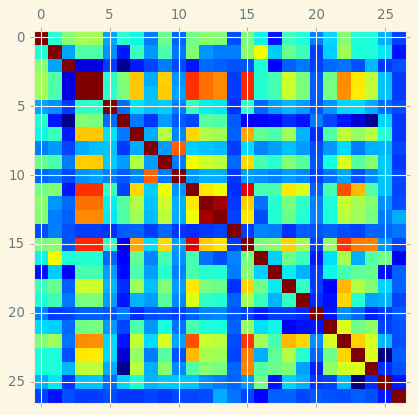

In [1723]:
plt.matshow(corr_matrix)
plt.show()

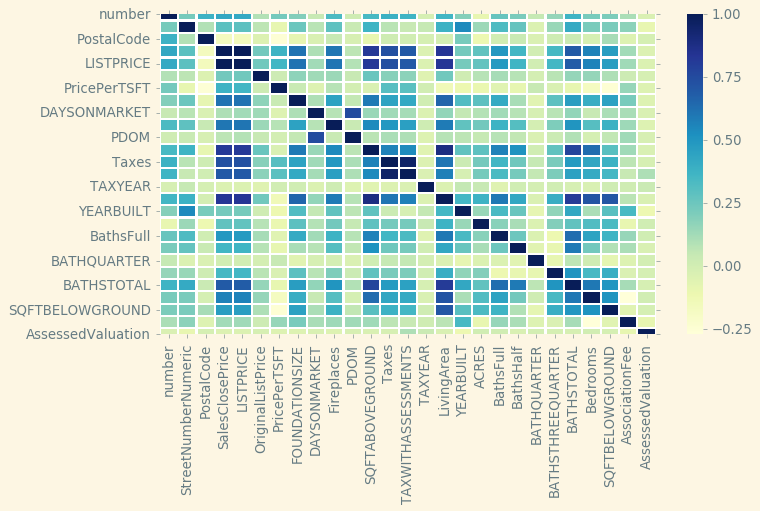

In [1724]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax = sns.heatmap(corr_matrix, cmap="YlGnBu", linewidths=1)
# Seaborn heatmaps are more sophisticated and easier to handle
# than Pyplot heatmaps

Taking only the label or target variable into account.

In [1725]:
corr_Sprice = corr_matrix.iloc[:, 3]
corr_Sprice.name = "SalesClosePrice"
print(corr_Sprice.head(10))

number                 0.425869
StreetNumberNumeric    0.297982
PostalCode            -0.165089
SalesClosePrice        1.000000
LISTPRICE              0.995956
OriginalListPrice      0.237504
PricePerTSFT           0.378399
FOUNDATIONSIZE         0.614258
DAYSONMARKET           0.105750
Fireplaces             0.606025
Name: SalesClosePrice, dtype: float64


Why is the difference between LISTPRICE and OriginalListPrice so high?<br>
This must be answered with domain knowledge.

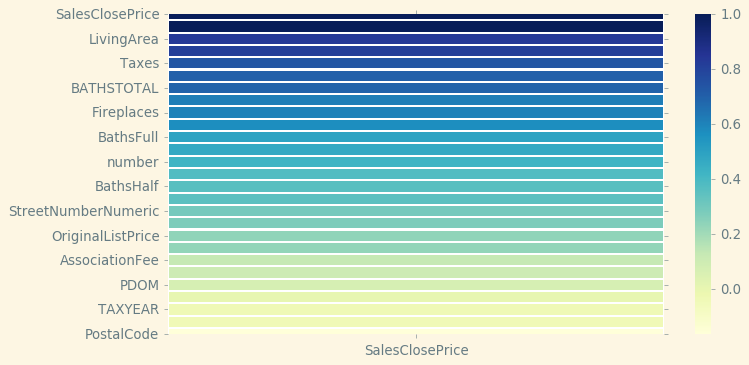

In [1726]:
corr_Sprice_df = pd.DataFrame(corr_Sprice).\
sort_values(by='SalesClosePrice', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax = sns.heatmap(corr_Sprice_df, cmap="YlGnBu", linewidths=1)

LISTPRICE is above living area. It is just not visible.

In [1727]:
corr_05 = corr_matrix[corr_matrix > 0.5]
scPrice_05 = corr_05.loc[:, 'SalesClosePrice']
scPrice_05 = scPrice_05.dropna()
print(scPrice_05)


SalesClosePrice       1.000000
LISTPRICE             0.995956
FOUNDATIONSIZE        0.614258
Fireplaces            0.606025
SQFTABOVEGROUND       0.817004
Taxes                 0.733558
TAXWITHASSESSMENTS    0.701552
LivingArea            0.833658
BATHSTOTAL            0.692826
Bedrooms              0.571523
Name: SalesClosePrice, dtype: float64


In [1728]:
print(scPrice_05.index[scPrice_05.max()])
print(scPrice_05[1:len(scPrice_05)].max())

LISTPRICE
0.9959559719165995


#### What has correlation to do with feature engineering?

<p>
The correlation of sales close price with list price is very high.
There is a strong positive relationship as shown with the plot.
A strong linear relationship indicates a high influence of the
independent or predictor variable <b>"LISTPRICE" </b>
on the dependent, target variable <b>"SalesClosePrice"</b>.
In terms of feature engineering "LISTPRICE" makes a good feature
for predicting "SalesClosePrice". The prediction model should therefore
include "LISTPRICE" as a feature.
</p>
<p>
However at this point this would be premature. In the <b>feature extraction</b> process
below new features are combined or generated from given features. So
some existing features may have a low correlation with the target variable alone,
but could increase correlation as a new extracted features.
</p> 

# Parquet

<p>
"CSV files are low to parse and requires constantly redefining the schema. 
An alternative in Apache Spark and other data processing frameworks 
is the columnar data format "Parquet".
It limits input-output operations, stores automatically schemas, needs less space, and makes access to certain columns easy."
</p> 

<p>
"Parquet speeds up operations by applying the technique of "predicate pushdown processing only the data needed for the operation and not the entire data frame."
</p> 

<a href="https://www.tutorialspoint.com/spark_sql/spark_sql_parquet_files.htm" target="_blank">
Spark SQL - Parquet Files</a> 

<p>
The realEstate data frame is turned into an Parquet file to take advantage of the 
Parquet features.
</p> 



In [1729]:
# writing the parquet file to disc
# overwrite ascertains 
# that a new parquet is created when running the notebook
# this avoids name errors
realEstate.write.parquet("estate_parq.parquet", mode='overwrite')

In [1730]:
estateParq = spark.read.parquet("estate_parq.parquet")

In [1731]:
print(type(estateParq))

estateCols = estateParq.columns
print(type(estateCols))
print(estateCols[:6])

estateParq.select(estateCols[:5]).show(3)

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'list'>
['number', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode']
+------+-----+-------------------+--------------------+----------+
|number|MLSID|StreetNumberNumeric|       streetaddress|STREETNAME|
+------+-----+-------------------+--------------------+----------+
|     1| RMLS|              11511|11511 Stillwater ...|Stillwater|
|     2| RMLS|              11200|     11200 31st St N|      31st|
|     3| RMLS|               8583|8583 Stillwater B...|Stillwater|
+------+-----+-------------------+--------------------+----------+
only showing top 3 rows



In [1732]:
estateParq.select(estateCols[-5:-1]).show(3)

+---------------+-----------------+--------------+-----------------+
|SQFTBELOWGROUND|AssumableMortgage|AssociationFee|ASSESSMENTPENDING|
+---------------+-----------------+--------------+-----------------+
|              0|             null|             0|          Unknown|
|            960|             null|             0|          Unknown|
|              0|    Not Assumable|             0|               No|
+---------------+-----------------+--------------+-----------------+
only showing top 3 rows



### Creating an SQL-table

<p>
Before going on an SQL-table is created from the parquet file.
This comes in handy, when running swift SQL-queries for retrieving
data.
</p> 

In [1733]:
estateParq.createOrReplaceTempView("estate_sql")

In [1734]:
print(spark_session.catalog.listTables())

[Table(name='estate5', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate5_table', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate6_table', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate5_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='estate6_windows', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='estate_sql', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='geo_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='scores_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [1735]:
# this show the column names
query_1 = spark.sql("SELECT * FROM estate_sql LIMIT 0")
query_1

DataFrame[number: int, MLSID: string, StreetNumberNumeric: int, streetaddress: string, STREETNAME: string, PostalCode: int, StateOrProvince: string, City: string, SalesClosePrice: int, LISTDATE: string, LISTPRICE: int, LISTTYPE: string, OriginalListPrice: int, PricePerTSFT: double, FOUNDATIONSIZE: int, FENCE: string, MapLetter: string, LotSizeDimensions: string, SchoolDistrictNumber: string, DAYSONMARKET: int, offmarketdate: string, Fireplaces: int, RoomArea4: string, roomtype: string, ROOF: string, RoomFloor4: string, PotentialShortSale: string, PoolDescription: string, PDOM: int, GarageDescription: string, SQFTABOVEGROUND: int, Taxes: int, RoomFloor1: string, RoomArea1: string, TAXWITHASSESSMENTS: double, TAXYEAR: int, LivingArea: int, UNITNUMBER: string, YEARBUILT: int, ZONING: string, STYLE: string, ACRES: double, CoolingDescription: string, APPLIANCES: string, backonmarketdate: string, ROOMFAMILYCHAR: string, RoomArea3: string, EXTERIOR: string, RoomFloor3: string, RoomFloor2: str

In [1736]:
query_2 = spark.sql("SELECT COUNT(number) FROM estate_sql")
print(query_2.collect())
print(query_2.show())

[Row(count(number)=5000)]
+-------------+
|count(number)|
+-------------+
|         5000|
+-------------+

None


In [1737]:
query_3 = \
spark.sql("SELECT ROUND(AVG(OriginalListPrice),2) \
AS AverageListPrice FROM estate_sql")
print(query_3.collect())
print(query_3.show())

[Row(AverageListPrice=275002.63)]
+----------------+
|AverageListPrice|
+----------------+
|       275002.63|
+----------------+

None


### User defined functions

Below some <b>helper functions</b> are written to ascertain the
data sets matches expectations. The  Functions are
not necessarily  user-defined Functions in the sense of registered Pyspark functions. 

#### Sort a list (for example alphabetically)

In [1738]:
def sort_list(df):
    cols = df.columns
    cols.sort()
    return cols

sorted_list = sort_list(estateParq)
print(sorted_list[:15])

['ACRES', 'APPLIANCES', 'ASSESSMENTPENDING', 'AssessedValuation', 'AssociationFee', 'AssumableMortgage', 'BASEMENT', 'BATHDESC', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'BathsFull', 'BathsHalf', 'Bedrooms', 'City']


#### Shape

In [1739]:
print(f"shape: n_rows: {estateParq.count()}, n_cols: {len(estateParq.columns)}")

shape: n_rows: 5000, n_cols: 74


In [1740]:
def dfShape(df):
    assert (df.rdd.isEmpty() == False), "The data frame is empty"
    rows = df.count()
    cols = len(df.columns)
    message = f"shape: n_rows: {rows}, n_cols: {cols}"
    return message

In [1741]:
nowtime = time()

print(dfShape(estateParq))

aftertime = time()
runtime = aftertime - nowtime
print(runtime)

shape: n_rows: 5000, n_cols: 74
1.726931095123291


#### Verifiying shape as expected.

In [1742]:
# shape consists of number of rows and columns
def verify_dfShape(df, rows, cols):
    # there two cases: shape as expected or not.    
    if rows == df.count():
            if cols == len(df.columns):
                verification = "df verified, shape as expcected"
    else:
        verification = 'df not verfified, shape not as expected'
    
    return verification

In [1743]:
t0 = time()

verify_dfShape_1 = verify_dfShape(estateParq, 5000, 74)

tt = time() - t0

print(tt)
print(verify_dfShape_1)


0.11892485618591309
df verified, shape as expcected


In [1744]:
# here a sample is taken from the df
# the sample has a particular shape
sample_1 = estateParq.sample(False, 0.4, 0.42)
print(type(sample_1))
dfShape(sample_1)

<class 'pyspark.sql.dataframe.DataFrame'>


'shape: n_rows: 2028, n_cols: 74'

In [1745]:
verify_dfShape(sample_1, 5000, 74)

'df not verfified, shape not as expected'

####  Show the data type of selected colum of a pyspark data frame

In [1746]:
def show_dtype(sparkDF, col):
    '''Show data type of a selected column'''
    for a,b in sparkDF.dtypes:
        if a == col:
            return (f"data type of {a} is {b}")
            

In [1747]:
def show_dtypes_list(sparkDF, col_list):
    '''Show data type of a list of selected columns'''
    
    dtypes_dict = {}
    
    # iteration to get selected column
    for i,z in enumerate(col_list):
        col = col_list[i]
        # iteration to match first element of tuple 
        # equals variable name
        # with selected column
        for (a,b) in sparkDF.dtypes:
            if a == col:
                # store only matches in a dict
                dtypes_dict[a] = b
    return dtypes_dict

This functions checks if all elements of list are of type string. 
Below is a slightly modified version checking for a special data type.
and returns returns a boolean and list of booleans. This comes often
in handy, when looping over an iterable. 

In [1748]:
def checkList_forStrings(coList):
    """checks if all elements of list are strings
    and returns a boolean and list of booleans"""
    
    assert (True == isinstance(coList, list)),\
    "This is not a list."
    
    stringCheck = []
    for i in coList:
        boolean = isinstance(i, str) 
        stringCheck.append(boolean)
        resultCheck = all(stringCheck)
    return resultCheck, stringCheck

#checking user defined function works
t0 = time()

resultCheck_1, stringCheck_1 = \
checkList_forStrings(estateParq.columns)

tt = time() - t0
print(f"runtime: {tt}")

# returns true here if all list elements are true (or strings)
print(resultCheck_1)
print(stringCheck_1[:5])

# function works

runtime: 0.0
True
[True, True, True, True, True]


In [1749]:
def checkList_forDtype(coList,dtype):
    """checks if all elements of list are of dtype (e.g. strings)
    and returns a boolean and list of booleans"""
    
    assert (True == isinstance(coList, list)),\
    "This is not a list."
    
    dtypeCheck = []
    for i in coList:
        boolean = isinstance(i, dtype) 
        dtypeCheck.append(boolean)
        resultCheck = all(dtypeCheck)
    return resultCheck, dtypeCheck


#### Data types

Given list of tuples with the variable names and data types.

In [1750]:
dtypes = estateParq.dtypes
dtypes[:10]

[('number', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'string')]

<b>Expected dictionay of keys and data types.</b><br>
This key-value-pairs are compared to the actual given variable list.<br>
The goals are to determine if the variables are in the dictionary
and if the dtypes of the dictionary and list matches.

In [1751]:
dtypesVerification = \
{'ASSESSMENTPENDING': 'string',
 'AssessedValuation': 'double',
 'AssociationFee': 'int',
 'AssumableMortgage': 'string',
 'SQFTBELOWGROUND': 'int',
 'roomtype': 'string',
 'APPLIANCES': 'string',
 'backonmarketdate': 'string',
 'ROOMFAMILYCHAR': 'string',
 'RoomArea3': 'string',
 'EXTERIOR': 'string',
 'RoomFloor3': 'string',
 'RoomFloor2': 'string',
 'RoomArea2': 'string',
 'BathsFull': 'int',
 'BathsHalf': 'int',
 'BATHQUARTER': 'int',
 'BATHSTHREEQUARTER': 'int',
 'Class': 'string'}

# the key 'BATHSTHREEQUARTER' gives the value 'int'
# this is explained in core Python dictionaries tutorials
print(dtypesVerification['BATHSTHREEQUARTER'])
print(len(dtypesVerification))

int
19


Compare the data types of the real estate data frame with a dictionary 
consisting of key-value-pairs with the variable name as the key and the value as the data type.
This would make practical sense in case periodically a new real estate data frame must be checked
for consistency with expected data types.

In [1752]:
def compare_dtypes(dtypes, dtypesVerification):
    # given dtypes or dtypes to check if match, type: list of tuples
    # coming from spark_df.dtypes
    # dtypesVerification or check list, type dict
    results = []
    failed_matches = []
    for k,v in dtypes:
        # print (k) #gives variable name
        if k in dtypesVerification:
            # determine the value or dtype of k
            varDtype = v
            # print(varDtype) #gives dtype of variable 
            # compare dtype of actual list with dtypes of expected list
            if varDtype == dtypesVerification[k] :
                results.append(k)
                print(f'The variable "{k}" is in the dict, data types match.')
            if varDtype != dtypesVerification[k] :
                failed_matches.append(k)
    return (results, failed_matches)

            


In [1753]:
results2, failed_matches2 = \
compare_dtypes(dtypes, dtypesVerification)

The variable "roomtype" is in the dict, data types match.
The variable "APPLIANCES" is in the dict, data types match.
The variable "backonmarketdate" is in the dict, data types match.
The variable "ROOMFAMILYCHAR" is in the dict, data types match.
The variable "RoomArea3" is in the dict, data types match.
The variable "EXTERIOR" is in the dict, data types match.
The variable "RoomFloor3" is in the dict, data types match.
The variable "RoomFloor2" is in the dict, data types match.
The variable "RoomArea2" is in the dict, data types match.
The variable "BathsFull" is in the dict, data types match.
The variable "BathsHalf" is in the dict, data types match.
The variable "BATHQUARTER" is in the dict, data types match.
The variable "BATHSTHREEQUARTER" is in the dict, data types match.
The variable "Class" is in the dict, data types match.
The variable "SQFTBELOWGROUND" is in the dict, data types match.
The variable "AssumableMortgage" is in the dict, data types match.
The variable "Associati

In [1754]:
print(len(results2))
print(len(failed_matches2))

19
0


In [1755]:
# the object to match with must be dictionary  
dtypesVerification_2 = \
{'number': 'float',
 'MLSID': 'string',
 'StreetNumberNumeric': 'boolean',
 'streetaddress': 'string',
 'STREETNAME': 'string',
 'PostalCode': 'bigint',
 'StateOrProvince': 'string',
 'City': 'string',
 'SalesClosePrice': 'int',
 'LISTDATE': 'string'}

print(type(dtypesVerification_2))

<class 'dict'>


In [1756]:
results3, failed_matches3 = \
compare_dtypes(dtypes, dtypesVerification_2)


The variable "MLSID" is in the dict, data types match.
The variable "streetaddress" is in the dict, data types match.
The variable "STREETNAME" is in the dict, data types match.
The variable "StateOrProvince" is in the dict, data types match.
The variable "City" is in the dict, data types match.
The variable "SalesClosePrice" is in the dict, data types match.
The variable "LISTDATE" is in the dict, data types match.


In [1757]:
print(results3 )
print(failed_matches3 )

['MLSID', 'streetaddress', 'STREETNAME', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE']
['number', 'StreetNumberNumeric', 'PostalCode']


Checks if a variable is in the columns.

In [1758]:
def inCols(col, df):
    assert (True == isinstance(col, str)), \
    "col must be a string"
    
    if col in df.columns:
        return(f"True - the variable {col} is in the columns.") 
    else:
        return(f"False- the variable {col} is not in the columns.")

Some re fun just for training.

In [1759]:
import re
matches_234 = []
# re.search maches a string 
# the for loop applies it to every element 
# of the list of columns
for n,i in enumerate(estateParq.columns):
    if re.search("Price", i):
        matches_234.append(f"{n}.{i}")
print(matches_234[:7])

research_map = \
list(map(lambda x: re.search("Price", x), estateParq.columns))
print(research_map[:5])

['8.SalesClosePrice', '12.OriginalListPrice', '13.PricePerTSFT']
[None, None, None, None, None]


A helper function to search for patterns in list of column names.

In [1760]:
def matchPattern_onList(df, expression):
    """This functions searches a list of column names
    for an expression and returns two lists of matches"""
    
    # assert the df is a DataFrame
    assert (True == isinstance(df, DataFrame)), "This is not a data frame."
    
    colList = df.columns
    
    # assert list of columns is a list
    assert (list == type(colList)), "This is not a list."
    
    matches_only = []
    matches_n = []
    for n,i in enumerate(colList):
        if re.search(expression, i):
            matches_only.append(i)
            matches_n.append(f"{n}.{i}")   
        else:
            message = "The expression does not macht the list elements."
    
    if matches_only:
        return matches_only, matches_n
    else:
        message = "The expression does not match any list elements."
        return message
        

In [1761]:
priceCols_only, priceCols_n = \
matchPattern_onList(estateParq, "Price") 
print(priceCols_only[:5])
print("")
print(priceCols_n[:5])

['SalesClosePrice', 'OriginalListPrice', 'PricePerTSFT']

['8.SalesClosePrice', '12.OriginalListPrice', '13.PricePerTSFT']


#### Correlations

<p>
Finding the maximum correlation and the associated variable name this time in Pyspark.
</p> 



In [1762]:
cols_corr = estateParq.columns
cols_corr.remove('SalesClosePrice')
print(cols_corr[:6])

if 'SalesClosePrice' in cols_corr:
    print('found')
else:
    print('not found')

['number', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode']
not found


Select only numeric columns.

In [1763]:
# print(estateParq.dtypes)
# print(type(estateParq.dtypes))

# numeric columns used to subset the pyspark data frame
# with "select"
corrNumerics = \
[i[0] for i in estateParq.dtypes if i[1].startswith('int')]


print(corrNumerics[:5])
print(len(corrNumerics))

parNumerics = estateParq.select(corrNumerics)
print(type(parNumerics))
print(parNumerics.count())
print(len(parNumerics.columns))


['number', 'StreetNumberNumeric', 'PostalCode', 'SalesClosePrice', 'LISTPRICE']
23
<class 'pyspark.sql.dataframe.DataFrame'>
5000
23


In [1764]:
parNumerics_2 = parNumerics.columns
print(type(parNumerics_2))
print(parNumerics_2 )

<class 'list'>
['number', 'StreetNumberNumeric', 'PostalCode', 'SalesClosePrice', 'LISTPRICE', 'OriginalListPrice', 'FOUNDATIONSIZE', 'DAYSONMARKET', 'Fireplaces', 'PDOM', 'SQFTABOVEGROUND', 'Taxes', 'TAXYEAR', 'LivingArea', 'YEARBUILT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'Bedrooms', 'SQFTBELOWGROUND', 'AssociationFee']


In [1765]:
# maximum correlation
max_corr = 0
# maximum correlation variable
max_corr_var = parNumerics[0]


for col in parNumerics_2:
    # print(type(col)) = <class 'str'>

    correlation = \
    parNumerics.corr(col, 'SalesClosePrice')
    # print(correlation)
    if correlation == 1:
        continue
    if correlation > max_corr:
        max_corr  = correlation
        max_corr_var = col
        

In [1766]:
print(max_corr) 
print(max_corr_var)

0.9966856408762303
LISTPRICE


This is close to the maximum correlation above.

#### Distribution of list price

In [1767]:
rE_sample_22 = \
estateParq.sample(False, 0.4, 56)
print(type(rE_sample_22))
print(dfShape(rE_sample_22))

<class 'pyspark.sql.dataframe.DataFrame'>
shape: n_rows: 2084, n_cols: 74


In [1768]:
rE_22_pd = rE_sample_22.toPandas()
print(rE_22_pd.shape)
# rE_22_pd.info()
listprice_pd = rE_22_pd.LISTPRICE

(2084, 74)


#### Skewness

<p>
is a measure of symmetry. If the right and left sides
of the distribution have not the same shape the
distribution is considered skewed. The 
skweness metric is negative, when skewed to the left,
positive, when skewed to the right, and 0 when symmetric.
I case of 0 a normal distribution is given.
</p> 

#### Kurtosis

<p>
is a measures the shape of the distribution. 
A distribution is "heavy", when the tails stretch long
to the sides and "light", when the tails are short.
The kurtosis is 3, when a normal distribution is given,
and increases the longer the tails get.
</p> 

<a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.html" 
target="_blank">Measures of Skewness and Kurtosis</a> 


In [1769]:
rE_sample_22.agg({"LISTPRICE": "skewness"}).collect()

[Row(skewness(LISTPRICE)=2.7905447398720544)]

The distribution is skewed to the right.
The most datapoints are on the left side.

In [1770]:
rE_sample_22.agg({"LISTPRICE": "kurtosis"}).collect()

[Row(kurtosis(LISTPRICE)=16.27322785515677)]

The kurtosis is high this indicates outliers.

#### Plotting distribution

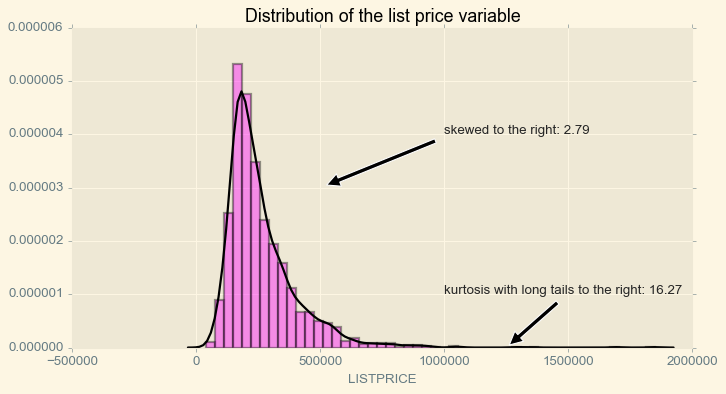

In [1771]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set_style("dark")
ax = sns.distplot(listprice_pd, 
                  hist_kws=dict(edgecolor="black", linewidth=2,
                                color=['magenta']), 
                  color="black")
ax.set_title("Distribution of the list price variable")
ax.annotate('skewed to the right: 2.79', 
            xy=(500000, 0.000003), 
            xytext=(1000000, 0.000004),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('kurtosis with long tails to the right: 16.27', 
            xy=(1250000, 0.000000), 
            xytext=(1000000, 0.000001),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

#### Linear relationship between list price and SalesClosePrice

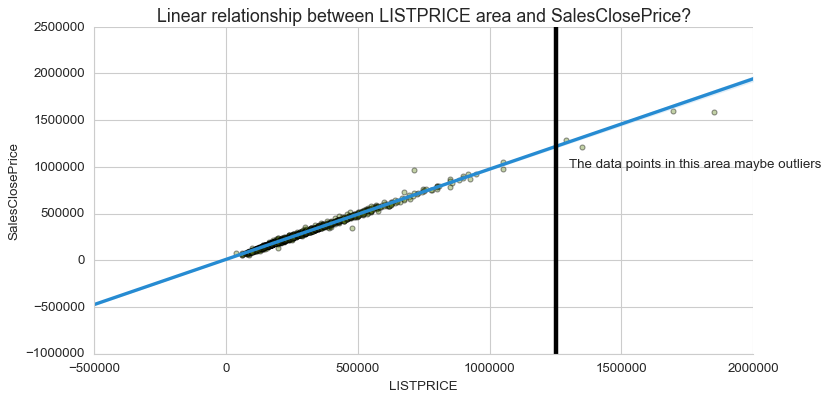

In [1772]:
sns.set_style("whitegrid")
sns.lmplot(x="LISTPRICE", y='SalesClosePrice' , 
           data=rE_22_pd,
           height=5,
           aspect=2,
           scatter_kws = \
           dict(edgecolor="black", linewidth=1,
           alpha=0.4, color="olivedrab"))
# matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, **kwargs)[source]

ax.annotate('kurtosis with long tails to the right: 16.27', 
            xy=(1250000, 0.000000), 
            xytext=(1000000, 0.000001),
            arrowprops=dict(facecolor='black', shrink=0.05))


plt.axvline(x=1250000, ymin=0, ymax=2000000, color='black',
            linewidth=4)

ax = plt.gca()
ax.set_title("Linear relationship between LISTPRICE area and SalesClosePrice?")
ax.annotate("The data points in this area maybe outliers",
            xy=(1300000, 1000000))


plt.show()

#### Other variables with high correlation (above 0.5) with SalesClosePrice 
These are potential features.

In [1773]:
scPrice_05

SalesClosePrice       1.000000
LISTPRICE             0.995956
FOUNDATIONSIZE        0.614258
Fireplaces            0.606025
SQFTABOVEGROUND       0.817004
Taxes                 0.733558
TAXWITHASSESSMENTS    0.701552
LivingArea            0.833658
BATHSTOTAL            0.692826
Bedrooms              0.571523
Name: SalesClosePrice, dtype: float64

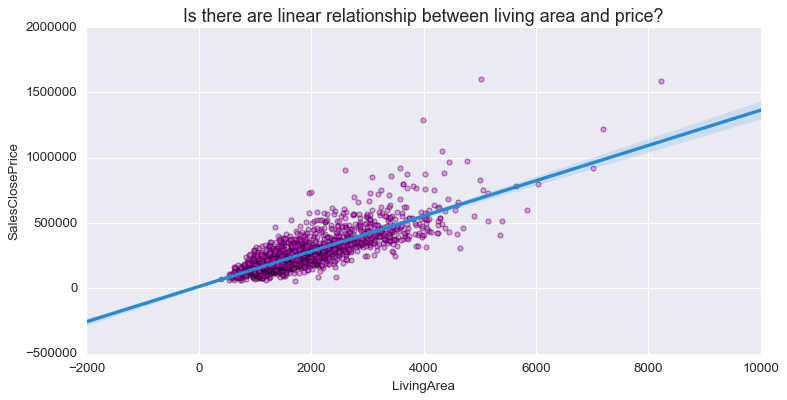

In [1774]:
sns.set_style("darkgrid")
g = sns.lmplot(x="LivingArea", y='SalesClosePrice' , 
               data=rE_22_pd,
               height=5,
               aspect=2,
               scatter_kws = \
               dict(edgecolor="black", linewidth=1,
               alpha=0.4, color="fuchsia"))

ax = plt.gca()
ax.set_title("Is there are linear relationship between living area and price?")
plt.show()

#### LivingArea split by Fireplaces on SalesClosePrice

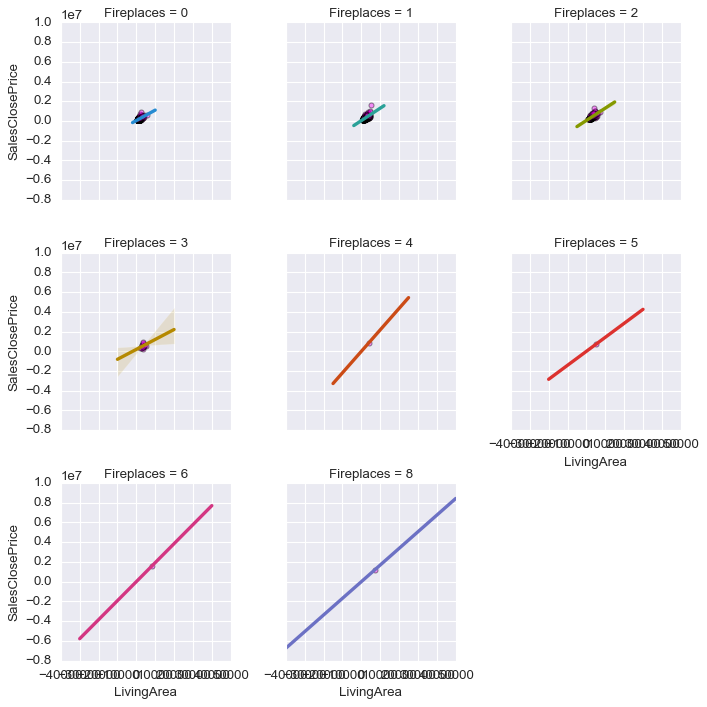

In [1775]:
sns.set_style("darkgrid")
sns.lmplot(x="LivingArea", y='SalesClosePrice' , 
           hue="Fireplaces",
           col="Fireplaces",
           col_wrap=3,
           data=rE_22_pd,
           height=3,
           aspect=1,
           scatter_kws = \
           dict(edgecolor="black", linewidth=1,
           alpha=0.4, color="fuchsia"))

plt.show()

Houses have mostly up to three fire places. More are an exception.
House without fireplaces are common. Dropping observations with
more than three fireplaces could be considered.


#### LivingArea split by Bedrooms on SalesClosePrice

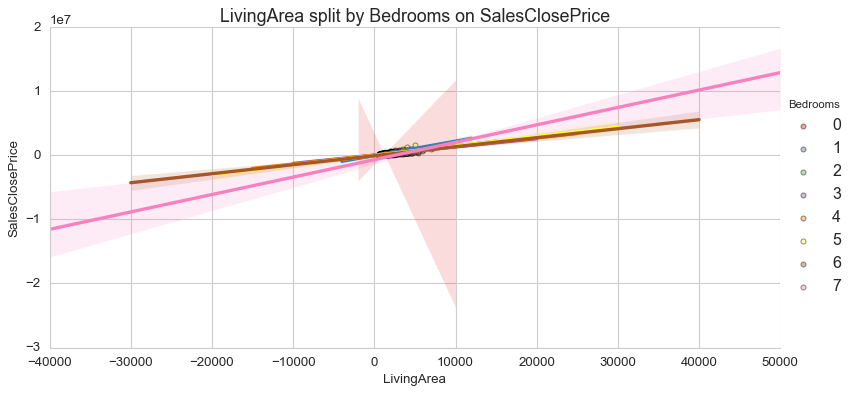

In [1776]:
sns.set_style("whitegrid")
g = sns.lmplot(x="LivingArea", y='SalesClosePrice' , 
               hue="Bedrooms",
               data=rE_22_pd,
               height=5,
               aspect=2,
               scatter_kws = \
               dict(edgecolor="black", linewidth=1,
               alpha=0.4), 
               palette="Set1",
               legend=True)
ax = plt.gca()
ax.set_title("LivingArea split by Bedrooms on SalesClosePrice")
plt.show()

<p>
The number of bedrooms within living area makes not much difference.
Maybe living area give a main effect on price and between
living area and bedrooms exists an interaction effect.
</p> 

#### Interaction effect

<p>
An interaction effect indicates that a third variable influences
the relationship between the dependent and independent variable.
In this case it could be that living area influences the relationship between bedrooms and price.
</p> 


<a href="https://statisticsbyjim.com/regression/interaction-effects/" target="_blank">Understanding Interaction Effects in Statistics</a> 


#### LivingArea split by bathrooms on SalesClosePrice

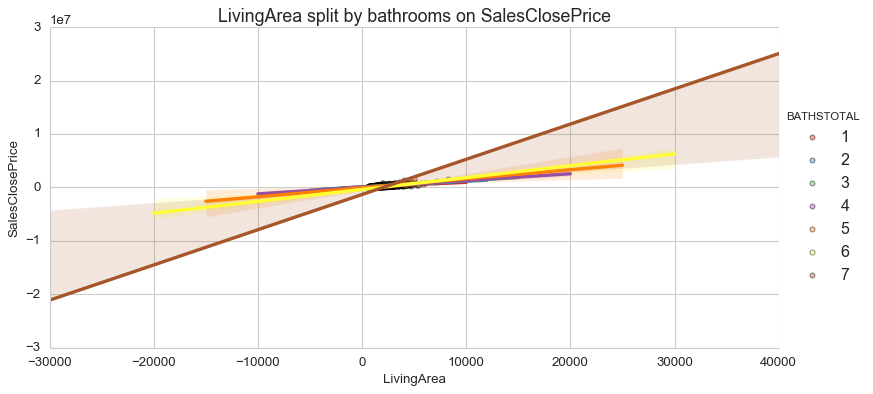

In [1777]:
sns.set_style("whitegrid")
g = sns.lmplot(x="LivingArea", y='SalesClosePrice' , 
               hue="BATHSTOTAL",
               data=rE_22_pd,
               height=5,
               aspect=2,
               scatter_kws = \
               dict(edgecolor="black", linewidth=1,
               alpha=0.4), 
               palette="Set1",
               legend=True,
               fit_reg=True,
               legend_out = True)
ax = plt.gca()
ax.set_title("LivingArea split by bathrooms on SalesClosePrice")

plt.show()

Bathrooms seems to add value and influences price more indepently 
than bedrooms at least in one case.

In [1778]:
# rE_22_pd.info()
pd_numbers_22 = \
rE_22_pd.select_dtypes(include='number')
print(pd_numbers_22.shape)

# remove 'SalesClosePrice' from 
features_22 = \
[i for i in pd_numbers.columns.tolist() if i != 'SalesClosePrice']
features_22 ==  'SalesClosePrice'

pairplot = \
['SalesClosePrice','LISTPRICE','FOUNDATIONSIZE', 'Fireplaces', 'SQFTABOVEGROUND']       

(2084, 27)


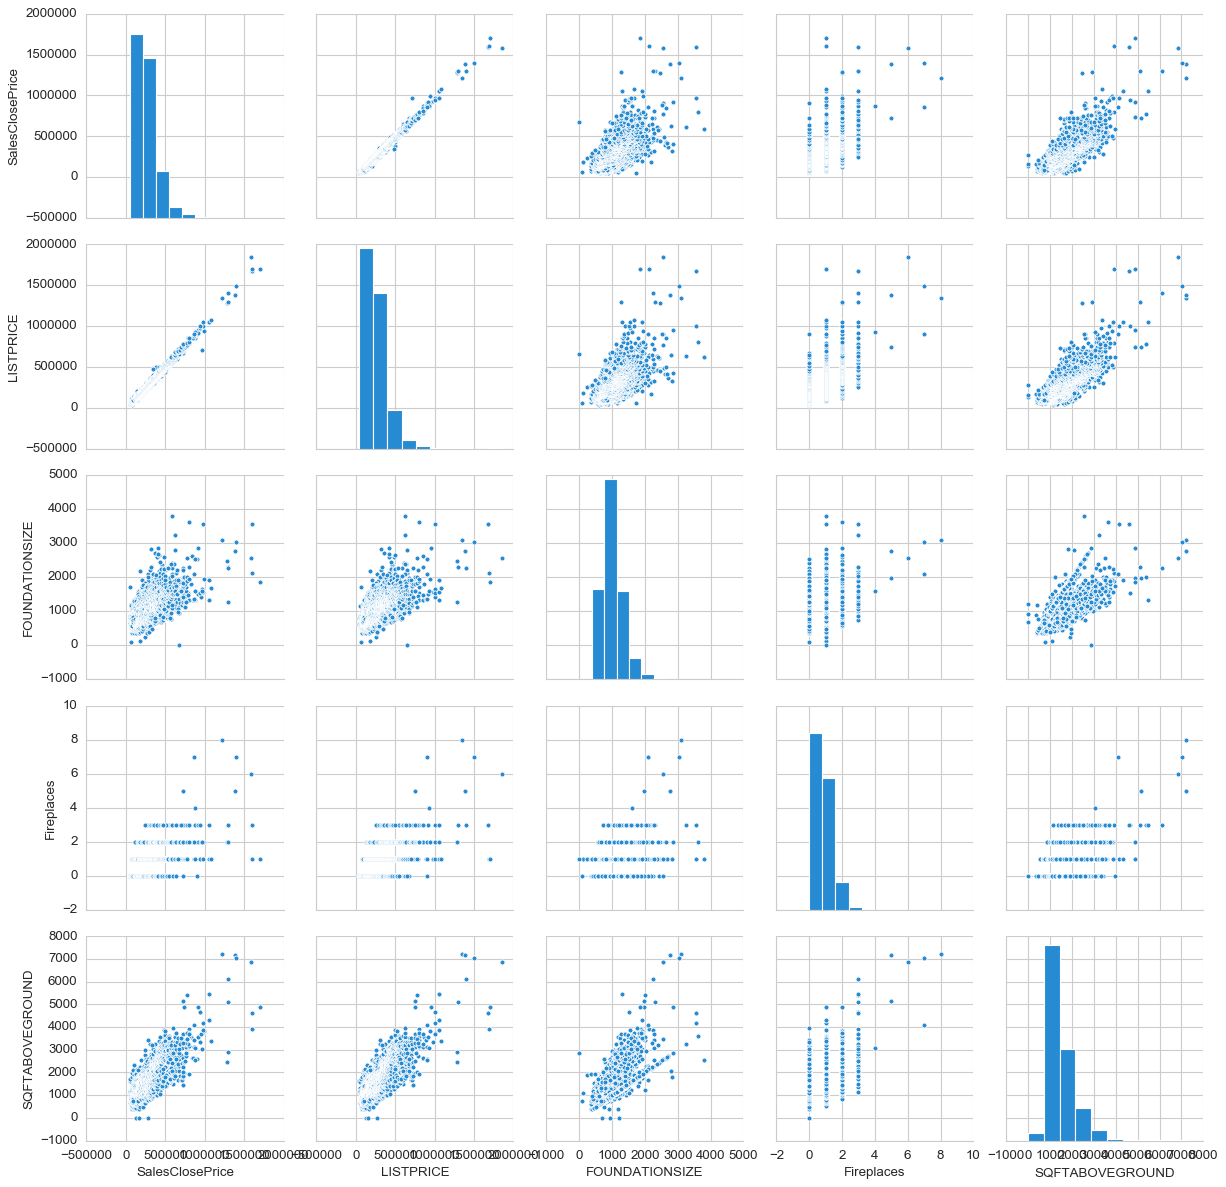

In [1779]:
# pairplot does not allow to set the number of rows
# instead try using plt.subplots within a for loop to 
# control rows and columns
g = sns.pairplot(pd_numbers, x_vars=pairplot,
                 y_vars=pairplot,
                 height=3, aspect=1, dropna=True)

# Joining 

<p>
can add additional data sources to the data set, but can also induce
data errors, if not carried out dilligent. It can also induce
data leakages. Consider here if the the real eastate buyers
did not consider neighbourhood indicators like crime rate or school 
quality, their price offerings cannot be influenced by these indicators
at that point in time. Ergo integrating crime or schooling would
introduce data leackages from outside of their decision horizon.
</p> 
<p>
If the data scientist wants still to introduce indicators he has
to get domain knowledge about buyers and their considerations about
the indicators. This might be a qualitative research process into
their decision making process and raises the question to which degree
the buyers implicitly or explicitly considering indicators. This is 
less a hard numbers driven task as more the attempt to elicit useful
features comparable to requirement analysis in business analysis.
</p> 

<p>
The given real estate data set is joined as a left table with a 
new data set indicating the friendlines of neighborhood like walking
scores. Walk scores are high, when a lot of daily errands do not require a car. Buyers might include this in their decisions.<br>
<a href="https://www.walkscore.com/methodology.shtml" target="_blank">Walk Score Methodology</a> 
</p> 
<p>
The data frame are joined with geocoordinates. This needs
some additional cleaning.
</p> 

In [1780]:
# estate7_drop.printSchema()
print('latitude' in estateParq.columns)
print(estateParq.select('city').distinct().show())

False
+----------------+
|            city|
+----------------+
|LELM - Lake Elmo|
|MAPW - Maplewood|
|  OAKD - Oakdale|
|STP - Saint Paul|
|   WB - Woodbury|
+----------------+

None


#### Importing the score data frame

In [1781]:
scores = \
spark.read.csv('scores_2.csv', header=True, sep=";", inferSchema=True)
print(type(scores))
print(dfShape(scores))
print(scores.show(4))
scores.printSchema()

<class 'pyspark.sql.dataframe.DataFrame'>
shape: n_rows: 4243, n_cols: 6
+---------+----------+---------+---------+----+----+
| latitude| longitude|walkscore|bikescore| _c4| _c5|
+---------+----------+---------+---------+----+----+
|4.492.635|-9.318.928|       61|       72|null|null|
|  449.581|-9.317.982|       74|       83|null|null|
|4.493.788|-9.312.767|       84|       73|null|null|
|4.493.071|-9.309.431|       48|       60|null|null|
+---------+----------+---------+---------+----+----+
only showing top 4 rows

None
root
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- walkscore: integer (nullable = true)
 |-- bikescore: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



There are two unnecessary columns and the data types are
wrong and the geocoordinates got the decimal places wrong.

#### Data cleaning

In [1782]:
scores = scores.drop(*['_c4',  '_c5'])

Making an udf to replace the wrong decimal points with
nothing.

In [1783]:
charReplace = udf(lambda x: x.replace(u'.',''))

In [1784]:
# Applying the udf on every row of the columns
scores = \
scores.withColumn("cleaned_latitude", charReplace(F.col('latitude')))

scores = \
scores.withColumn("cleaned_longitude", charReplace(F.col('longitude')))

scores.select(['cleaned_latitude','cleaned_longitude']).show(5)

+----------------+-----------------+
|cleaned_latitude|cleaned_longitude|
+----------------+-----------------+
|         4492635|         -9318928|
|          449581|         -9317982|
|         4493788|         -9312767|
|         4493071|         -9309431|
|         4497547|          -930679|
+----------------+-----------------+
only showing top 5 rows



Make an udf to ad a decimal at the correct index position.

In [1785]:
# test how adding a string works
stringadd = '3459034'
print(stringadd[:2] + "." + stringadd[2:])
print(len(stringadd))

stringadd_2 = '-978698'
print(stringadd_2[:2] + "." + stringadd_2[2:])
print(len(stringadd_2))
add2 = len(stringadd_2)

34.59034
7
-9.78698
7


Based on this making an udf for this special case.

In [1786]:
addpoint = udf(lambda string: string[:2] + "." + string[2:] )

In [1787]:
scores = \
scores.withColumn('addLatitude', addpoint(F.col('cleaned_latitude')))

scores = \
scores.withColumn('addLongitude', addpoint(F.col('cleaned_longitude')))

In [1788]:
scores.select(['addLatitude', 'addLongitude']).show(4)

+-----------+------------+
|addLatitude|addLongitude|
+-----------+------------+
|   44.92635|   -9.318928|
|    44.9581|   -9.317982|
|   44.93788|   -9.312767|
|   44.93071|   -9.309431|
+-----------+------------+
only showing top 4 rows



Change the datatype of the geocoordinate variables.

In [1789]:
scores = \
scores.withColumn('addLatitude_n', F.col('addLatitude').cast('double'))

scores = \
scores.withColumn('addLongitude_n', F.col('addLongitude').cast('double'))

scores = \
scores.withColumn('bikescore', F.col('bikescore').cast('integer'))

# scores.columns

In [1790]:
scores = \
scores.drop(*['cleaned_latitude', 'cleaned_longitude',
             'addLatitude','addLongitude', 'latitude',
             'longitude'])
# scores.columns

Rename the columns.

In [1791]:
scores = \
scores.withColumnRenamed('addLatitude_n', 'latitude').\
withColumnRenamed('addLongitude_n', 'longitude')

# scores.columns
scores.printSchema()
scores.show(3)

root
 |-- walkscore: integer (nullable = true)
 |-- bikescore: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)

+---------+---------+--------+---------+
|walkscore|bikescore|latitude|longitude|
+---------+---------+--------+---------+
|       61|       72|44.92635|-9.318928|
|       74|       83| 44.9581|-9.317982|
|       84|       73|44.93788|-9.312767|
+---------+---------+--------+---------+
only showing top 3 rows



In [1792]:
scores_columns = scores.columns

missing_values = {}

for col in scores_columns:
    n_missing = \
    scores.where(scores[col].isNull()).count()
    if n_missing > 0:
        missing_values[col] = n_missing
    
print(missing_values)



{'bikescore': 2013, 'latitude': 3, 'longitude': 4}


In [1793]:
print(f"Median: {scores.approxQuantile('bikescore', [0.5], 0.25)[0]}")

# agg(*exprs)
# Compute aggregates and returns the result as a DataFrame.
# The available aggregate functions are avg, max, min, sum, count.
# http://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#pyspark.sql.GroupedData.agg

agg_bike =  \
scores.agg(F.min(scores.bikescore), F.max(scores.bikescore), \
F.avg(scores.bikescore), F.count(scores.bikescore)).show()

print(agg_bike)

Median: 53.0
+--------------+--------------+-----------------+----------------+
|min(bikescore)|max(bikescore)|   avg(bikescore)|count(bikescore)|
+--------------+--------------+-----------------+----------------+
|            12|            88|60.82286995515695|            2230|
+--------------+--------------+-----------------+----------------+

None


In [1794]:
print(f"Median: {scores.approxQuantile('walkscore', [0.5], 0.25)[0]}")

agg_walk =  \
scores.agg(F.min(scores.walkscore), F.max(scores.walkscore), \
F.avg(scores.walkscore), F.count(scores.walkscore)).show()

print(agg_walk)

Median: 13.0
+--------------+--------------+-----------------+----------------+
|min(walkscore)|max(walkscore)|   avg(walkscore)|count(walkscore)|
+--------------+--------------+-----------------+----------------+
|             0|            98|37.54913975960405|            4243|
+--------------+--------------+-----------------+----------------+

None


The median is greater than the average walkscore.
The walkscore distribution is skewed to the right.
The difference is high. This indicates outliers.

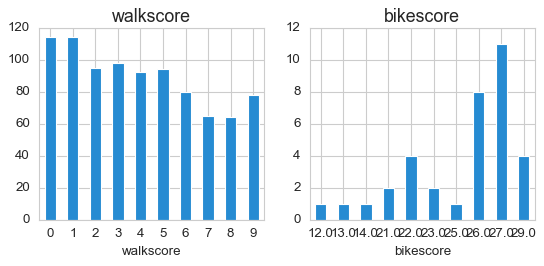

In [1795]:
scores_hdf = scores.toHandy()

fig, ax = plt.subplots(1,2, figsize=(8,3))
scores_hdf.cols['walkscore'].hist(ax=ax[0])
scores_hdf.cols['bikescore'].hist(ax=ax[1])
plt.show()

There are two many observations missing to make the attribute
bikescore a good feature. It is a candidate for dropping. 

#### Importing geocoordinates for the real estate data set

In [1796]:
geocoord = \
spark.read.csv('paul_geocoord.csv', header=True, sep=";",
               inferSchema=True)

geocoord.printSchema()
print(geocoord.show(5))

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)

+----------+---------+
| longitude| latitude|
+----------+---------+
|-9.287.286|4.500.585|
|-9.287.927|4.499.488|
|-9.293.276|4.499.225|
|-9.287.797|  449.948|
|  -929.338|4.499.087|
+----------+---------+
only showing top 5 rows

None


In [1797]:
print(dfShape(estateParq))
print(dfShape(geocoord))

shape: n_rows: 5000, n_cols: 74
shape: n_rows: 5000, n_cols: 2


#### Data cleaning

In [1798]:
# Applying the charReplac udf on every row of the columns
geocoord = \
geocoord.withColumn("latitude", charReplace(F.col('latitude'))).\
withColumn("longitude", charReplace(F.col('longitude')))
# print(geocoord.show(5))

In [1799]:
geocoord = \
geocoord.withColumn("latitude", addpoint(F.col("latitude")))

geocoord = \
geocoord.withColumn("longitude", addpoint(F.col("longitude")))

# print(geocoord.show(5))

Changing data types.

In [1800]:
geocoord = \
geocoord.withColumn("latitude", F.col("latitude").cast('double')).\
withColumn("longitude", F.col("longitude").cast('double'))

# Round percision
geocoord = geocoord.withColumn('longitude', round(geocoord['longitude'], 5))
geocoord = geocoord.withColumn('latitude', round(geocoord['latitude'], 5))
print(geocoord.select('longitude').show(3))

geocoord.printSchema()
print(geocoord.show(5))

+---------+
|longitude|
+---------+
| -9.28729|
| -9.28793|
| -9.29328|
+---------+
only showing top 3 rows

None
root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)

+---------+--------+
|longitude|latitude|
+---------+--------+
| -9.28729|45.00585|
| -9.28793|44.99488|
| -9.29328|44.99225|
|  -9.2878| 44.9948|
| -9.29338|44.99087|
+---------+--------+
only showing top 5 rows

None


Other than column bind in R or concat in pandas in pyspark
there is not a function to concat two data frames.
The workaround here is to equip the data frames with 
an id using monotonically_increasing_id and the join on the id.
This makes of course only sense if the columns of both data frames
are in aligned order. Otherwise this produces semantically errors
while syntactically it would be correct.

In [1801]:
geocoord = geocoord.withColumn('id', monotonically_increasing_id())
print(geocoord.show(2))
print(geocoord.agg({'id':'min'}).collect()[0][0])
print(geocoord.agg({'id':'max'}).collect()[0][0])

print(dfShape(geocoord))

+---------+--------+---+
|longitude|latitude| id|
+---------+--------+---+
| -9.28729|45.00585|  0|
| -9.28793|44.99488|  1|
+---------+--------+---+
only showing top 2 rows

None
0
4999
shape: n_rows: 5000, n_cols: 3


In [1802]:
estate_geo_44 = \
estateParq.withColumn('id', monotonically_increasing_id())
estate_geo_44.select('id').show(3)

print(estate_geo_44.agg({'id':'min'}).collect()[0][0])
print(estate_geo_44.agg({'id':'max'}).collect()[0][0])
# print(estate_geo.columns)
print('id' in estate_geo_44.columns)

+---+
| id|
+---+
|  0|
|  1|
|  2|
+---+
only showing top 3 rows

0
4999
True


Joining estate on geocoordinates.

In [1803]:
on_condition = (estate_geo_44['id'] == geocoord['id'])
estate_geo_22 = \
estate_geo_44.join(geocoord, on = on_condition, how='left' )

estate_geo_22.select(['streetaddress', 'latitude', 'longitude']).\
show(3, truncate=False)

print(dfShape(estate_geo_22))
estate_geo = estate_geo_22

+-----------------------+--------+---------+
|streetaddress          |latitude|longitude|
+-----------------------+--------+---------+
|11511 Stillwater Blvd N|45.00585|-9.28729 |
|11200 31st St N        |44.99488|-9.28793 |
|8583 Stillwater Blvd N |44.99225|-9.29328 |
+-----------------------+--------+---------+
only showing top 3 rows

shape: n_rows: 5000, n_cols: 78


Now we can join the scores data frame with the estateParq data frame
on the geocoordinates.

In [1804]:
# Round percision
estate_geo = estate_geo.withColumn('longitude', round(estate_geo['longitude'], 5))
estate_geo = estate_geo.withColumn('latitude', round(estate_geo['latitude'], 5))
# estate_geo = estate_geo.drop('id')
estate_geo.select('longitude').show(3)
# estate_geo.columns

+---------+
|longitude|
+---------+
| -9.28729|
| -9.28793|
| -9.29328|
+---------+
only showing top 3 rows



In [1805]:
geocoord.columns
geocoord.count()

5000

"df.join(other, on, how) when on is a column name string, or a list of column names strings, the returned dataframe will prevent duplicate columns. when on is a join expression, it will result in duplicate columns."
<a href="https://stackoverflow.com/questions/46944493/removing-duplicate-columns-after-a-df-join-in-spark" target="_blank">Stack</a> 


In [1806]:
on_condition_2 =\
(estate_geo['longitude'] == scores['longitude']) & \
(estate_geo['latitude'] == scores['latitude'])
# join estateParq as left table on scores as right table
join_scores = \
estate_geo.join(scores, on=[on_condition_2], how='left').\
drop(estate_geo.latitude).drop(estate_geo.longitude)

print(dfShape(join_scores))
print(dfShape(estate_geo))
print(dfShape(estateParq))

# print(join_scores.columns)
print(join_scores.select(['walkscore', 'bikescore', 'latitude', 'longitude']).show(3))

shape: n_rows: 5000, n_cols: 80
shape: n_rows: 5000, n_cols: 78
shape: n_rows: 5000, n_cols: 74
+---------+---------+--------+---------+
|walkscore|bikescore|latitude|longitude|
+---------+---------+--------+---------+
|     null|     null|    null|     null|
|     null|     null|    null|     null|
|     null|     null|    null|     null|
+---------+---------+--------+---------+
only showing top 3 rows

None


In [1807]:
print(join_scores.columns[len(join_scores.columns)-4:len(join_scores.columns)])

joinScores_33 = join_scores.columns[len(join_scores.columns)-4:len(join_scores.columns)]
missing_values_222 = {}

for col in joinScores_33:
    n_missing = \
    join_scores.where(join_scores[col].isNull()).count()
    if n_missing > 0:
        missing_values_222[col] = n_missing
    
print(missing_values_222)
print(len(missing_values_222))
print(dfShape(join_scores))

['walkscore', 'bikescore', 'latitude', 'longitude']
{'walkscore': 4514, 'bikescore': 4754, 'latitude': 4514, 'longitude': 4514}
4
shape: n_rows: 5000, n_cols: 80


This is a left join with estate_geo (based on estateParq) as left table.
The left join includes all records from estate_geo and includes records
from the right table, where key variables matches a condition. If there
is not a match the left records are still included and null-values are placed
in the right columns. So subtracting the null values above from 5000 gives
you the number of matches.

In [1808]:
matches_222 = {}
for k,v in missing_values_222.items():
    matches_222[k] = 5000 - v

    
print(f"matches: {matches_222}")    

matches: {'walkscore': 486, 'bikescore': 246, 'latitude': 486, 'longitude': 486}


In [1809]:
walkscores = join_scores.where(~F.col('walkscore').isNull())

print(dfShape(walkscores))
print(type(walkscores))
walkscores.select(['streetaddress' ,'walkscore']).show(2, truncate=False)


shape: n_rows: 486, n_cols: 80
<class 'pyspark.sql.dataframe.DataFrame'>
+-----------------+---------+
|streetaddress    |walkscore|
+-----------------+---------+
|2915 Inwood Ave N|2        |
|3604 Layton Ave N|40       |
+-----------------+---------+
only showing top 2 rows



In [1810]:
walkscores_pd = walkscores.toPandas() 
walkscores_pd_2 = walkscores_pd[['streetaddress' ,'walkscore', 'SalesClosePrice']].\
sort_values(by='walkscore', ascending=False)
print(walkscores_pd_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 115 to 485
Data columns (total 3 columns):
streetaddress      486 non-null object
walkscore          486 non-null int32
SalesClosePrice    486 non-null int32
dtypes: int32(2), object(1)
memory usage: 11.4+ KB
None


In [1811]:
walkscores_topTen = walkscores_pd_2.iloc[:10,:]
print(walkscores_topTen )

walkscores_middle = walkscores_pd_2.iloc[200:210,:]
print(walkscores_middle )

                streetaddress  walkscore  SalesClosePrice
115     488 Wabasha St N, 503         97            74000
234  350 Saint Peter St, 1104         96           194500
278   350 Saint Peter St, 407         96           225000
329  350 Saint Peter St, 1202         96           332000
145   350 Saint Peter St, 419         96           135000
247  350 Saint Peter St, 1007         96           190000
267   350 Saint Peter St, 808         96           215900
229   350 Saint Peter St, 705         96           179500
224   350 Saint Peter St, 704         96           185000
256   350 Saint Peter St, 302         96           212000
              streetaddress  walkscore  SalesClosePrice
295        1989 Foxridge Rd         43           259000
182          119 Granite St         43           160000
246         1624 Wilson Ave         43           197000
32         1888 Flandrau St         42           170000
330  2221 Youngman Ave, 301         42           349900
84      6866 Upper 5th St 

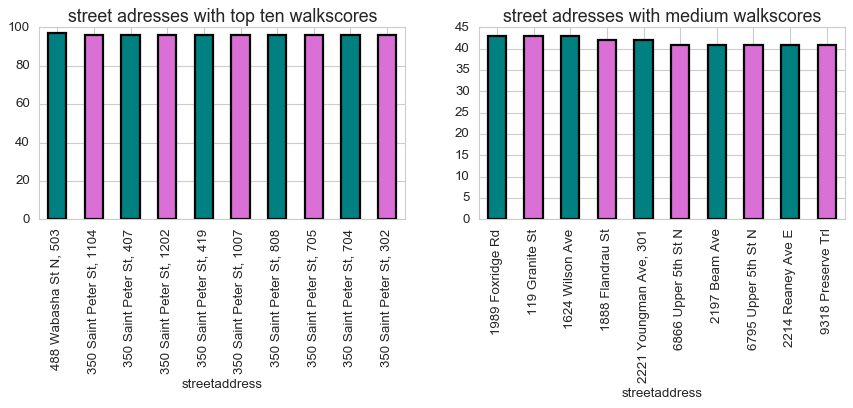

In [1812]:
fig, ax = plt.subplots(1,2, figsize=(13,3))
plt.subplots_adjust(hspace=0.3)

walkscores_topTen.plot.bar(x='streetaddress', y='walkscore', edgecolor='black',
                         linewidth=2, color=['teal', 'orchid'], ax=ax[0], legend=False,
                          title="street adresses with top ten walkscores")
walkscores_middle.plot.bar(x='streetaddress', y='walkscore', edgecolor='black',
                         linewidth=2, color=['teal', 'orchid'], ax=ax[1], legend=False,
                          title="street adresses with medium walkscores")

plt.show()

In [1813]:
gb_walk = walkscores_pd.groupby('walkscore')['SalesClosePrice'].mean().sort_values()
gb_walk[:10]

walkscore
97     74000.000000
79     97133.333333
76    100000.000000
85    135700.000000
33    143030.000000
27    148000.000000
54    151250.000000
35    156125.000000
83    156450.000000
75    165000.000000
Name: SalesClosePrice, dtype: float64

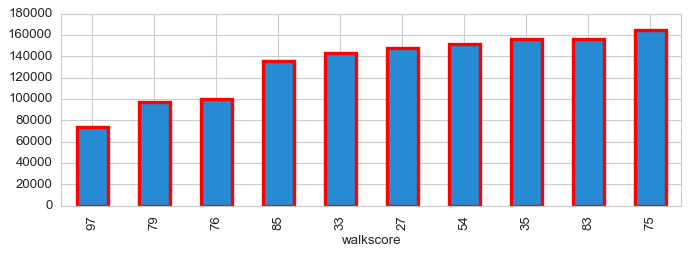

In [1814]:
gb_walk[:10].plot.bar(edgecolor='red', linewidth=3, figsize=(10,3))
plt.show()

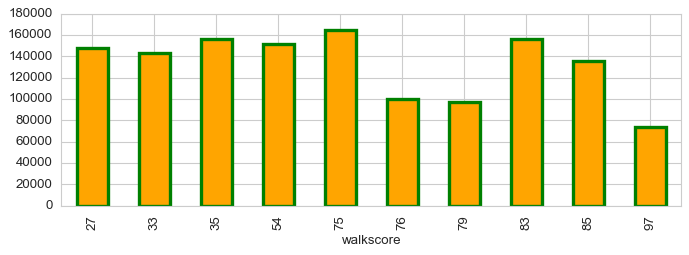

In [1815]:
gb_walk[:10].sort_index().plot.bar(edgecolor='green', linewidth=3, figsize=(10,3), 
                                   color='orange')
plt.show()

                 walkscore  SalesClosePrice
walkscore         1.000000        -0.220546
SalesClosePrice  -0.220546         1.000000


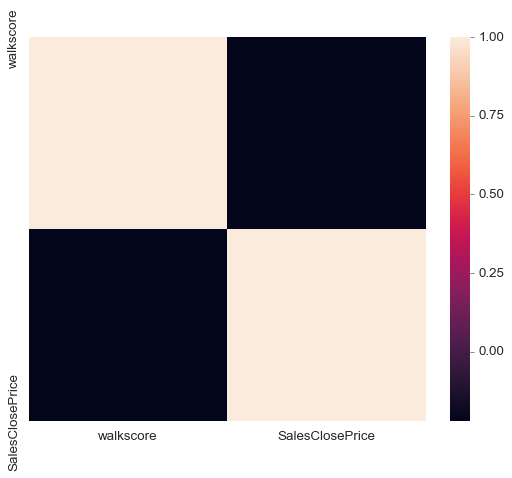

In [1816]:
walk_scp = walkscores_pd[['walkscore', 'SalesClosePrice']]
walk_scp_corr = walk_scp.corr()
print(walk_scp_corr )
g=sns.heatmap(walk_scp_corr)

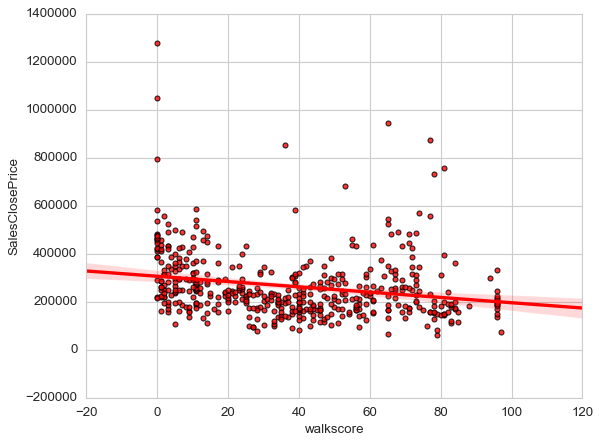

In [1817]:
g = sns.regplot(x='walkscore', y='SalesClosePrice', 
                data=walk_scp , color="red",
                scatter_kws = dict(edgecolor="black", linewidth=1))

There is a slight negative correlation between walkscore and sales close price.
The lower the sales close price the lower the walk score.
At least on the first look this seems contra intuitve.
If buyers are interested in high walkscores the opposite should be true.
Of course it could be true that buyers with a higher sales close price
would prefer a more isolated location and run errands with the car.

Using SQL for joining tables.

In [1818]:
estate_geo.createOrReplaceTempView("geo_table")
scores.createOrReplaceTempView("scores_table")

print(spark_session.catalog.listTables())

[Table(name='estate5', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate5_table', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate6_table', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='estate5_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='estate6_windows', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='estate_sql', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='geo_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='scores_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [1819]:
sqlJoin_scores =\
"""Select * FROM geo_table AS g 
   LEFT JOIN scores_table AS s
   ON g.longitude = s.longitude
   AND g.latitude = s.latitude
   """

sqlJoin_scores = spark.sql(sqlJoin_scores )
print(type(sqlJoin_scores ))
print(dfShape(sqlJoin_scores ))
sqlJoin_len = len(sqlJoin_scores.columns)
cols_to_drop_33 = sqlJoin_scores.columns[sqlJoin_len-2: sqlJoin_len]
sqlJoin_scores = sqlJoin_scores.drop(*cols_to_drop_33)
# print(sqlJoin_scores.columns)

<class 'pyspark.sql.dataframe.DataFrame'>
shape: n_rows: 5000, n_cols: 82


In [1820]:
# sqlJoin_scores_missing = missingVar(sqlJoin_scores)
# print(sqlJoin_scores_missing)

# Data cleaning

<p>
is conducted here directly on the pyspark.sql.dataframe and not like
above doing the detour on the Pandas data frame. As most machine learning
algorithms can only process numerical information text variables must either be encoded or dropped depending on their information value. This requires often domain knowledge given by external experts. Dropping variables, which are not working as features, is a kind of feature engineering. Another reason for dropping variables maybe missing values. 
This is considered below.
</p> 

In [1821]:
estateParq.printSchema()

root
 |-- number: integer (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: integer (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: integer (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: integer (nullable = true)
 |-- LISTDATE: string (nullable = true)
 |-- LISTPRICE: integer (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: integer (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: integer (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: integer (nullable = true)
 |-- offmarketdate: string (nullable = true)
 |-- Fireplaces: integer (nullable = true)
 |-- RoomArea4: string (nullabl

### Dropping columns or variables

In [1822]:
# MLSID has only one type of value
estateParq.select('MLSID').distinct().show()

+-----+
|MLSID|
+-----+
| RMLS|
+-----+



Number and unitnumber are only identifiers without inherent 
information value. 

In [1823]:
estateParq.select(['Number', 'UNITNUMBER', 'CLASS', 
                   'STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS',
                   'MLSID'])

# columns to drop from the data frame
drop_cols = ['Number', 'UNITNUMBER', 'CLASS', 
             'STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']

# the * tells spark to expect a list
estateParq2 = estateParq.drop(*drop_cols )

# check if dropped variables are in the columns any longer
check_drop = list()
for i in  drop_cols:
    print(i in estateParq2.columns)
    k = i in estateParq2.columns
    check_drop.append(k)
print(check_drop )

False
False
False
False
False
[False, False, False, False, False]


### Dropping observations or values

<p>
The domain knowledge gives the information that the value
'(SF) Other' of the style variable is negligible and
the 'yes' values in the 'AssumableMortgage' variable
are uncommon terns. These values can also be dropped.
</p> 

#### style

In [1824]:
estateParq2.select('style').distinct().show(truncate=False)

+-----------------------------+
|style                        |
+-----------------------------+
|(SF) One Story               |
|(SF) Split Entry (Bi-Level)  |
|(TH) Side x Side             |
|(TH) Quad/4 Corners          |
|(SF) Two Stories             |
|(SF) One 1/2 Stories         |
|(SF) Four or More Level Split|
|(TH) Detached                |
|(TW) Twin Home               |
|(SF) Modified Two Story      |
|(CC) Low Rise (3- Levels)    |
|(CC) High Rise (4+ Levels)   |
|(CC) Manor/Village           |
|(SF) Three Level Split       |
|(SF) Other                   |
|(SF) More Than Two Stories   |
|(CC) Converted Mansion       |
|(CC) Two Unit                |
+-----------------------------+



In [1825]:
style_1 = estateParq2.where(estateParq2['style']=='(SF) Other')
print(dfShape(style_1))

shape: n_rows: 5, n_cols: 69


In [1826]:
estate3 = estateParq2.where(~estateParq2['style'].like('(SF) Other')|
                             estateParq2['style'].isNull())

dfShape(estate3)

'shape: n_rows: 4995, n_cols: 69'

#### AssumableMortgage

In [1827]:
estate3.select('AssumableMortgage').distinct().show()

+-------------------+
|  AssumableMortgage|
+-------------------+
|               null|
|      Not Assumable|
| Information Coming|
|Yes w/No Qualifying|
|  Yes w/ Qualifying|
+-------------------+



In [1828]:
qualifying = ['Yes w/No Qualifying', 'Yes w/ Qualifying']

In [1829]:
filter_mask_56 = \
~estate3['ASSUMABLEMORTGAGE'].isin(qualifying) | estate3['ASSUMABLEMORTGAGE'].isNull()
estate3 = estate3.where(filter_mask_56)
dfShape(estate3)

'shape: n_rows: 4971, n_cols: 69'

### Outliers

<p>
Above outlier detection with pandas used the Z-scores.
Instead here the "margin of error" is applied to filter
outliers from the respond variable SalesClosePrice.
</p> 

#### Mean

In [1830]:
# check if the SalesClosePrice is in the columns
print('SalesClosePrice' in estate3.columns)

mean_scp = estate3.agg({'SalesClosePrice': 'mean'}).collect()
print(mean_scp)
print(type(mean_scp))
# [0][0] extracts the bare number
mean_scp = mean_scp[0][0]
print(mean_scp)

True
[Row(avg(SalesClosePrice)=262641.4170187085)]
<class 'list'>
262641.4170187085


#### Median

In [1831]:
# https://stackoverflow.com/questions/31432843/how-to-find-median-and-quantiles-using-spark
median_scp = \
estate3.approxQuantile('SalesClosePrice', [0.5], 0.25)[0]
print(type(median_scp))
print(median_scp)

difference_mean_median = mean_scp - median_scp
print(f"difference between mean and median: {difference_mean_median}")

<class 'float'>
174136.0
difference between mean and median: 88505.41701870848


A great difference between mean and median indicates outliers.
In a perfect symmetric distributions mean and median are equal.

In [1832]:
std_scp = estate3.agg({'SalesClosePrice': 'stddev'}).collect()[0][0]
print(std_scp)

140146.87659951497


In [1833]:
# 3 standard deviations away from the mean
# like demonstrated above
upper_bound = mean_scp + (3*std_scp)
print(upper_bound)

lower_bound = mean_scp - (3*std_scp)
print(lower_bound)

683082.0468172533
-157799.21277983644


In [1834]:
# getting values, which are outliers
estate_outliers = \
estate3.where((estate3['SalesClosePrice'] > upper_bound) |
              (estate3['SalesClosePrice'] < lower_bound))

print(dfShape(estate_outliers))
estate_outliers_2 = \
estate_outliers.select(['STREETNAME', 'SalesClosePrice']).\
orderBy('SalesClosePrice', ascending=False)

estate_outliers_2.show(10)
# estate_outliers.printSchema()

shape: n_rows: 77, n_cols: 69
+-----------------+---------------+
|       STREETNAME|SalesClosePrice|
+-----------------+---------------+
|           Summit|        1700000|
|          Osceola|        1600000|
|Mississippi River|        1595000|
|           Summit|        1585000|
|           Summit|        1400000|
|           Summit|        1380000|
|         Woodlawn|        1300000|
|          Kenwood|        1295000|
|          Lincoln|        1290000|
| Whistling Valley|        1277023|
+-----------------+---------------+
only showing top 10 rows



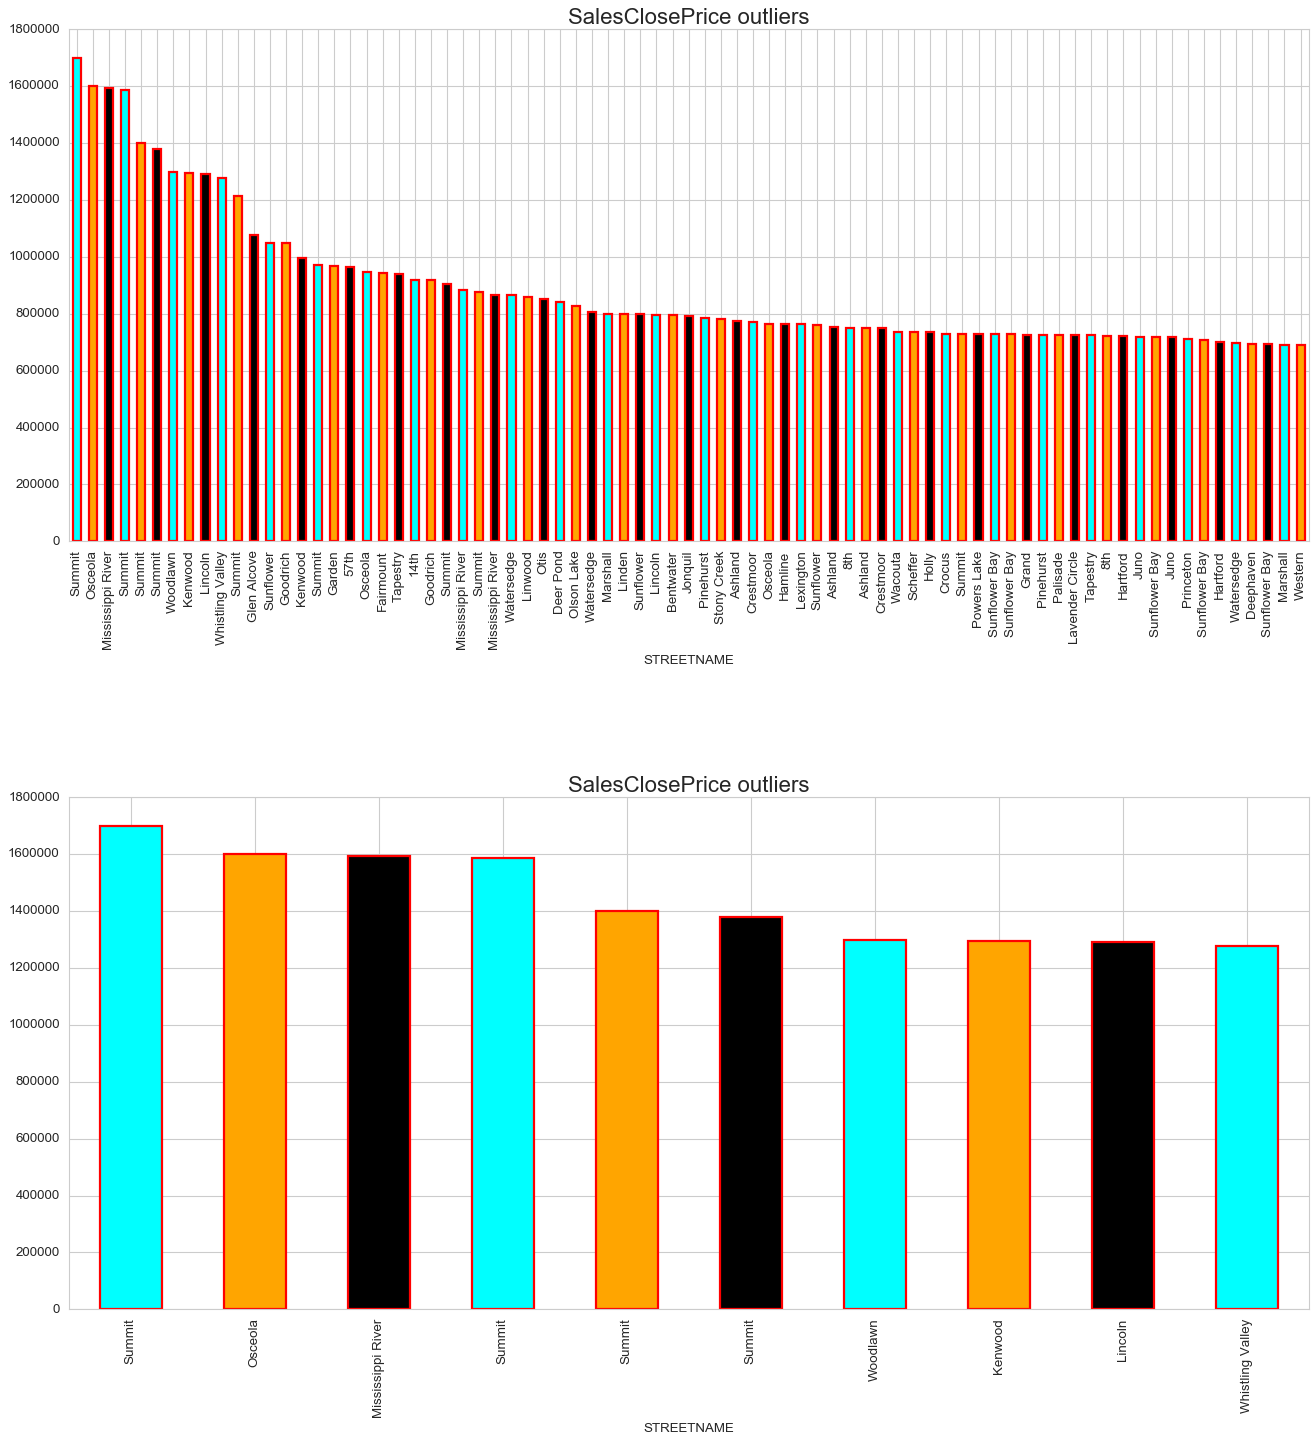

In [1835]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20))
# matplotlib.pyplot.subplots_adjust(left=None, bottom=None, 
# right=None, top=None, wspace=None, hspace=None)
plt.subplots_adjust(hspace=0.5)


estate_outliers_2.toPandas().plot.bar(x='STREETNAME',
                                      y='SalesClosePrice',
                                      color=['cyan', 'orange', 'black'],
                                      legend = False,
                                      ax=ax1,
                                      edgecolor="red",
                                      linewidth=2)

ax1.set_title('SalesClosePrice outliers', fontsize=20)

topten1 = estate_outliers_2.toPandas().iloc[:10,:]

topten1.plot.bar( x='STREETNAME', 
                  y='SalesClosePrice',
                  color=['cyan', 'orange', 'black'],
                  legend = False,
                  ax=ax2,
                  edgecolor="red",
                  linewidth=2)

ax2.set_title('SalesClosePrice outliers', fontsize=20)
plt.show()

In [1836]:
# getting values, which are not outliers
estate4 = \
estate3.where(~(estate3['SalesClosePrice'] > upper_bound) |
              (estate3['SalesClosePrice'] < lower_bound))

print(dfShape(estate4))
# row count of estate_outliers and estate4 does not match?
# if estate_outliers are 77 and number of rows before filtering
# for outliers was 4971 the number of data points afterwards
# should be 4894
# solution: filtering with reversed operators (>) does not work
# ~ tilde works and excludes the outliers from the data set

print(type(estate4))

shape: n_rows: 4894, n_cols: 69
<class 'pyspark.sql.dataframe.DataFrame'>


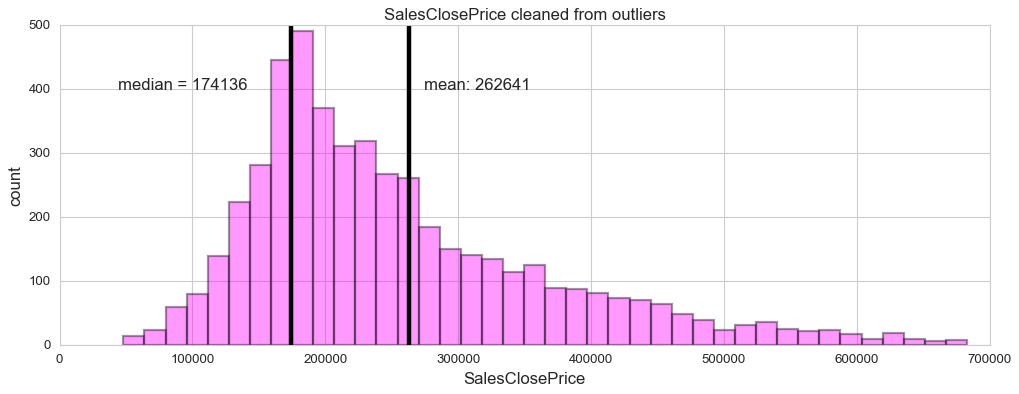

In [1837]:
estate4_pd = estate4.toPandas()
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.set_style("darkgrid")
sns.distplot(estate4_pd['SalesClosePrice'],
             ax=ax, kde=False, axlabel=False,
             norm_hist=False,
             hist_kws=dict(edgecolor='black', 
                           linewidth=2,
                           color='magenta'))

ax.set_title("SalesClosePrice cleaned from outliers", fontsize=15)
ax.annotate("mean: 262641", xy=(mean_scp + 12000, 400), fontsize=15)
ax.axvline(x=mean_scp, ymin=0, ymax=1, color='black',
           linewidth=4)
ax.annotate("median = 174136", xy=(median_scp - 130000, 400), fontsize=15)
ax.axvline(x=median_scp, ymin=0, ymax=1, color='black',
           linewidth=4)
ax.set_ylabel("count", fontsize=15)
ax.set_xlabel("SalesClosePrice", fontsize=15)


plt.show()

The median is greater than the mean. This is typical for 
right skewed distributions.

In [1838]:
isinstance(estate4, DataFrame)

True

In [1839]:
def removeOutliers(df, col):
    
    """Removing outliers from one dedicated variable
    of a data frame"""
    
    assert (True == isinstance(df, DataFrame)), \
    "This is not a DataFrame."
    
    assert (True == isinstance(col, str)), \
    "Input must be a string."
    
    mean = df.agg({col: 'mean'}).collect()[0][0]
    std = df.agg({col: 'stddev'}).collect()[0][0]
    
    # 3 standard deviations away from the mean
    # is the border to outliers
    upper_bound = mean + (3*std)
    lower_bound = mean - (3*std)
    
    
    df = \
    df.where(~(df[col] > upper_bound) | 
            (df[col] < lower_bound))
    
    return df


In [1840]:
# testing if the user defined function works
estate411 = removeOutliers(df=estate4, col='OriginalListPrice')

print(estate4.select('OriginalListPrice').count())
print(estate411.select('OriginalListPrice').count())

max_before = \
estate4.agg({'OriginalListPrice':'max'}).collect()[0][0]
print(f"Maximum before removing: {max_before}")

max_after = \
estate411.agg({'OriginalListPrice':'max'}).collect()[0][0]

print(f"Maximum before removing: {max_after}")


4894
4890
Maximum before removing: 21990000
Maximum before removing: 720000


The function works. The next step is to adjust the function for
a number of variables.

In [1841]:
def removeOutliers_fromList(df, colList):
    
    """Removing outliers from a list of variables
    of a data frame"""
    
    assert (True == isinstance(df, DataFrame)), \
    "This is not a DataFrame."
    
    assert (True == isinstance(colList, list)), \
    "Input must be a list."
    
    # using the helper function from above
    # alernatively doing this with list comprehension here
    # could be more safe when in other cases
    # it is forgotten to use both functions together
    stringCheck = checkList_forStrings(colList)
    assert (stringCheck), \
    "All list elements must be strings."
    
    for col in colList:
        mean = df.agg({col: 'mean'}).collect()[0][0]
        std = df.agg({col: 'stddev'}).collect()[0][0]
        # 3 standard deviations away from the mean
        # is the border to outliers
        upper_bound = mean + (3*std)
        lower_bound = mean - (3*std)
        df = \
        df.where(~(df[col] > upper_bound) | 
                 (df[col] < lower_bound))
    
    return df


In [1842]:
# testing if the user defined function works
estate422 = \
removeOutliers_fromList(estate4,['OriginalListPrice', 'SalesClosePrice'])

In [1843]:
print(estate4.select('OriginalListPrice').count())
print(estate422.select('OriginalListPrice').count())

4894
4829


Removing outliers from many variables reduces not only
the number of observations overall, but can change the minima and
maxima because here the complete observations are removed from
the data frame.

In [1844]:
max_before_SalesClosePrice = \
estate4.agg({'SalesClosePrice':'max'}).collect()[0][0]
print(f"SalesClosePrice maximum before removing: {max_before_SalesClosePrice}")

max_after_422_SalesClosePrice = \
estate422.agg({'SalesClosePrice':'max'}).collect()[0][0]

print(f"SalesClosePrice maximum before removing: {max_after_422_SalesClosePrice}")


SalesClosePrice maximum before removing: 683000
SalesClosePrice maximum before removing: 590000


In [1845]:
max_before_OriginalListPrice = \
estate4.agg({'OriginalListPrice':'max'}).collect()[0][0]
print(f"OriginalListPrice maximum before removing: {max_before_OriginalListPrice}")

max_after_422_max_before_OriginalListPrice = \
estate422.agg({'OriginalListPrice':'max'}).collect()[0][0]

print(f"OriginalListPrice maximum before removing: {max_after_422_max_before_OriginalListPrice}")


OriginalListPrice maximum before removing: 21990000
OriginalListPrice maximum before removing: 675000


## Missing values

<p>
There are many reasons for missing data, for example flawed data collection, data base storage
error, joining data sources wrongly, or missing data is intentionally left out for protecting 
privacy. Missing values are mostly dropped, when those are rare or missing completely at
random.
</p> 

<p>
Checking for missing data:
</p> 

In [1846]:
estate4.where(estateParq['ROOF'].isNull()).count()

753

In [1847]:
estate4.where(estateParq['SalesClosePrice'].isNull()).count()

0

#### Finding variables with missing values

In [1848]:
estate_columns = estate4.columns

missing_values = {}

for col in estate_columns:
    n_missing = \
    estate4.where(estate4[col].isNull()).count()
    if n_missing > 0:
        missing_values[col] = n_missing
    
print(missing_values)

{'FENCE': 1985, 'RoomArea4': 298, 'ROOF': 753, 'RoomFloor4': 151, 'PoolDescription': 3228, 'RoomFloor1': 338, 'RoomArea1': 443, 'APPLIANCES': 323, 'backonmarketdate': 4894, 'ROOMFAMILYCHAR': 1938, 'RoomArea3': 2288, 'RoomFloor3': 2181, 'RoomFloor2': 978, 'RoomArea2': 1116, 'DiningRoomDescription': 634, 'BATHSTHREEQUARTER': 1, 'BATHDESC': 358, 'RoomArea5': 241, 'RoomFloor5': 143, 'RoomArea6': 386, 'RoomFloor6': 291, 'RoomArea7': 1513, 'RoomFloor7': 1430, 'RoomArea8': 3451, 'RoomFloor8': 3407, 'AssumableMortgage': 3045}


In [1849]:
def missingVar(df):
    """checks if the variables of a pyspark data frame
    contains missing values and returns the sums as a dict"""
    
    assert 1 == isinstance(df, DataFrame), \
    "This is not a data frame"
    
    missing_values = {}
    
    for col in df.columns:
        n_missing = df.where(df[col].isNull()).count()
        if n_missing > 0:
            missing_values[col] = n_missing
        
    return missing_values


In [1850]:
from time import time
t0 = time()
estate4_missing_2 = missingVar(estate4)
tt = time() - t0
print(tt)
print(estate4_missing_2 )

7.085146188735962
{'FENCE': 1985, 'RoomArea4': 298, 'ROOF': 753, 'RoomFloor4': 151, 'PoolDescription': 3228, 'RoomFloor1': 338, 'RoomArea1': 443, 'APPLIANCES': 323, 'backonmarketdate': 4894, 'ROOMFAMILYCHAR': 1938, 'RoomArea3': 2288, 'RoomFloor3': 2181, 'RoomFloor2': 978, 'RoomArea2': 1116, 'DiningRoomDescription': 634, 'BATHSTHREEQUARTER': 1, 'BATHDESC': 358, 'RoomArea5': 241, 'RoomFloor5': 143, 'RoomArea6': 386, 'RoomFloor6': 291, 'RoomArea7': 1513, 'RoomFloor7': 1430, 'RoomArea8': 3451, 'RoomFloor8': 3407, 'AssumableMortgage': 3045}


#### Adding a column "proportion of missing values"

In [1851]:
missing_pd = pd.DataFrame(missing_values.items(), columns=['variable', 'missing_values'])
missing_pd['proportion'] = missing_pd['missing_values'] / 5000
missing_0 = \
missing_pd[missing_pd.missing_values > 0].sort_values(by='missing_values', ascending=False)


missing_0

variable  missing_values  proportion
8        backonmarketdate            4894      0.9788
23              RoomArea8            3451      0.6902
24             RoomFloor8            3407      0.6814
4         PoolDescription            3228      0.6456
25      AssumableMortgage            3045      0.6090
10              RoomArea3            2288      0.4576
11             RoomFloor3            2181      0.4362
0                   FENCE            1985      0.3970
9          ROOMFAMILYCHAR            1938      0.3876
21              RoomArea7            1513      0.3026
22             RoomFloor7            1430      0.2860
13              RoomArea2            1116      0.2232
12             RoomFloor2             978      0.1956
2                    ROOF             753      0.1506
14  DiningRoomDescription             634      0.1268
6               RoomArea1             443      0.0886
19              RoomArea6             386      0.0772
16               BATHDESC             358      0.0716
5              RoomFloor1             338      0.0676
7              APPLIANCES             323      0.0646
1               RoomArea4             298      0.0596
20             RoomFloor6             291      0.0582
17              RoomArea5             241      0.0482
3              RoomFloor4             151      0.0302
18             RoomFloor5             143      0.0286
15      BATHSTHREEQUARTER               1      0.0002

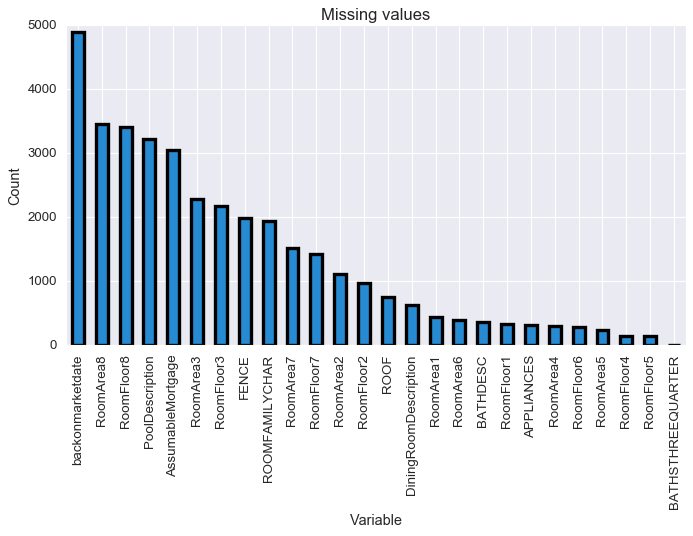

In [1852]:
missing_0.plot.bar(x='variable', y='missing_values', legend=False,
                   edgecolor='black', linewidth=3, figsize=(10,5))
plt.title("Missing values", fontsize=15)
plt.xlabel("Variable", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.show()

#### Missing values in Pandas

In [1853]:
pd_22 = estate4.toPandas()
pd_22_null = pd_22.isnull()
print(type(pd_22_null))

pd_22_null_sum = pd_22_null.sum()
print(type(pd_22_null_sum ))
topten = pd_22_null_sum.sort_values(ascending=False)[:10]
print(topten)

topten_index = topten.index.tolist()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
backonmarketdate     4894
RoomArea8            3451
RoomFloor8           3407
PoolDescription      3228
AssumableMortgage    3045
RoomArea3            2288
RoomFloor3           2181
FENCE                1985
ROOMFAMILYCHAR       1938
RoomArea7            1513
dtype: int64


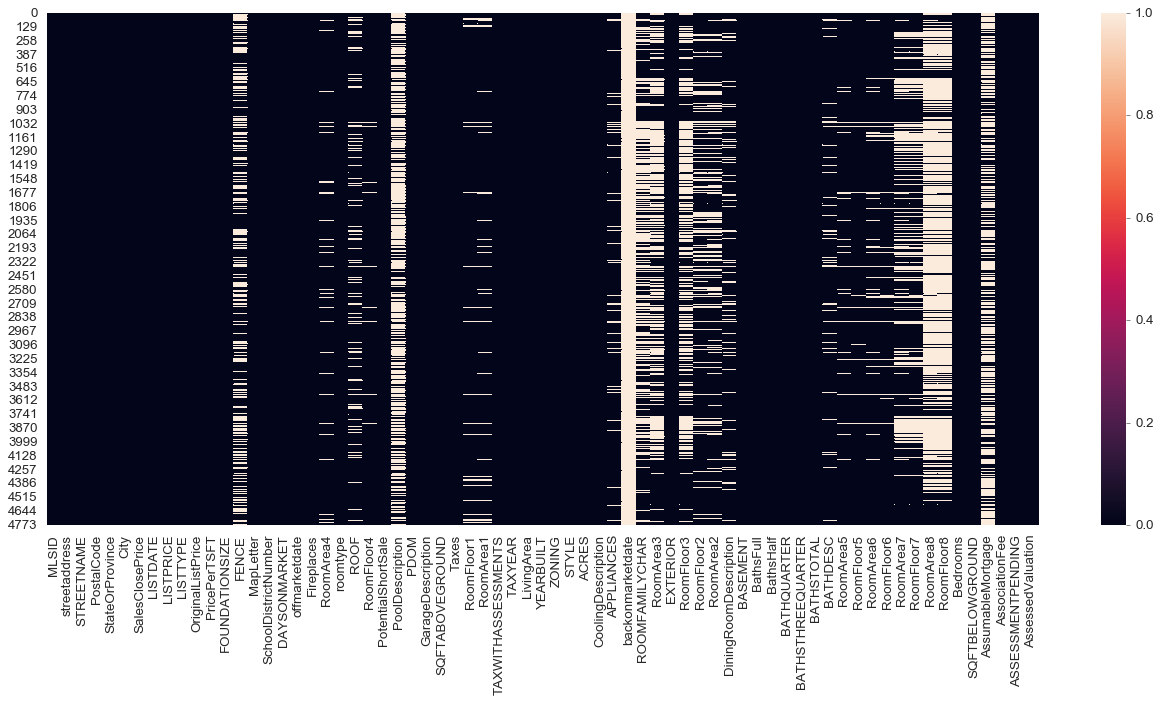

In [1854]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(pd_22_null, ax=ax)
plt.show()

Black = negative - 0 null values, light_color = postive - 1 null values. The more
black the lower the number of null values.<br>
Below are the top_ten null values.

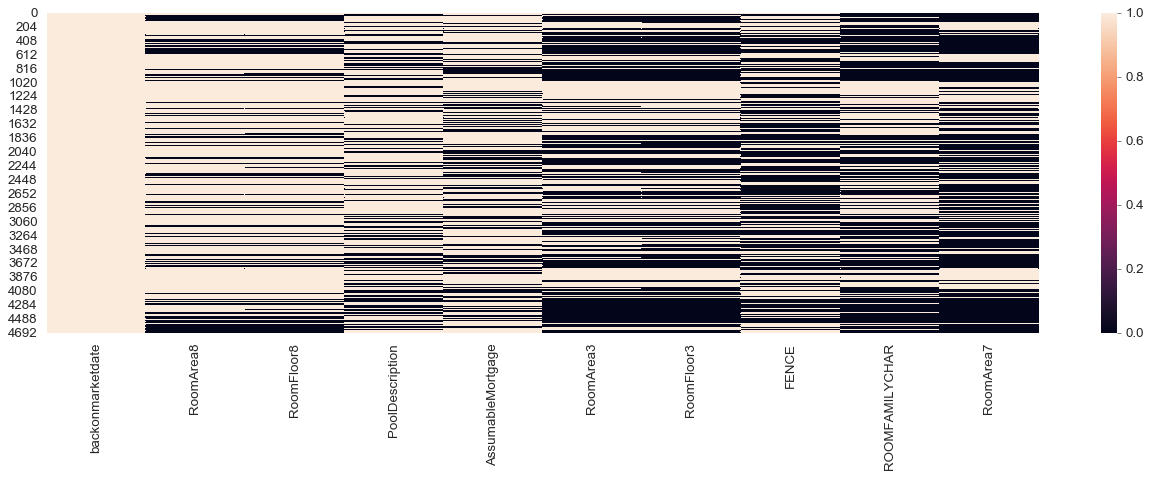

In [1855]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.heatmap(pd_22_null[topten_index], ax=ax)
plt.show()

Black = negative - 0 null values, light_color = postive - 1 null values.<br>
The more light the higher the number of null values.

Looking for null values in a column.<br> 
<b>where</b> creates a condition,<br> 
<b>F.col</b> selects a column,<br> 
<b>isNull</b> extracts the null values.

In [1856]:
estate4.where(F.col('PDOM').isNull()).select('PDOM').show()

+----+
|PDOM|
+----+
+----+



### Example: replacing null values with the most common value

In [1857]:
show_dtype(estate4, 'RoomArea8')

'data type of RoomArea8 is string'

In [1858]:
estate4.select('RoomArea8').distinct().show(5)

+---------+
|RoomArea8|
+---------+
|     null|
|    11x11|
|    13x12|
|     9x10|
|    15x13|
+---------+
only showing top 5 rows



In [1859]:
room8_sample = estate4.select('RoomArea8').sample(False, 0.6, 42)
room8_sample_pd = room8_sample.toPandas()

print(type(room8_sample_pd))
print(room8_sample_pd.head())


<class 'pandas.core.frame.DataFrame'>
  RoomArea8
0     11x11
1      None
2      None
3      None
4      None


In [1860]:
# Squeeze 1 dimensional axis objects into scalars.
# 1 dimensional axis objects: one column pandas data frame
# scalars: pd.Series
room8_vc = room8_sample_pd.T.squeeze().value_counts()
print(room8_vc.head(5))


11x10    48
12x11    42
11x11    41
13x11    29
12x12    27
Name: RoomArea8, dtype: int64


In [1861]:
# the frequency of the most common value 11x10 is 55
mode_room8_value = room8_vc[0].astype(int)
print(mode_room8_value)
print(type(mode_room8_value))

# mode: most common value
mode_room8 = room8_vc.index[0]
print(mode_room8)
print(type(mode_room8))

48
<class 'numpy.int32'>
11x10
<class 'str'>


In [1862]:
room8_pd_null = room8_sample_pd.isnull()
room8_pd_null_sum = room8_sample_pd.isnull().sum()

print(room8_pd_null.head())
print("")
print(room8_pd_null_sum)
print("")
print(room8_pd_null.T.squeeze().value_counts())
print("")


   RoomArea8
0      False
1       True
2       True
3       True
4       True

RoomArea8    2125
dtype: int64

True     2125
False     882
Name: RoomArea8, dtype: int64



In [1863]:
room_df_onylNull = room8_sample_pd[room8_pd_null]
print(room_df_onylNull.head())
print(room_df_onylNull.shape)
print(room_df_onylNull.sum())

  RoomArea8
0       NaN
1      None
2      None
3      None
4      None
(3007, 1)
RoomArea8    0.0
dtype: float64


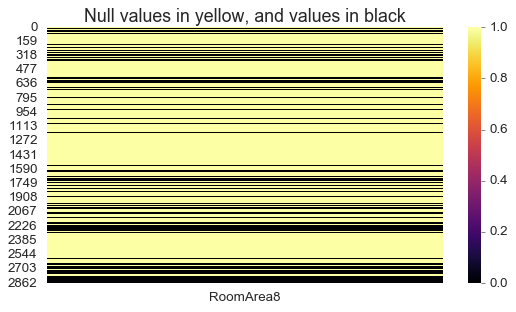

In [1864]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax = sns.heatmap(room8_pd_null, cmap="inferno")
ax.set_title("Null values in yellow, and values in black")
plt.show()

In [1865]:
estate4 = estate4.fillna(mode_room8, subset=['RoomArea8'])
estate4.select('RoomArea8').distinct().show(5)

+---------+
|RoomArea8|
+---------+
|    11x10|
|    11x11|
|    13x12|
|     9x10|
|    15x13|
+---------+
only showing top 5 rows



Handyspark offers some perks for visualizing and exploring direct on
spark data frames.

In [1866]:
estate4_hdf = estate4.toHandy()
estate4_hdf.cols['RoomArea8'].value_counts().sort_values(ascending=False)[:10]

RoomArea8
11x10    3529
12x11      60
12x10      60
11x11      55
12x12      48
10x10      46
13x11      45
13x12      36
11x9       29
11x13      28
Name: value_counts, dtype: int64

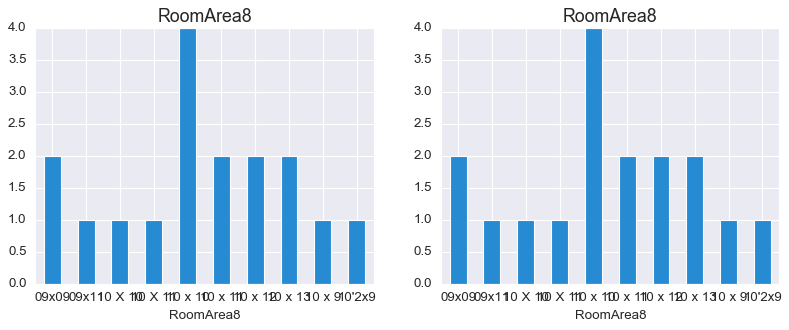

In [1867]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
estate4_hdf.cols['RoomArea8'].hist(ax=axs[0])
estate4_hdf.cols['RoomArea8'].hist(ax=axs[1])
plt.show()

### Example: replacing null values with the mean

In [1868]:
missing_variables_1 = missing_0['variable'].tolist()
print(len(missing_variables_1))
# getting names of missing variables
# 27 variables have missing values

26


In [1869]:
missing_variables_dataTypes_1 = \
show_dtypes_list(estateParq, missing_variables_1)

print(len(missing_variables_dataTypes_1))
print(len(missing_variables_1))

print(missing_variables_dataTypes_1)


26
26
{'backonmarketdate': 'string', 'RoomArea8': 'string', 'RoomFloor8': 'string', 'PoolDescription': 'string', 'AssumableMortgage': 'string', 'RoomArea3': 'string', 'RoomFloor3': 'string', 'FENCE': 'string', 'ROOMFAMILYCHAR': 'string', 'RoomArea7': 'string', 'RoomFloor7': 'string', 'RoomArea2': 'string', 'RoomFloor2': 'string', 'ROOF': 'string', 'DiningRoomDescription': 'string', 'RoomArea1': 'string', 'RoomArea6': 'string', 'BATHDESC': 'string', 'RoomFloor1': 'string', 'APPLIANCES': 'string', 'RoomArea4': 'string', 'RoomFloor6': 'string', 'RoomArea5': 'string', 'RoomFloor4': 'string', 'RoomFloor5': 'string', 'BATHSTHREEQUARTER': 'int'}


### Compare list of tuples with dict

In [1870]:
dtypes_2 = estateParq.select(missing_variables_1).dtypes
# print(dtypes_2 )

In [1871]:
sucessful_matches3, failed_matches3 = \
compare_dtypes(dtypes=dtypes_2, dtypesVerification=missing_variables_dataTypes_1)

The variable "backonmarketdate" is in the dict, data types match.
The variable "RoomArea8" is in the dict, data types match.
The variable "RoomFloor8" is in the dict, data types match.
The variable "PoolDescription" is in the dict, data types match.
The variable "AssumableMortgage" is in the dict, data types match.
The variable "RoomArea3" is in the dict, data types match.
The variable "RoomFloor3" is in the dict, data types match.
The variable "FENCE" is in the dict, data types match.
The variable "ROOMFAMILYCHAR" is in the dict, data types match.
The variable "RoomArea7" is in the dict, data types match.
The variable "RoomFloor7" is in the dict, data types match.
The variable "RoomArea2" is in the dict, data types match.
The variable "RoomFloor2" is in the dict, data types match.
The variable "ROOF" is in the dict, data types match.
The variable "DiningRoomDescription" is in the dict, data types match.
The variable "RoomArea1" is in the dict, data types match.
The variable "RoomArea6

In [1872]:
print(sucessful_matches3)
print(failed_matches3)

['backonmarketdate', 'RoomArea8', 'RoomFloor8', 'PoolDescription', 'AssumableMortgage', 'RoomArea3', 'RoomFloor3', 'FENCE', 'ROOMFAMILYCHAR', 'RoomArea7', 'RoomFloor7', 'RoomArea2', 'RoomFloor2', 'ROOF', 'DiningRoomDescription', 'RoomArea1', 'RoomArea6', 'BATHDESC', 'RoomFloor1', 'APPLIANCES', 'RoomArea4', 'RoomFloor6', 'RoomArea5', 'RoomFloor4', 'RoomFloor5', 'BATHSTHREEQUARTER']
[]


Checking if 'DAYSONMARKET' is in the dict?

In [1873]:
if 'DAYSONMARKET' in missing_variables_dataTypes_1:
    print("in dict")
else:
    print("not in dict")

# 'BATHSTHREEQUARTER': 'int'
estate4.where(F.col('BATHSTHREEQUARTER').isNull()).count()

not in dict


1

In [1874]:
bathsthree_mean = \
estate4.agg({'BATHSTHREEQUARTER': 'mean'}).collect()[0][0]

print(type(bathsthree_mean))
print(bathsthree_mean)

<class 'float'>
0.47475986102595547


In [1875]:
# substitute null value with the mean
estate4 = estate4.fillna(bathsthree_mean, subset=['BATHSTHREEQUARTER'])
print(estate4.where(F.col('BATHSTHREEQUARTER').isNull()).count())

0


#### Dropping columns
<p>
with proportion of missing values higher than a threshold.
</p> 

<p>
What do I need for this?
</p>


<ul>
  <li>data frame with columns</li>
  <li>threshold: proportion</li>
  <li>checking proportion for every column - for loop</li>
  <li>Number of observations - nRow</li>
  <li>Number of missing values - nMissing</li>
  <li>nMissing / nRow = proportion</li>
  <li>condition rule: if proportion greater threshold then dropp</li>
  <li>drop columns</li>
  <li>return new data frame without columns</li>
</ul> 


In [1876]:
def dropCols_missing(sparkDf, threshold):
    
    """takes a spark data frame and drops columns
    with a proportion of missing values greater than
    a threshold"""
    
    nRow = sparkDf.count()
    
    # for loop iterates over columns - axis 1- 
    # map function is used for iterating over rows - axis 0 
    for col in sparkDf:
        nMissing = sparkDf.where(col.isNull()).count()
        proportion = nMissing / nRow
        # apply an if-then-rule
        if proportion > threshold:
            sparkDf = sparkDf.drop(col)
        
    return sparkDf
        

In [1877]:
estate4_dropped = dropCols_missing(estate4, 0.55)
print(dfShape(estate4_dropped))
print(dfShape(estateParq))

shape: n_rows: 4894, n_cols: 65
shape: n_rows: 5000, n_cols: 74


In [1878]:
missing_55 = missing_0[missing_0.proportion > 0.55]
missing_55

variable  missing_values  proportion
8    backonmarketdate            4894      0.9788
23          RoomArea8            3451      0.6902
24         RoomFloor8            3407      0.6814
4     PoolDescription            3228      0.6456
25  AssumableMortgage            3045      0.6090

In [1879]:
'UNITNUMBER' in estate4_dropped.columns

False

In [1880]:
for n,i in enumerate(missing_55.variable):
    print(f"{n+1}. {i} is in data frame:{i in estate4_dropped.columns}")

1. backonmarketdate is in data frame:False
2. RoomArea8 is in data frame:True
3. RoomFloor8 is in data frame:False
4. PoolDescription is in data frame:False
5. AssumableMortgage is in data frame:False


RoomArea8 was substituted with most frequent values and is therefore
above the threshold.

In [1881]:
estate4 = estate4_dropped
estate4_log = estate4_dropped

# Data transformation

<p>
"In statistics, data transformation is the application of a deterministic mathematical function to each point in a data set—that is, each data point zi is replaced with the transformed value yi = f(zi), where f is a function. Transforms are usually applied so that the data appear to more closely meet the assumptions of a statistical inference procedure that is to be applied, or to improve the interpretability or appearance of graphs."
</p> 
<a href="https://en.wikipedia.org/wiki/Data_transformation_%28statistics%29" target="_blank">Wikipedia</a> 

<p>
The transformation to normality is a common use case for data transformation. Here are two methods or approaches for data transformation
presented: feature scaling and logarithmic transformation.
</p> 

## Feature scaling

<p>
is done by transforming the (only) the independent variables of the data.
The goal is to normalize the range of the data between 0 and 1. Without normalizing the data variables with greater ranges will develop unproportional high influence on the outcomes produced by machine learning algorithms.
For example, when using the Euclidian distance features with
greater ranges, will dominate the calculations. Inversly scaling
makes the influence of every predictor more proportionally. 
</p>
<p>    
Some numeric variables are nominal and identifiers like postal codes. If kept 
those should be encoded along with the text variables. Scaling this 
variables beforehand does not really matter as those are nominal, but can 
also be dropped from scaling. Also scaling the dependent variable is not necessary.
</p> 
<a href="https://en.wikipedia.org/wiki/Static_variable" target="_blank">Wikipedia</a> 

One example for rescaling is the min-max normalization:

<img src="minMax.png" alt="minMax" height="300" width="300"> 

#### "LISTPRICE"

In [1882]:
print("LISTPRICE" in estate4.columns)
print(estate4.select("LISTPRICE").show(3))

True
+---------+
|LISTPRICE|
+---------+
|   139900|
|   210000|
|   225000|
+---------+
only showing top 3 rows

None


In [1883]:
min_list = estate4.agg({"LISTPRICE": "min"}).collect()[0][0]
print(min_list)

max_list = estate4.agg({"LISTPRICE": "max"}).collect()[0][0]
print(max_list)

40000
718000


In [1884]:
listprice = estate4["LISTPRICE"]

estate41 = \
estate4.withColumn("listPriceScaled", 
                   round((listprice - min_list) / (max_list - min_list)*100))


In [1885]:
print(f'Is daysScaled in estate4? {"listPriceScaled" in estate41.columns}')

Is daysScaled in estate4? True


In [1886]:
estate41.select("listPriceScaled").orderBy("listPriceScaled", 
                                          ascending=False).show(5)

estate41.select("listPriceScaled").orderBy("listPriceScaled", 
                                          ascending=True).show(5)

+---------------+
|listPriceScaled|
+---------------+
|          100.0|
|           99.0|
|           97.0|
|           97.0|
|           97.0|
+---------------+
only showing top 5 rows

+---------------+
|listPriceScaled|
+---------------+
|            0.0|
|            1.0|
|            1.0|
|            1.0|
|            1.0|
+---------------+
only showing top 5 rows



In [1887]:
min_list_scaled = \
estate41.agg({"listPriceScaled": "min"}).collect()[0][0]
print(min_list_scaled)
print(f'Before scaling: {min_list}')

max_list_scaled = \
estate41.agg({"listPriceScaled": "max"}).collect()[0][0]
print(max_list_scaled)
print(f'Before scaling: {max_list}')

0.0
Before scaling: 40000
100.0
Before scaling: 718000


#### "DAYSONMARKET"

In [1888]:
"DAYSONMARKET" in estate4.columns

True

In [1889]:
min_days = estate41.agg({"DAYSONMARKET": "min"}).collect()[0][0]
print(f"Before scaling: {min_days}")

max_days = estate41.agg({"DAYSONMARKET": "max"}).collect()[0][0]
print(f"Before scaling: {max_days}")

Before scaling: 0
Before scaling: 225


In [1890]:
days = estate4["DAYSONMARKET"]

estate5 = \
estate41.withColumn("daysScaled", 
                   round((days - min_days) / (max_days - min_days))*100)

print(f'Is daysScaled in estate5? {"daysScaled" in estate5.columns}')

estate5.select("daysScaled").orderBy("daysScaled", ascending=False).\
show(5)

estate5.select("daysScaled").orderBy("daysScaled", ascending=True).\
show(5)

Is daysScaled in estate5? True
+----------+
|daysScaled|
+----------+
|     100.0|
|     100.0|
|     100.0|
|     100.0|
|     100.0|
+----------+
only showing top 5 rows

+----------+
|daysScaled|
+----------+
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
+----------+
only showing top 5 rows



In [1891]:
print(f'After scaling: {estate5.agg({"daysScaled": "min"}).collect()[0][0]}')
print(f'Before scaling min: 0')
print(f'After scaling: {estate5.agg({"daysScaled": "max"}).collect()[0][0]}')
print(f'Before scaling min: 225')

After scaling: 0.0
Before scaling min: 0
After scaling: 100.0
Before scaling min: 225


#### Defining a function for scaling features

<p>
In the version below the new scaled columns are attached to the data frames.
Alternatively another function substitutes the scaled columns by dropping 
the original variables.
</p> 

In [1892]:
def featureMinMaxscale(df, scalingVar):
    
    for i in scalingVar:
            
        iscaled = df[i]

        min_i = df.agg({i: "min"}).collect()[0][0]
        # print(f"Before min scaling: {min_i}")

        max_i = df.agg({i: "max"}).collect()[0][0]
        # print(f"Before max scaling: {max_i}")
        
        scaledVariableName = i + "_scaled"

        df = \
        df.withColumn(scaledVariableName, round((iscaled  - min_i) / (max_i - min_i))*100)

    return df
        

In [1893]:
def featureMinMaxscale_drop(df, scalingVar):
    df = featureMinMaxscale(df, scalingVar)
    df = df.drop(*scalingVar)
    return(df)
    

#### Getting numeric data types by Iterating over a list of tuples

In [1894]:
# print(estate4.dtypes)
# print(estate4.dtypes[0][0])
# print(estate4.dtypes[0][1])

dataTypeTuples = estate4.dtypes
scalingVariables_1 = []
for (a,b) in dataTypeTuples:
    if b == 'int':
        scalingVariables_1.append(a)

print(scalingVariables_1 )

['PostalCode', 'SalesClosePrice', 'LISTPRICE', 'OriginalListPrice', 'FOUNDATIONSIZE', 'DAYSONMARKET', 'Fireplaces', 'PDOM', 'SQFTABOVEGROUND', 'Taxes', 'TAXYEAR', 'LivingArea', 'YEARBUILT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'Bedrooms', 'SQFTBELOWGROUND', 'AssociationFee']


In [1895]:
def get_numVars(df, dataType_tupleList):
    scalingVar = []
    for (a,b) in dataType_tupleList:
        if b == 'int' or b == 'float' or b == 'long' or b == 'double':
            scalingVar.append(a)
            
    return(scalingVar)
    

Scaling the dependent variable is not necessary.
The function below excludes the dependent or target or predictor variable.

In [1896]:
def get_numVars_notDep(df, dataType_tupleList, dependentVar):
    scalingVar = []
    for (a,b) in dataType_tupleList:
        if a == dependentVar:
            continue
        if b == 'int' or b == 'float' or b == 'long' or b == 'double':
            scalingVar.append(a)
            
    return(scalingVar)
    

In [1897]:
scalingVariables_2 = get_numVars(estate4, dataTypeTuples)
print(scalingVariables_2)

['PostalCode', 'SalesClosePrice', 'LISTPRICE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'DAYSONMARKET', 'Fireplaces', 'PDOM', 'SQFTABOVEGROUND', 'Taxes', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'YEARBUILT', 'ACRES', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'Bedrooms', 'SQFTBELOWGROUND', 'AssociationFee', 'AssessedValuation']


In [1898]:
# without 'SalesClosePrice'
scalingVariables_3 = get_numVars_notDep(estate4, dataTypeTuples,'SalesClosePrice' )
print(scalingVariables_3)

['PostalCode', 'LISTPRICE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'DAYSONMARKET', 'Fireplaces', 'PDOM', 'SQFTABOVEGROUND', 'Taxes', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'YEARBUILT', 'ACRES', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'Bedrooms', 'SQFTBELOWGROUND', 'AssociationFee', 'AssessedValuation']


In [1899]:
# with attached scaled columns and scaled 'SalesClosePrice'
estate6 = featureMinMaxscale(estate4, scalingVariables_2)
print(estate6.columns)
print(len(estate6.columns))
print('SalesClosePrice' in estate6.columns)

['MLSID', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'Bedrooms', 'SQFTBELOWGROUND', 'AssociationFee', 'ASSESSMENTPENDING', 'AssessedValuation', 'PostalCode_scaled', 'SalesClosePrice_scale

How do the scaled distributions look like?

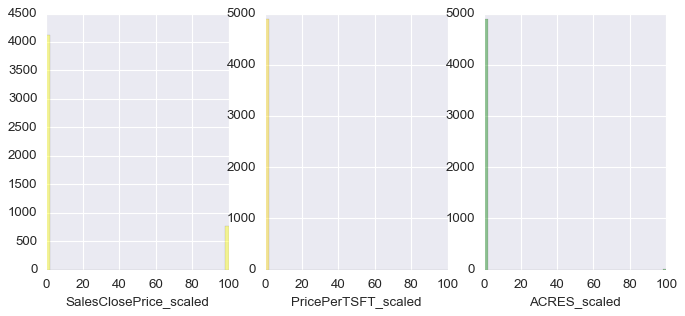

In [1900]:
estate6_pd = estate6.toPandas()

fig, ax = plt.subplots(1,3, figsize=(10, 4))
ax[0] = sns.distplot(estate6_pd['SalesClosePrice_scaled'],
                   color="red", 
                   hist_kws=dict(edgecolor="black", linewidth=0.2,
                   color=['yellow']),
                   kde=False,
                   norm_hist=False, ax=ax[0])
ax[1] = sns.distplot(estate6_pd['PricePerTSFT_scaled'],
                   color="red", 
                   hist_kws=dict(edgecolor="black", linewidth=0.2,
                   color=['gold']),
                   kde=False,
                   norm_hist=False, ax=ax[1])
ax[2] = sns.distplot(estate6_pd['ACRES_scaled'],
                   color="red", 
                   hist_kws=dict(edgecolor="black", linewidth=0.2,
                   color=['green']),
                   kde=False,
                   norm_hist=False, ax=ax[2])
plt.show()

In [1901]:
estate7_drop = featureMinMaxscale_drop(estate4, scalingVariables_3)
print(estate7_drop)


DataFrame[MLSID: string, streetaddress: string, STREETNAME: string, StateOrProvince: string, City: string, SalesClosePrice: int, LISTDATE: string, LISTTYPE: string, FENCE: string, MapLetter: string, SchoolDistrictNumber: string, offmarketdate: string, RoomArea4: string, roomtype: string, ROOF: string, RoomFloor4: string, PotentialShortSale: string, GarageDescription: string, RoomFloor1: string, RoomArea1: string, ZONING: string, STYLE: string, CoolingDescription: string, APPLIANCES: string, ROOMFAMILYCHAR: string, RoomArea3: string, EXTERIOR: string, RoomFloor3: string, RoomFloor2: string, RoomArea2: string, DiningRoomDescription: string, BASEMENT: string, BATHDESC: string, RoomArea5: string, RoomFloor5: string, RoomArea6: string, RoomFloor6: string, RoomArea7: string, RoomFloor7: string, RoomArea8: string, ASSESSMENTPENDING: string, PostalCode_scaled: double, LISTPRICE_scaled: double, OriginalListPrice_scaled: double, PricePerTSFT_scaled: double, FOUNDATIONSIZE_scaled: double, DAYSONM

In [1902]:
print('SalesClosePrice' in estate7_drop.columns)
# SalesClosePrice is not scaled
print('SalesClosePrice_scaled' in estate7_drop.columns)
print(len(estate7_drop.columns))
print(estate7_drop.select('SalesClosePrice').show(4))


True
False
65
+---------------+
|SalesClosePrice|
+---------------+
|         143000|
|         190000|
|         225000|
|         265000|
+---------------+
only showing top 4 rows

None


In [1903]:
print(f"df with attached scaled columns: {len(estate6.columns)}")
print(f"df with dropped original columns: {len(estate7_drop.columns)}")

df with attached scaled columns: 90
df with dropped original columns: 65


In [1904]:
# df after cleaning, outliers and scaling
estate8 = estate7_drop

## Logarithmic data transformation

In [1905]:
"_scaled" in estate4_log.columns 

False

In [1906]:
matchPattern_onList(estate4_log, "_scaled")
# estate4_log.columns 

'The expression does not match any list elements.'

### Log transformation of YEARBUILT and OriginalSalesClosePrice
<p>
The variable 'YEARBUILT' is not really appropriate for
log transformation given the it's discrete values,
but it can show the power of a log transformation.
</p>


#### YEARBUILT



In [1907]:
#select variable
yearbuiltScaled_distinct = estate6.select('YEARBUILT_scaled').distinct()
print(yearbuiltScaled_distinct.show())

+----------------+
|YEARBUILT_scaled|
+----------------+
|           100.0|
|             0.0|
+----------------+

None


The df estate4_log used below is the df after columns are dropped but before scaling.
Scaled columns are not in this data frame. This is so desired as
scaling (normalizing between 0 and 1) and log transformation (taking the log of every element in the sequence or series) are alternative data transformations.

In [1908]:
yearbuilt_distinct =  estate4_log.select('YEARBUILT').distinct()
print(yearbuilt_distinct.show(5))

+---------+
|YEARBUILT|
+---------+
|     1950|
|     1971|
|     1949|
|     1960|
|     1978|
+---------+
only showing top 5 rows

None


In [1909]:
print(estate4_log.agg({'YEARBUILT': 'skewness'}).collect())

[Row(skewness(YEARBUILT)=-0.2528642002049851)]


In [1910]:
median_yearbuilt = \
estate4_log.approxQuantile('YEARBUILT', [0.5], 0.25)[0]
print(type(median_yearbuilt))
print(median_yearbuilt)

<class 'float'>
1923.0


In [1911]:
mean_yearbuilt = \
estate4_log.agg({'YEARBUILT':'mean'}).collect()[0][0]

print(mean_yearbuilt)
print(type(mean_yearbuilt))

mean_yearbuilt > median_yearbuilt

1958.9869227625663
<class 'float'>


True

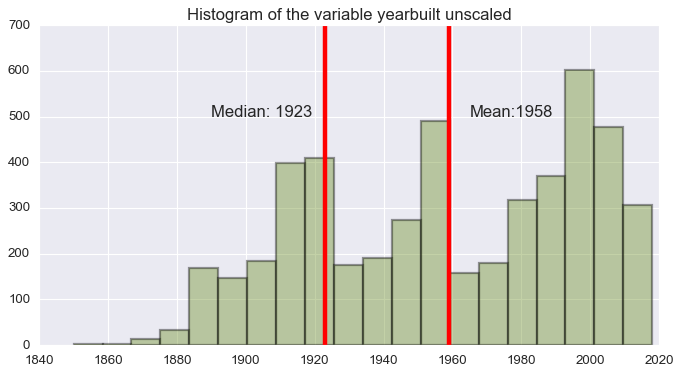

In [1912]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
yearbuilt = estate4_log.select('YEARBUILT').collect()
sns.distplot(yearbuilt, 
             hist_kws=dict(edgecolor='black', color='olivedrab', linewidth=2),
             ax=ax,
             kde=False,
             norm_hist=False)
ax.set_title('Histogram of the variable yearbuilt unscaled', fontsize=15)
ax.axvline(x=median_yearbuilt, ymin=0, ymax=1, color="r", linewidth=4)
ax.annotate("Median: 1923", xy=(1890, 500), fontsize=15)
ax.axvline(x=mean_yearbuilt, ymin=0, ymax=1, color="r", linewidth=4)
ax.annotate(f"Mean:1958", xy=(1965, 500), fontsize=15)
plt.show()


The distribution is skewed to the left, the bulk of the data is to the right, and has more than one maxima.

How does the distribution of a sample look like? Pretty similar.

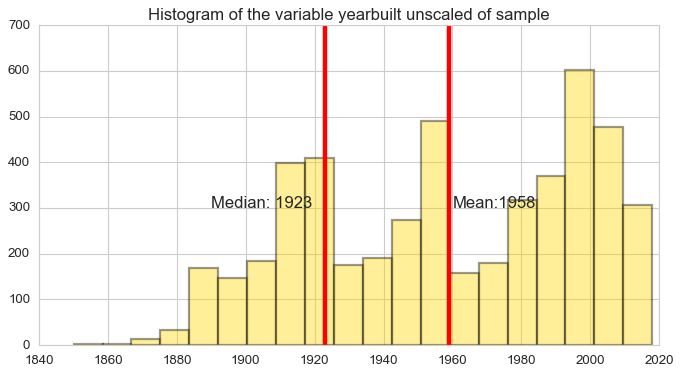

In [1913]:
sample6 = estate4_log.sample(False, 0.5, 42)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize=(10,5))
yearbuilt = estate4_log.select('YEARBUILT').collect()
sns.distplot(yearbuilt, 
             hist_kws=dict(edgecolor='black', color='gold', linewidth=2),
             ax=ax,
             kde=False,
             norm_hist=False)
ax.set_title('Histogram of the variable yearbuilt unscaled of sample', fontsize=15)
ax.axvline(x=median_yearbuilt, ymin=0, ymax=1, color="r", linewidth=4)
ax.annotate("Median: 1923", xy=(1890, 300), fontsize=15)
ax.axvline(x=mean_yearbuilt, ymin=0, ymax=1, color="r", linewidth=4)
ax.annotate(f"Mean:1958", xy=(1960, 300), fontsize=15)
plt.show()


<p>
The skweness metric is negative, when skewed to the left,
positive, when skewed to the right, and 0 when symmetric.
In case of 0 a normal distribution is given.
</p> 

<p>
The yearbuilt variable is skewed to the left. The mean is greater 
than the median.
</p> 

<p>
<b>Can the logarithmic data transformation make the distribution more normal?</b>
</p>  



In [1914]:
# Recalculate log of SALESCLOSEPRICE
# df = df.withColumn('YEARBUILT', log(df['SALESCLOSEPRICE'])) 
estateLog_2 = \
estate4_log.withColumn('yearbuiltLog', round(F.log(F.col('YEARBUILT')),2))

In [1915]:
print(dfShape(estate4_log))
print(dfShape(estateLog_2))

shape: n_rows: 4894, n_cols: 65
shape: n_rows: 4894, n_cols: 66


In [1916]:
estateLog_2.select(['YEARBUILT', 'yearbuiltLog']).show(5)

+---------+------------+
|YEARBUILT|yearbuiltLog|
+---------+------------+
|     1950|        7.58|
|     1971|        7.59|
|     1949|        7.58|
|     1960|        7.58|
|     1978|        7.59|
+---------+------------+
only showing top 5 rows



In [1917]:
median_year_log2 = \
estateLog_2.approxQuantile('yearbuiltLog', [0.5], 0.25)[0]
print(type(median_year_log2 ))
print(median_year_log2 )

mean_yearbuilt_log2 = \
estateLog_2.agg({'yearbuiltLog':'mean'}).collect()[0][0]

print(mean_yearbuilt_log2)
print(type(mean_yearbuilt))

mean_yearbuilt_log2> median_year_log2 

<class 'float'>
7.56
7.579758888434773
<class 'float'>


True

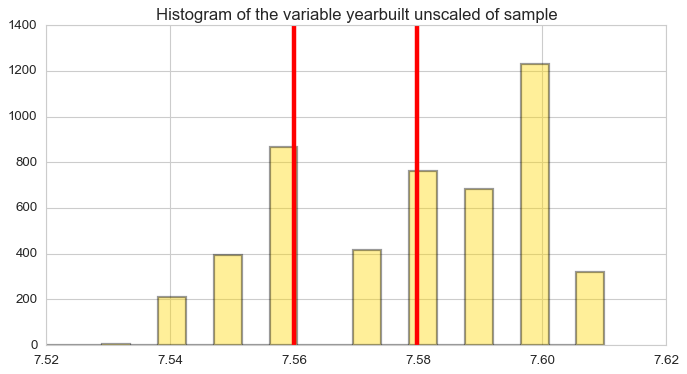

In [1918]:

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize=(10,5))
yearbuiltLog = estateLog_2.select('yearbuiltLog').collect()
sns.distplot(yearbuiltLog, 
             hist_kws=dict(edgecolor='black', color='gold', linewidth=2),
             ax=ax,
             kde=False,
             norm_hist=False)
ax.set_title('Histogram of the variable yearbuilt unscaled of sample', fontsize=15)
ax.axvline(x=median_year_log2, ymin=0, ymax=1, color="r", linewidth=4)
# ax.annotate("Median", xy=(1890, 300), fontsize=15)
ax.axvline(x=mean_yearbuilt_log2, ymin=0, ymax=1, color="r", linewidth=4)
# ax.annotate(f"Mean", xy=(1960, 300), fontsize=15)
plt.show()


No, the data transformation is not getting more normal due to the discrete
nature of the variable.

#### OriginalListPrice

In [1919]:
#select variable
orglpScaled_distinct = estate6.select('OriginalListPrice_scaled').distinct()
print(orglpScaled_distinct.show())

+------------------------+
|OriginalListPrice_scaled|
+------------------------+
|                     0.0|
|                   100.0|
+------------------------+

None


In [1920]:
orlp_distinct =  estate4_log.select('OriginalListPrice').distinct()
print(orlp_distinct.show(5))

+-----------------+
|OriginalListPrice|
+-----------------+
|           139900|
|           210000|
|           225000|
|           230000|
|           239900|
+-----------------+
only showing top 5 rows

None


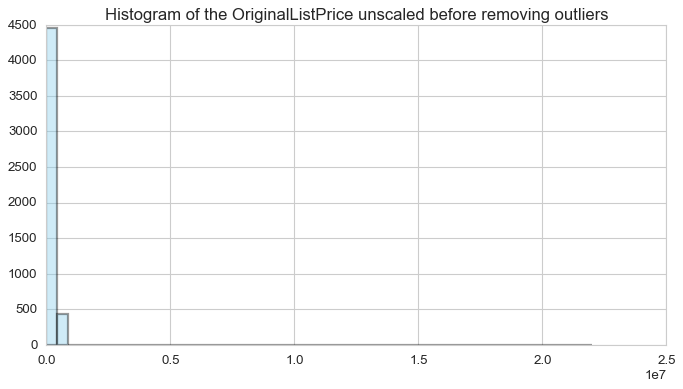

In [1921]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
# There is a variable OriginalListPrice, which interferes.
# Changing to OriginalListPrice_444 resolves the issue
OriginalListPrice_444 = estate4_log.select('OriginalListPrice').collect()

sns.distplot(OriginalListPrice_444, 
             hist_kws=dict(edgecolor='black', color='skyblue', 
             linewidth=2),
             ax=ax,
             kde=False,
             norm_hist=False)
ax.set_title('Histogram of the OriginalListPrice unscaled before removing outliers', fontsize=15)
plt.show()


Removing outliers with the helper function created above.

In [1922]:
estate4_log = removeOutliers(estate4_log, 'OriginalListPrice')

In [1923]:
print(estate4_log.agg({'OriginalListPrice': 'skewness'}).collect())

[Row(skewness(OriginalListPrice)=1.1969002062702432)]


In [1924]:
median_orglp = \
estate4_log.approxQuantile('OriginalListPrice', [0.5], 0.25)[0]
print(type(median_orglp))
print(median_orglp)

<class 'float'>
174900.0


In [1925]:
mean_orglp = \
estate4_log.agg({'OriginalListPrice':'mean'}).collect()[0][0]

print(mean_orglp)
print(type(mean_orglp))

mean_orglp  > mean_orglp

256332.86789366053
<class 'float'>


False

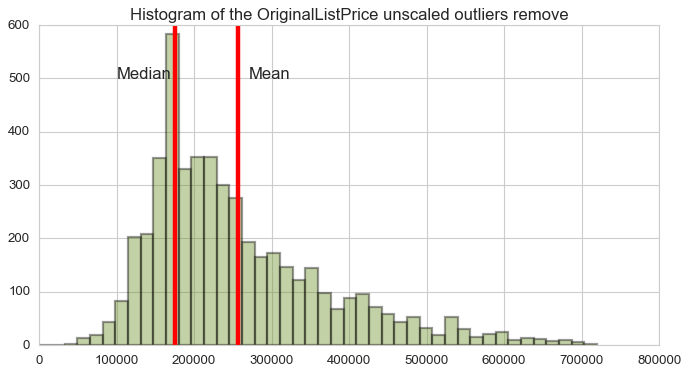

In [1926]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
OriginalListPrice_2 = estate4_log.select('OriginalListPrice').collect()
sns.distplot(OriginalListPrice_2, 
             hist_kws=dict(edgecolor='black', 
             color='olivedrab', 
             linewidth=2),
             ax=ax,
             kde=False,
             norm_hist=False)
ax.set_title('Histogram of the OriginalListPrice unscaled outliers remove',
             fontsize=15)
ax.axvline(x=median_orglp, ymin=0, ymax=1, color="r", linewidth=4)
ax.annotate("Median", xy=(100000, 500), fontsize=15)
ax.axvline(x=mean_orglp, ymin=0, ymax=1, color="r", linewidth=4)
ax.annotate(f"Mean", xy=(270000, 500), fontsize=15)
plt.show()


<p>
The distribution is skewed to the right, the bulk of the data is to the right.
</p> 
<p>
The skweness metric is negative, when skewed to the left,
positive, when skewed to the right, and 0 when symmetric.
In case of 0 a normal distribution is given.
</p> 
<p>
The yearbuilt variable is skewed to the right. The median is greater 
than the mean.
</p> 


How does the distribution of a sample look like? Pretty similar.

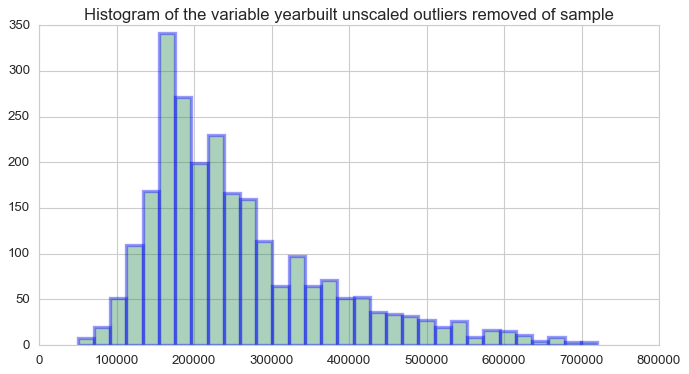

In [1927]:
sample6 = estate4_log.sample(False, 0.5, 42)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize=(10,5))
yearbuilt = sample6.select('OriginalListPrice').collect()
sns.distplot(yearbuilt, 
             hist_kws=dict(edgecolor='blue', color='seagreen', linewidth=3),
             ax=ax,
             kde=False,
             norm_hist=False)
ax.set_title('Histogram of the variable yearbuilt unscaled outliers removed of sample', 
             fontsize=15)
# ax.axvline(x=median_orglp, ymin=0, ymax=1, color="r", linewidth=4)
# ax.annotate("Median: 1923", xy=(1890, 300), fontsize=15)
# ax.axvline(x=mean_orglp, ymin=0, ymax=1, color="r", linewidth=4)
# ax.annotate(f"Mean:1958", xy=(1960, 300), fontsize=15)
plt.show()



<b>Can the logarithmic data transformation make the distribution more normal?</b>
</p>  



In [1928]:
# Recalculate log of 'OriginalListPrice'
estateLog_2 = \
estateLog_2.withColumn('orglpLog', round(F.log(F.col('OriginalListPrice')),2))

In [1929]:
print(dfShape(estate4_log))
print(dfShape(estateLog_2))

shape: n_rows: 4890, n_cols: 65
shape: n_rows: 4894, n_cols: 67


In [1930]:
estateLog_2.select(['OriginalListPrice', 'orglpLog']).show(5)

+-----------------+--------+
|OriginalListPrice|orglpLog|
+-----------------+--------+
|           139900|   11.85|
|           210000|   12.25|
|           225000|   12.32|
|           230000|   12.35|
|           239900|   12.39|
+-----------------+--------+
only showing top 5 rows



In [1931]:
max_estateLog_2 = estateLog_2.agg({'orglpLog':'max'}).collect()[0][0]
print(max_estateLog_2)

min_estateLog_2 = estateLog_2.agg({'orglpLog':'min'}).collect()[0][0]
print(min_estateLog_2)

16.91
1.61


In [1932]:
median_orglpLog2 = \
estateLog_2.approxQuantile('orglpLog', [0.5], 0.25)[0]
print(type(median_orglpLog2 ))
print(median_orglpLog2 )

mean_orglpLog2 = \
estateLog_2.agg({'orglpLog':'mean'}).collect()[0][0]

print(mean_orglpLog2)
print(type(mean_orglpLog2))

mean_yearbuilt_log2> median_year_log2 

<class 'float'>
12.07
12.361499795668092
<class 'float'>


True

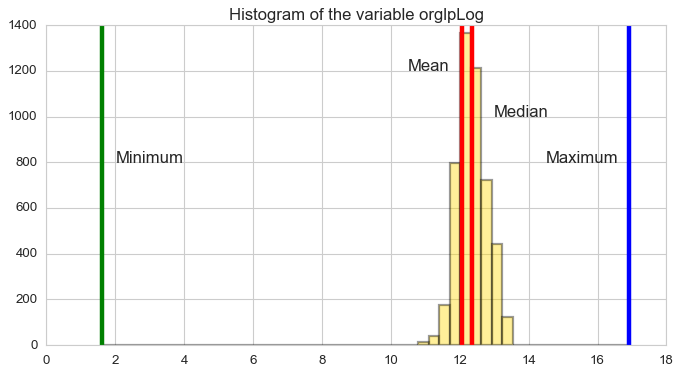

In [1933]:

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize=(10,5))
orglpLog = estateLog_2.select('orglpLog').collect()
sns.distplot(orglpLog , 
             hist_kws=dict(edgecolor='black', color='gold', linewidth=2),
             ax=ax,
             kde=False,
             norm_hist=False)
ax.set_title('Histogram of the variable orglpLog', fontsize=15)
ax.axvline(x=median_orglpLog2, ymin=0, ymax=1, color="r", linewidth=4)
ax.annotate("Median", xy=(13, 1000), fontsize=15)

ax.axvline(x=mean_orglpLog2, ymin=0, ymax=1, color="r", linewidth=4)
ax.annotate(f"Mean", xy=(10.5, 1200), fontsize=15)

ax.axvline(x=max_estateLog_2, ymin=0, ymax=1, color="b", linewidth=4)
ax.annotate(f"Maximum", xy=(14.5, 800), fontsize=15)

ax.axvline(x=min_estateLog_2, ymin=0, ymax=1, color="g", linewidth=4)
ax.annotate(f"Minimum", xy=(2, 800), fontsize=15)

plt.show()


The log transformation concentrated most values into a bulk, but created
also an extreme minimum and maximum. This makes the standard deviation greater.

### Which data transformation is better?
<p>
At the first look the log transformation seems to represent
the data better than the scaled data, which creates data bulks, 
while here are only two variables transformed and not all attributes.
</p> 
<p>
In general a practial point of view this question should by feeding in
the scaled and log transform data independently into the model 
and evaluate the prediction outcomes. Different algorithm 
might work better on particular transformed data. This of course
increases the work load for the data scientist.
</p> 


# Feature engineering
<p>
or feature generation is according to <a href="https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/" target="_blank">machinelearningmastery</a>:
</p>
<p>
"the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data".    
</p> 

<p>
According to <a href="https://en.wikipedia.org/wiki/Feature_engineering" target="_blank">Wikipedia</a> the feature engineering process is:
</p> 
<ul>
  <li>Brainstorming or testing features;</li>
  <li>Deciding what features to create;</li>
  <li>Creating features;</li>
  <li>Brainstorming or testing features;</li>
  <li>Deciding what features to create;</li>
  <li>Creating features;</li>
  <li>Checking how the features work with your model;</li>
  <li>Improving your features if needed;</li>
  <li>Go back to brainstorming/creating more features until the work is  
      done.</li>
</ul> 

<p>
Considering the point "Checking how the features work with your model" 
the effect of the feature to the dependent variable is often 
evaluated in isolation in a univariate manner. Meaning practically
for example with regard to correlation only one correlation add a time between feature and response variable is calculated to check how the 
feature is working with the model.
</p> 

In [1934]:
estate5 = estate4
print(estate4.columns)

['MLSID', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'Bedrooms', 'SQFTBELOWGROUND', 'AssociationFee', 'ASSESSMENTPENDING', 'AssessedValuation']


In [1935]:
estate5.createOrReplaceTempView('estate5_table')
spark_session.catalog.listTables()

[Table(name='estate5', database='default', description=None, tableType='MANAGED', isTemporary=False),
 Table(name='estate5_table', database='default', description=None, tableType='MANAGED', isTemporary=False),
 Table(name='estate6_table', database='default', description=None, tableType='MANAGED', isTemporary=False),
 Table(name='estate5_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='estate6_windows', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='estate_sql', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='geo_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='scores_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [1936]:
acres_sqfeet = 43560.04
"ACRES" in estate4.columns

True

In [1937]:
estate5 = \
estate5.withColumn('estate_area', F.col('Acres')*acres_sqfeet)

In [1938]:
estate5 = \
estate5.withColumn('frontYard', F.col('estate_area')- 
                   F.col('FOUNDATIONSIZE'))

In [1939]:
print('SalesClosePrice' in estate5.columns)
corr_area = estate5.select(['SalesClosePrice', 'estate_area'])
corrArea = corr_area.corr('SalesClosePrice', 'estate_area')
print(corrArea )

True
0.21493692730125943


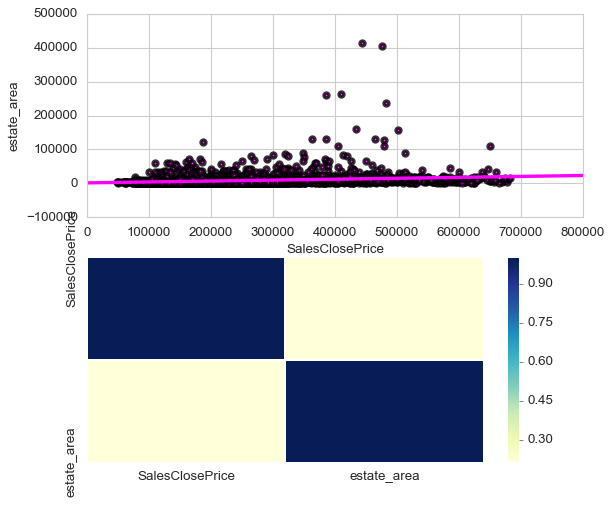

In [1940]:
corr_area_pd = corr_area.toPandas()
corr_area_pd_matrix = corr_area_pd.corr()

fig, ax = plt.subplots(2,1,figsize=(8,7))
sns.regplot(x='SalesClosePrice', y='estate_area', data=corr_area_pd,
            scatter_kws = dict(edgecolor='black', linewidth=3),
            ax=ax[0], color='magenta')
sns.heatmap(corr_area_pd_matrix, cmap="YlGnBu", linewidths=1)
plt.show()

In [1941]:
corr_yard = estate5.select(['SalesClosePrice', 'frontYard'])
corrYard = corr_yard.corr('SalesClosePrice', 'frontYard')
print(corrYard)

0.20332652446587438


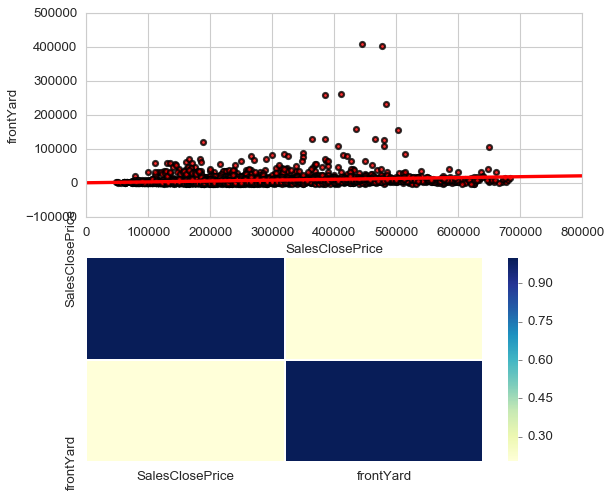

In [1942]:
corr_yard_pd = corr_yard.toPandas()
corr_yard_pd_matrix = corr_yard_pd.corr()

fig, ax = plt.subplots(2,1,figsize=(8,7))
sns.regplot(x='SalesClosePrice', y='frontYard', data=corr_yard_pd,
            scatter_kws = dict(edgecolor='black', linewidth=2),
            ax=ax[0], color='red')
sns.heatmap(corr_yard_pd_matrix, cmap="YlGnBu", linewidths=1)
plt.show()

#### Creating ratios

In [1943]:
print("AssessedValuation" in estate5.columns)
print('LISTPRICE' in estate5.columns)
# AssessedValuation to LISTPRICE
estate5 = estate5.withColumn("valList", F.round(F.col("AssessedValuation")/
                             F.col('LISTPRICE'),5))


valList_distinct = \
estate5.select("valList").distinct()
valList_distinct.show(5, truncate = False)

ratioVars_1 = \
estate5.select(["valList", "AssessedValuation", 'LISTPRICE'])

ratioVars_1.printSchema()

ratioVars_1.show(3)

True
True
+-------+
|valList|
+-------+
|0.0    |
|1.0E-5 |
|0.00658|
|0.00121|
|6.3E-4 |
+-------+
only showing top 5 rows

root
 |-- valList: double (nullable = true)
 |-- AssessedValuation: double (nullable = true)
 |-- LISTPRICE: integer (nullable = true)

+-------+-----------------+---------+
|valList|AssessedValuation|LISTPRICE|
+-------+-----------------+---------+
|    0.0|              0.0|   139900|
|    0.0|              0.0|   210000|
|    0.0|              0.0|   225000|
+-------+-----------------+---------+
only showing top 3 rows



In [1944]:
estate5.where(estate5["valList"].isNull()).count()
# Why are there zero null values?

0

#### How to update an sql table registered in the sql catalog?

<p>
Unless the the sql table "estate5_table" registered above is not updated
the new variable "valList" will not be included in the table and
will throw an error, when queried with regard to this newly created feature.
</p> 

<p>
However Spark methods allow to update the table.
The modified data frame estate 5 is appended with the write.mode
method and then saved with save table into the sql-catalog.
It is necessary to create a new table.
</p> 


<a href="https://stackoverflow.com/questions/53212396/pyspark-saveastable-how-to-insert-new-data-to-existing-table" target="_blank">
Stack - Pyspark - saveAsTable - How to Insert new data to existing table?</a> 


In [1945]:
# df_new_data.write.mode("append").saveAsTable("people1")
estate5.write.mode('append').saveAsTable("estate6_table")

tableView_1 = spark.sql("SELECT valList  FROM estate6_table")
tableView_1.show(4)
# Where is the rounding gone?

tableView_2 = spark.sql("SELECT DISTINCT(valList)  \
                         FROM estate6_table LIMIT 5")
tableView_2.show(truncate=False)

+-------+
|valList|
+-------+
|    0.0|
|    0.0|
|    0.0|
|    0.0|
+-------+
only showing top 4 rows

+-------+
|valList|
+-------+
|7.5E-4 |
|0.00195|
|0.00457|
|0.00227|
|0.00438|
+-------+



In [1946]:
# correlation is here always to the target variable
valListCorr = estate5.corr('SalesClosePrice', 'valList')
print(valListCorr)

-0.13749037271924194


In [1947]:
sample_valList = \
estate5.sample(withReplacement=False, fraction=0.6, seed=56)

valList_pd = sample_valList.toPandas()
print(valList_pd['valList'].isnull().sum())
# print(valList_pd.info())

valCorr_pd = valList_pd[['SalesClosePrice', 'valList']].corr()
print(valCorr_pd)

0
                 SalesClosePrice   valList
SalesClosePrice         1.000000 -0.135785
valList                -0.135785  1.000000


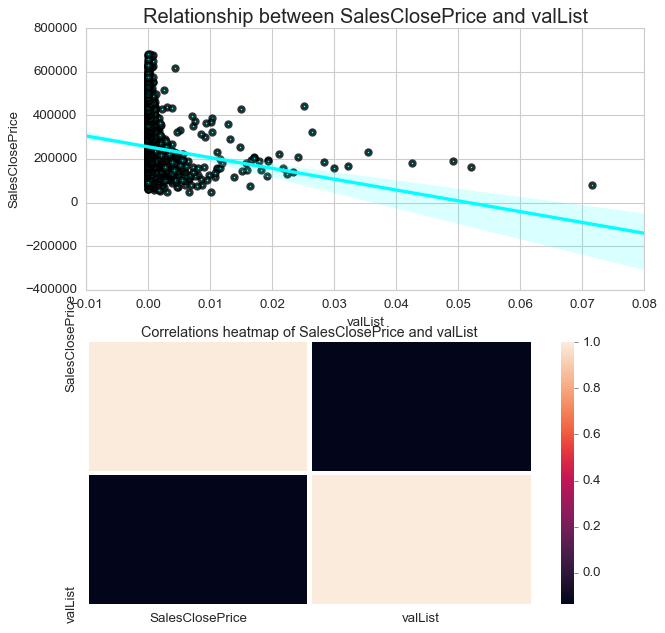

In [1948]:
fig, ax = plt.subplots(2,1, figsize=(9,9))
sns.regplot(x='valList', y='SalesClosePrice', 
            data=valList_pd, ax=ax[0],
            color='cyan',
            scatter_kws=dict(edgecolor='black', linewidth=3))
ax[0].set_title("Relationship between SalesClosePrice and valList", 
                fontsize=18)
sns.heatmap(valCorr_pd, linewidth=3, ax=ax[1])
ax[1].set_title("Correlations heatmap of SalesClosePrice and valList",
                fontsize=13)
plt.show()


There is slight negative correlation between 
the new variable "AssessedValuation to LISTPRICE". 
In this case a look at the regression plot helps.
The mass of the data is between 0 and 0.02. 
The newly created variable makes not a good predictor or feature.

Chaining multiple variables into one feature.

In [1949]:
# matchPattern_onList(df=estate5, expression='SQFTBELOWGROUND')
# help(inCols)
print(inCols('SQFTBELOWGROUND', estate5))
print(inCols('SQFTABOVEGROUND', estate5))

True - the variable SQFTBELOWGROUND is in the columns.
True - the variable SQFTABOVEGROUND is in the columns.


Calculating the total sum of sqft of the real estate.

In [1950]:
estate5 = estate5.withColumn("sqftSum", \
                             F.col('SQFTBELOWGROUND') + \
                             F.col('SQFTABOVEGROUND'))

estate5.select("sqftSum").show(3)

+-------+
|sqftSum|
+-------+
|    980|
|   2228|
|   1102|
+-------+
only showing top 3 rows



In [1951]:
estate5.select("sqftSum").describe().show()

+-------+------------------+
|summary|           sqftSum|
+-------+------------------+
|  count|              4894|
|   mean|1803.4013077237435|
| stddev| 759.2743523712215|
|    min|                 1|
|    max|              5840|
+-------+------------------+



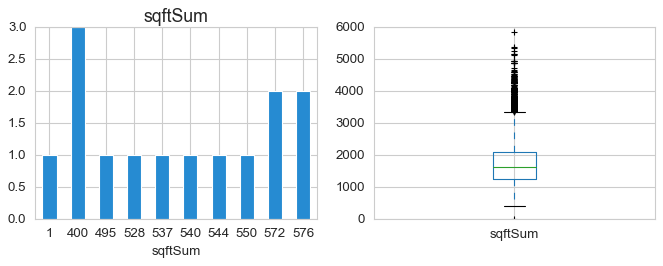

In [1952]:
hdf_sqft = estate5.toHandy()
fig, ax = plt.subplots(1,2, figsize=(10,3))
hdf_sqft.cols["sqftSum"].hist(ax=ax[0])
hdf_sqft.cols["sqftSum"].boxplot(ax=ax[1])
plt.show()

Is "sqftSum" a good feature with a high correlation?

In [1953]:
estate5.corr('SalesClosePrice', "sqftSum")

0.797545420309753

The correlation between 'SalesClosePrice' and "sqftSum" is high.
Let's explore this further.

In [1954]:
sqftSum_sample = estate5.sample(withReplacement=False, fraction=0.421, seed=145)
sqftSum_pd = sqftSum_sample.toPandas()
sqftSum_corr = sqftSum_pd.loc[:, ['SalesClosePrice', "sqftSum"]].corr()
print(sqftSum_corr)

                 SalesClosePrice  sqftSum
SalesClosePrice          1.00000  0.79962
sqftSum                  0.79962  1.00000


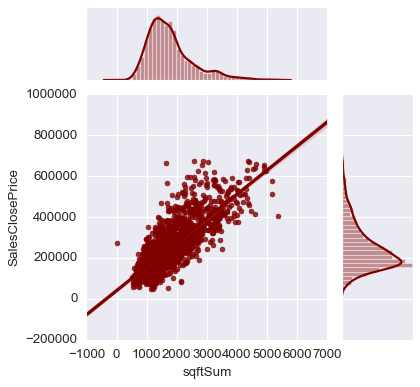

In [1955]:
sns.set_style('darkgrid')
sns.jointplot(x="sqftSum", y='SalesClosePrice',
              data=sqftSum_pd, 
              kind='reg',  color="maroon", height=5, ratio=3)
plt.show()

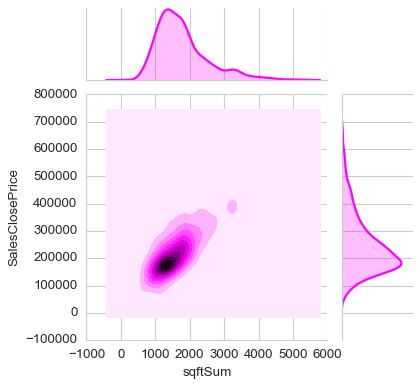

In [1956]:
sns.set_style('whitegrid')
sns.jointplot(x="sqftSum", y='SalesClosePrice',
              data=sqftSum_pd, 
              kind='kde',  color="magenta", height=5, ratio=3)
plt.show()

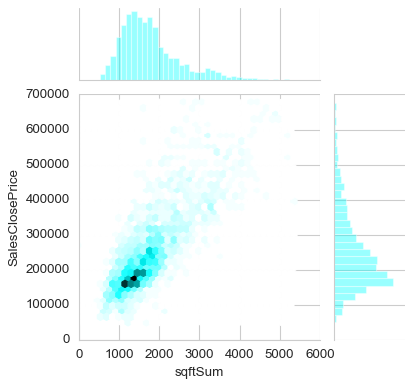

In [1957]:
sns.jointplot(x="sqftSum", y='SalesClosePrice',
              data=sqftSum_pd, 
              kind='hex',  color="cyan", height=5, ratio=3)
plt.show()

There is a clear correlation. This makes "sqftSum" a good feature.
This makes sense. It is aligned with the expectation that 
more square feet creates a higher price. 

<b>Calculating the number of bath per square feet.</b> The calculated
variable "sqftSum" is now additionally enhanced with more 
calculations.

In [1958]:
print(inCols('BATHSTOTAL', estate5))
print(estate5.select('BATHSTOTAL').describe().show())


True - the variable BATHSTOTAL is in the columns.
+-------+------------------+
|summary|        BATHSTOTAL|
+-------+------------------+
|  count|              4894|
|   mean|2.1675521046178994|
| stddev|0.9156771249863352|
|    min|                 1|
|    max|                 7|
+-------+------------------+

None


+-------+-------------------+
|summary|       Bath_perSQFT|
+-------+-------------------+
|  count|               4894|
|   mean| 1.4385513207027987|
| stddev| 14.280975137586049|
|    min|0.39123630672926446|
|    max|             1000.0|
+-------+-------------------+



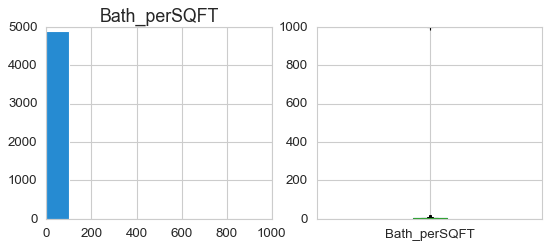

In [1959]:
estate5 = \
estate5.withColumn("Bath_perSQFT", 
                   F.col('BATHSTOTAL') / (F.col('sqftSum') / 1000))

estate5.select("Bath_perSQFT").describe().show()

hdf_bathSQFT = estate5.toHandy()
fig,ax = plt.subplots(1,2, figsize=(8,3))
hdf_bathSQFT.cols["Bath_perSQFT"].hist(ax=ax[0])
hdf_bathSQFT.cols["Bath_perSQFT"].boxplot(ax=ax[1])
plt.show()

There is an outlier. 

In [1960]:
estate5 = removeOutliers(estate5, "Bath_perSQFT")
print(dfShape(estate5))

shape: n_rows: 4893, n_cols: 70


+-------+-------------------+
|summary|       Bath_perSQFT|
+-------+-------------------+
|  count|               4893|
|   mean| 1.2344717276761692|
| stddev| 0.3444017752405107|
|    min|0.39123630672926446|
|    max|  4.282655246252676|
+-------+-------------------+



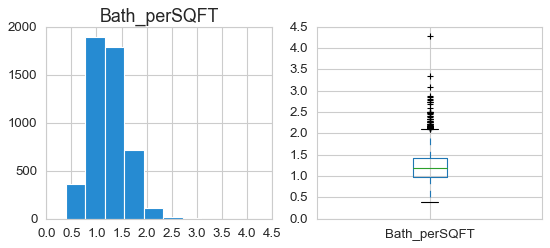

In [1961]:
estate5.select("Bath_perSQFT").describe().show()

hdf_bathSQFT = estate5.toHandy()
fig,ax = plt.subplots(1,2, figsize=(8,3))
hdf_bathSQFT.cols["Bath_perSQFT"].hist(ax=ax[0])
hdf_bathSQFT.cols["Bath_perSQFT"].boxplot(ax=ax[1])
plt.show()

The outlier is removed.<br>
<b>Is "Bath_perSQFT" a good feature?</b>

In [1962]:
estate5_sample_67 = \
estate5.sample(withReplacement=False, fraction=0.49, seed=67)

estate67_pd = estate5_sample_67.toPandas()

In [1963]:
estate67_corr = estate67_pd[['SalesClosePrice', "Bath_perSQFT"]].corr()
print(estate67_corr)

                 SalesClosePrice  Bath_perSQFT
SalesClosePrice         1.000000     -0.118528
Bath_perSQFT           -0.118528      1.000000


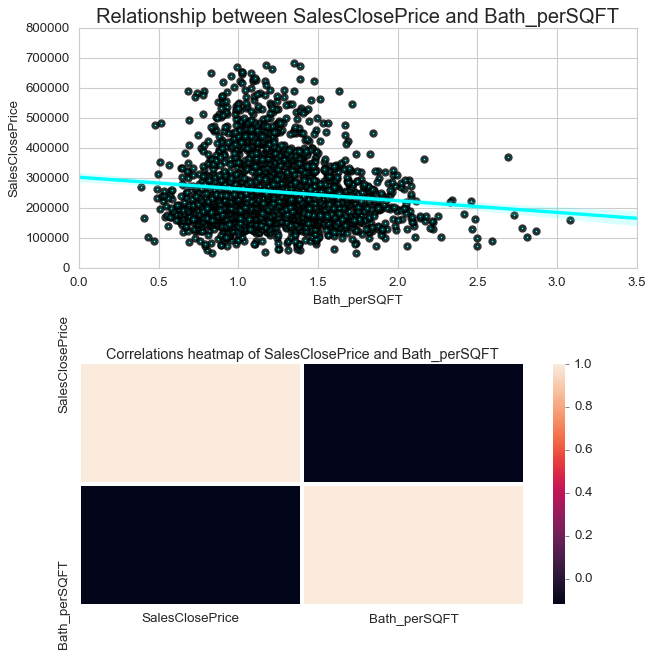

In [1964]:
fig, ax = plt.subplots(2,1, figsize=(9,9))
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=None, hspace=0.4)
sns.regplot(x="Bath_perSQFT", y='SalesClosePrice', 
            data=estate67_pd, ax=ax[0],
            color='cyan',
            scatter_kws=dict(edgecolor='black', linewidth=3))
ax[0].set_title("Relationship between SalesClosePrice and Bath_perSQFT", 
                fontsize=18)
sns.heatmap(estate67_corr, linewidth=3, ax=ax[1])
ax[1].set_title("Correlations heatmap of SalesClosePrice and Bath_perSQFT",
                fontsize=13)
plt.show()

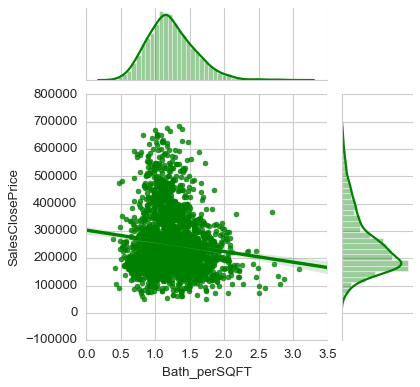

In [1965]:
sns.jointplot(x="Bath_perSQFT", y='SalesClosePrice',
              data=estate67_pd, 
              kind='reg',  color="g", height=5, ratio=3)
plt.show()

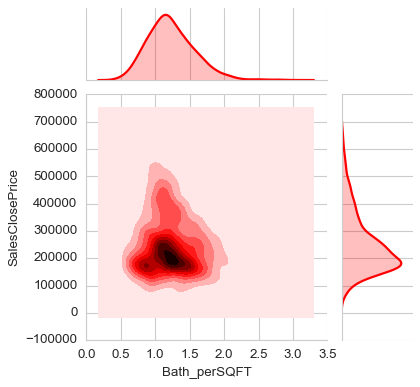

In [1966]:
sns.set_style('whitegrid')
sns.jointplot(x="Bath_perSQFT", y='SalesClosePrice',
              data=estate67_pd, 
              kind='kde',  color="r", height=5, ratio=3)
plt.show()

After removing the outlier the correlation is still low.
Bath_perSQFT is not a good feature.

Creating a feature by splitting the variable below or above a 
threshold.

In [1967]:
# estate5.columns
# estate5.select(['RoomFloor1', 'RoomFloor2', 'RoomFloor3']).show(4)
# estate5.select(['BathsFull','BathsHalf','BATHQUARTER']).show(4)
# estate5.select(['BATHSTHREEQUARTER','BATHSTOTAL','BATHDESC']).show(4)
# estate5.select(['LISTPRICE']).show(4)
# estate67_pd.info()
# estate67_pd.select_dtypes(include=['number'])

In [1968]:

estate5.select(['Taxes']).show(4)
estate5.select(['Taxes']).describe().show()
estate5.corr('SalesClosePrice', 'Taxes')

+-----+
|Taxes|
+-----+
| 1858|
| 1640|
| 2390|
| 2146|
+-----+
only showing top 4 rows

+-------+------------------+
|summary|             Taxes|
+-------+------------------+
|  count|              4893|
|   mean|3269.5669323523402|
| stddev| 36409.83399614738|
|    min|                 0|
|    max|           2547070|
+-------+------------------+



0.03421940414679711

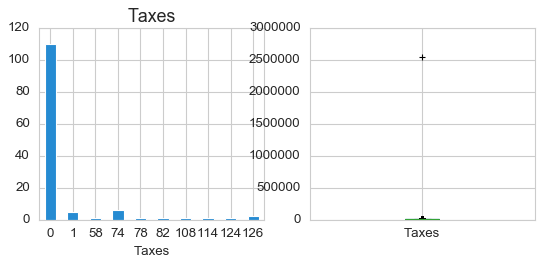

In [1969]:
hdf_taxes = estate5.toHandy()
fig,ax = plt.subplots(1,2, figsize=(8,3))
hdf_taxes.cols["Taxes"].hist(ax=ax[0])
hdf_taxes.cols["Taxes"].boxplot(ax=ax[1])
plt.show()

In [1970]:
estate5 = removeOutliers(estate5, "Taxes")
print(dfShape(estate5))

shape: n_rows: 4892, n_cols: 70


Removing outliers.

+-------+------------------+
|summary|             Taxes|
+-------+------------------+
|  count|              4892|
|   mean| 2749.575020441537|
| stddev|1628.0390454168019|
|    min|                 0|
|    max|             15080|
+-------+------------------+



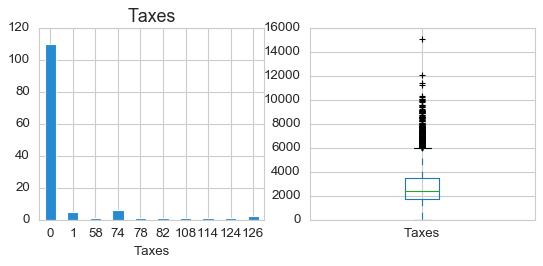

In [1971]:
estate5.select("Taxes").describe().show()

hdf_taxes = estate5.toHandy()
fig,ax = plt.subplots(1,2, figsize=(8,3))
hdf_taxes.cols["Taxes"].hist(ax=ax[0])
hdf_taxes.cols["Taxes"].boxplot(ax=ax[1])
plt.show()

In [1972]:
estate5.corr('SalesClosePrice', 'Taxes')

0.7023532292379226

This is a high correlation.

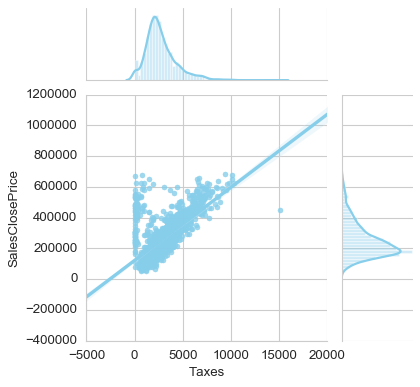

In [1973]:
taxes_sample = estate5.sample(False, 0.5, 344)
taxes_pd = taxes_sample.toPandas()

sns.jointplot(x='Taxes', y='SalesClosePrice',
              data=taxes_pd, 
              kind='reg',  color="skyblue", height=5, ratio=3)
plt.show()

Can the good feature taxes be improved by splitting on it using an UDF?

In [1974]:
taxes_udf = udf(lambda taxes: 1 if taxes >=  2754 else 0, IntegerType())
estate5 = estate5.withColumn('taxes_split', taxes_udf(F.col('Taxes')))
estate5.select('taxes_split').show(4)
estate5.corr('SalesClosePrice', 'taxes_split')

+-----------+
|taxes_split|
+-----------+
|          0|
|          0|
|          0|
|          0|
+-----------+
only showing top 4 rows



0.6046069881440722

No, it does not improve the correlation between respond and predictor variable.

Creating a variable "countableEntities" including
variables of type integer like Fireplaces, BATHSTOTAL, Bedrooms.
These variables are countable and can easily communicate
by a real estate agent to interested buyers.
This assumption about sales tactics is "domain knowledge" and
not statistcally.

In [1975]:
estate5 = \
estate5.withColumn("countableEntities", 
                   F.col("Fireplaces")+F.col('BATHSTOTAL')+
                   F.col('Bedrooms'))

estate5.select("countableEntities").show(3)
estate5.select("countableEntities").describe().show()

+-----------------+
|countableEntities|
+-----------------+
|                5|
|                7|
|                3|
+-----------------+
only showing top 3 rows

+-------+------------------+
|summary| countableEntities|
+-------+------------------+
|  count|              4892|
|   mean| 5.789452166802944|
| stddev|2.0354221455341874|
|    min|                 1|
|    max|                14|
+-------+------------------+



+-------+------------------+
|summary| countableEntities|
+-------+------------------+
|  count|              4892|
|   mean| 5.789452166802944|
| stddev|2.0354221455341874|
|    min|                 1|
|    max|                14|
+-------+------------------+



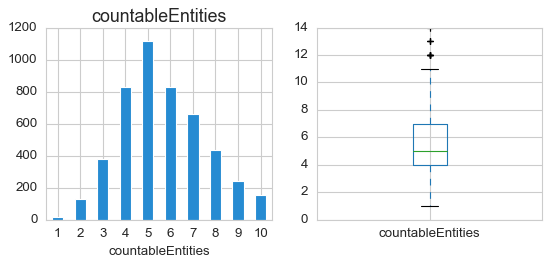

In [1976]:
estate5.select("countableEntities").describe().show()

hdf_countableEntities = estate5.toHandy()
fig,ax = plt.subplots(1,2, figsize=(8,3))
hdf_countableEntities.cols["countableEntities"].hist(ax=ax[0])
hdf_countableEntities.cols["countableEntities"].boxplot(ax=ax[1])
plt.show()

In [1977]:
estate5.corr('SalesClosePrice', "countableEntities")

0.7322419783889368

Is the correlation of the newly create variable countableEntities to 
'SalesClosePrice' higher than the correlations of the base variables individually?

In [1978]:
print(f"Fireplaces: {estate5.corr('SalesClosePrice', 'Fireplaces')}")
print(f"BATHSTOTAL: {estate5.corr('SalesClosePrice', 'BATHSTOTAL')}")
print(f"Bedrooms: {estate5.corr('SalesClosePrice', 'Bedrooms')}")

Fireplaces: 0.5377472357783609
BATHSTOTAL: 0.6817660629186811
Bedrooms: 0.5296217755753759


Yes, the correlations is higher. If using countableEntities as a feature
I should drop the base variables to avoid interaction effects.
One quintessence of feature engineering is that not all created
variables result in sufficient correlations to the target variable, but
it is worthwhile to check it out.

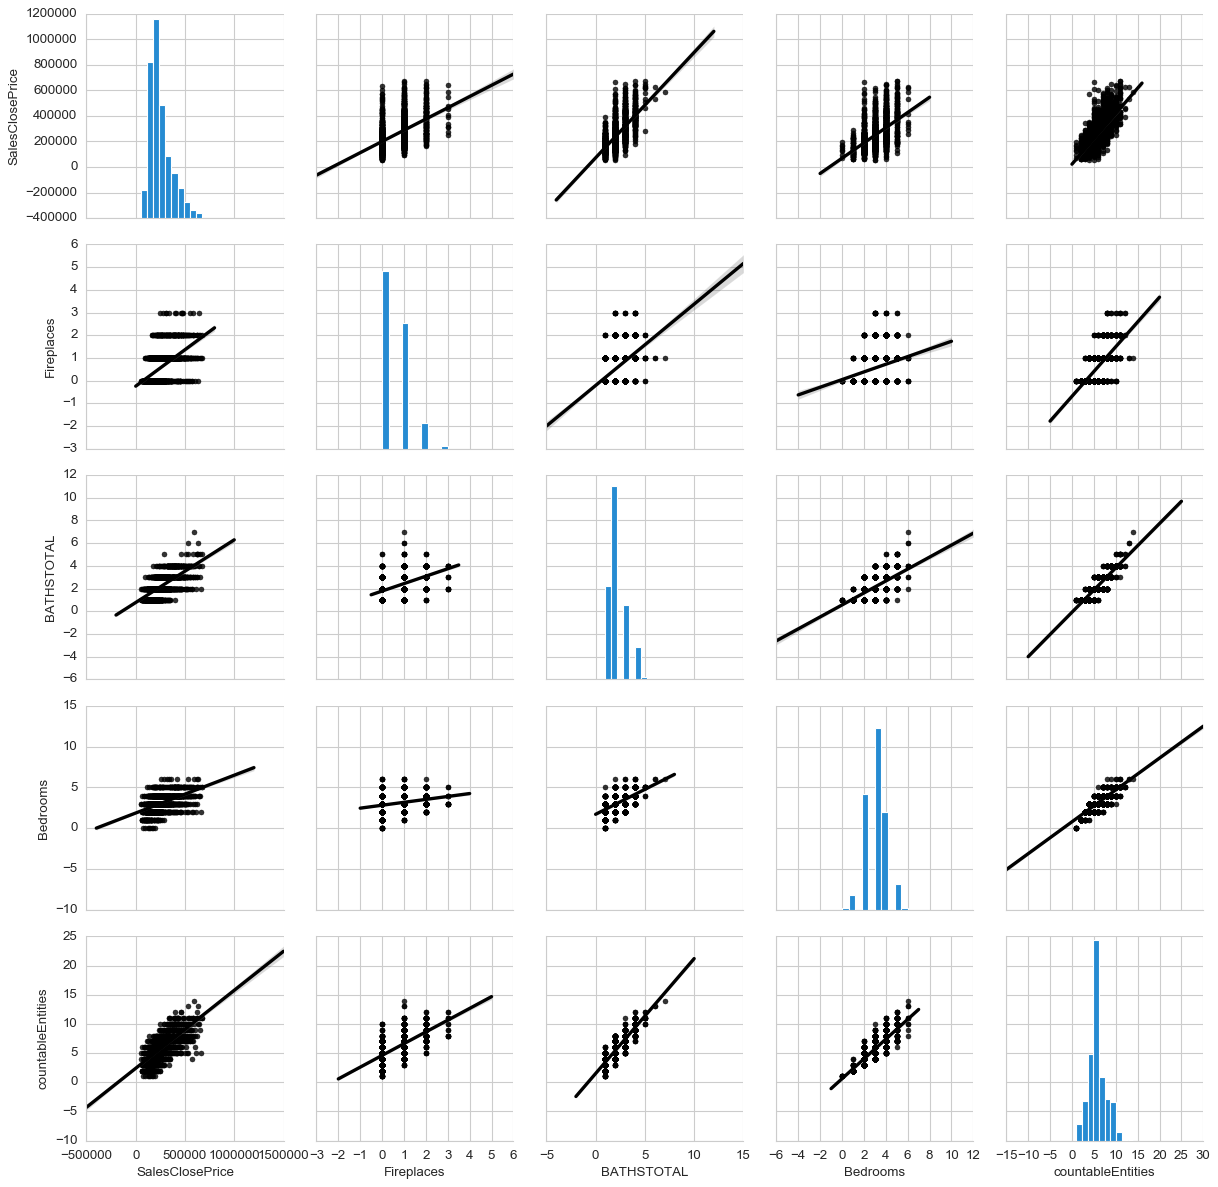

In [1979]:
pairplot_1 = estate5.sample(False, 0.391, 333)
pairplot_pd1 = pairplot_1.toPandas()

g = \
sns.pairplot(pairplot_pd1, height=3, 
             vars=['SalesClosePrice', 'Fireplaces', 'BATHSTOTAL',
                  'Bedrooms', 'countableEntities'], 
             kind='reg',
             plot_kws=dict(color='black'),
             palette="husl")

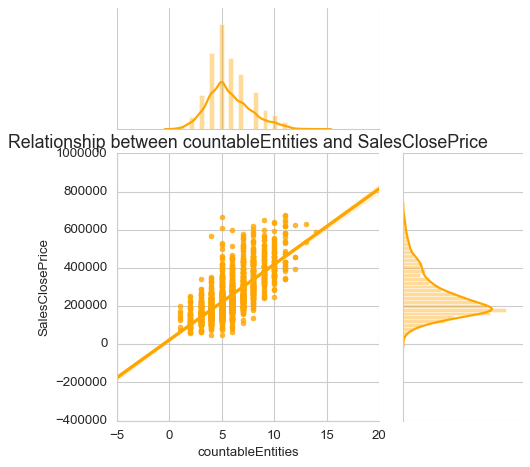

In [1980]:
g = sns.jointplot(data=pairplot_pd1,
                  x="countableEntities", y='SalesClosePrice',
                  height=6, ratio=2, kind='reg', color="orange")
plt.title("Relationship between countableEntities and SalesClosePrice")
plt.show()

#### Using variables of ata type date time as features

In [1981]:
print(inCols('LISTDATE', estate5))
print(show_dtype(estate5, 'LISTDATE'))
print(estate5.select('LISTDATE').show(10))
# 003/3/2017 0:00

True - the variable LISTDATE is in the columns.
data type of LISTDATE is string
+---------------+
|       LISTDATE|
+---------------+
| 7/15/2017 0:00|
| 10/9/2017 0:00|
| 6/26/2017 0:00|
| 8/25/2017 0:00|
| 9/12/2017 0:00|
| 4/10/2017 0:00|
|  6/8/2017 0:00|
| 11/5/2017 0:00|
|10/12/2017 0:00|
|  9/2/2017 0:00|
+---------------+
only showing top 10 rows

None


In [1982]:
# There was a problem throwing obscure values
# when applying the user defined function below
# 3/3/2017 created 003/3/2017
listdate_123 = estate5[estate5['LISTDATE']=='003/3/2017 0:00']
listdate_123.select(['LISTDATE', 'LISTPRICE']).show(4)

listdate_124= estate5[estate5['LISTDATE']=='3/3/2017 0:00']
listdate_124.select(['LISTDATE', 'LISTPRICE']).show(4)

+--------+---------+
|LISTDATE|LISTPRICE|
+--------+---------+
+--------+---------+

+-------------+---------+
|     LISTDATE|LISTPRICE|
+-------------+---------+
|3/3/2017 0:00|   292371|
|3/3/2017 0:00|   314584|
|3/3/2017 0:00|   470041|
|3/3/2017 0:00|   527543|
+-------------+---------+
only showing top 4 rows



####  String manipulation on the date variable.

<p>
The expectation is to have two digits for month and days
month.The problem here is that the the date strings are missing the zeros,
when below 9. For example 6/8/2017 is missing the zero for the month.
It should be 06/8/2017. Similar it is with the days substring 10/9/2017.
It should be 10/09/2017.
</p> 

<p>
I case of single digits how can the 0 concantenated at the beginning of of the 
crucial strings?
</p> 

<p>
Two important ways to manipulate strings in Python are:<br>
string methods and "re — Regular expression operations".<br>
Which approach will work better here?
</p> 

<p>
<b>String methods</b>
</p>


In [1983]:
f = "7/15/2017"
g = "34/15/2017"
h = "sunshine"

found1 = h.find(r"sh")
found2 = f.find(r"/")
found3 = g.find(r"/")

# this give the index of the first match
print(found1)
print(found2)
print(found3)

t = "7/05/2017"
g = "34/15/2017"
h = "sunshine"

found4 = h.find(r"sh")
# string methods do not recognize Regex, so this throws none
found5 = t.find(r"[0-9]*/[0]")
found6 = g.find(r"/")

print(f'sh : {found4}')
print(f'[0-9]*/[0] : {found5}')
print(f'/ : {found6}')
# -1 means not found

b = "7/15/2017"

index = b.find(r"/")
print(index)

if index == 1:
    a = "0" + b
    print(a)
    
    
u = "7/15/2017"
i = "34/15/2017"

def find_month(string):
    index = string.find(r"/")
    # print(index)
    if index == 1:
        return(1)
    elif index == 2:
        return (2)
    
print(find_month(u))
print(find_month(i))


def addZeroToDate(date):
    index = date.find(r"/")
    if index == 1:
        date = "0" + date
    else:
        date
    
    return date
    

ddd = "7/15/2017"
print(addZeroToDate(ddd))

ccc = "5/15/2017"
print(addZeroToDate(ccc))

uuu = "12/15/2017"
print(addZeroToDate(uuu))

addZeroToDate_udf = udf(lambda z: addZeroToDate(z), StringType())


3
1
2
sh : 3
[0-9]*/[0] : -1
/ : 2
1
07/15/2017
1
2
07/15/2017
05/15/2017
12/15/2017


<b>re — Regular expression operations  with the re-package</b>

In [1984]:
# subsetting a string by index
d = "7/15/2017"
dd = "7/9/2017"
e = "34/15/2017"

print(d[2])
print(dd[2])

print("")

def tag(reObject):
    """re.group throws an error, 
    when the result is none,
    if else checks for None"""
    
    if reObject:
        return reObject.group(0)
    else: 
        return None


1
9



The problem here is that the first part of the date string can either
be a month below 10 or above 9. It is expected to have a two digit
month. In case it is below ten the 0 at the beginning is missing.
How can the 0 concantenated at the start of the string?

In [1985]:
ii = "6/15/2017"
ff = "34/15/2017"

print(ii[0])
print(ff[0:2])

search_ii = tag(re.search(r"^[0-9][0-9]", ii))
search_ff = tag(re.search(r"^[0-9][0-9]", ff))

print(f'[0-9]*/[0]: {search_ii}')
print(f'[0-9]*/[0]: {search_ff}')

6
34
[0-9]*/[0]: None
[0-9]*/[0]: 34


In [1986]:
replace_iii = re.sub(ii[0], "0" + ii[0], ii)
print(replace_iii)

06/15/2017


These operations concern the substring in the middle of the date between 
slashes. In case of "7/15/2017" this would be /15/. It is the same
problem like above only in the middle of the date string.

In [1987]:
d = "7/15/2017"
e = "34/15/2017"
search = tag(re.search(r"\d{2}", d))
search2 = tag(re.search(r"\d{2}", e))

print(f'\d{2}: {search}')
print(f'\d{2}: {search2}')
print("")

t = "7/05/2017"
k = "34/15/2017"
h = "sunshine"

search3 = tag(re.search(r"[0-9]*/[0]", t))
search4 = tag(re.search(r"[0-9]*/[0]", k))
print(f'[0-9]*/[0]: {search3}')
print(f'[0-9]*/[0]: {search4}')

print("")

t = "7/5/2017"
k = "34/15/2017"
h = "sunshine"

search5 = tag(re.search(r"^[0-9][0-9]/[0-9][0-9]", t))
search6 = tag(re.search(r"^[0-9][0-9]/[0-9][0-9]", k))
print(f'[0-9]*/[0-9][0-9]/: {search5}')
print(f'[0-9]*/[0-9][0-9]/: {search6}')


\d2: 15
\d2: 34

[0-9]*/[0]: 7/0
[0-9]*/[0]: None

[0-9]*/[0-9][0-9]/: None
[0-9]*/[0-9][0-9]/: 34/15


In [1988]:
dd = "7/9/2017"
replace_11 = re.sub(dd[2], "0" + dd[2], dd)
print(replace_11)
print(len(replace_11))
print(len(dd[2]))
print(dd[len(dd[2])-1])

ui = tag(re.search(r"^[0-9]*/[0-9][0-9]/$", '09/15/2017'))
print(ui)

7/09/2017
9
1
7
None


In [1989]:
def addZeros(string):
    # print("string[0]:", string[0])
    # sub = substring
    sub_start = tag(re.search(r"^[0-9][0-9]",string))
    # print("sub_start:", sub_start)
    if sub_start == None:
        # string = string.replace(string[0], "0" + string[0], 1)
        string = "0" + string
        # string = re.sub(string[0], "0" + string[0], string)
       
    else:
        string
        
    # print("string first step:", string)
    # print("string[0]:", string[0])

            
    sub_middle = tag(re.search(r"^[0-9][0-9]/[0-9][0-9]/",string))
    
    # print(sub_middle)
    # print(string[3])
    
    if sub_middle == None:
        stringModfied = string[:3] + "0" + string[3:]
        # stringModfied = string.replace(string[3], "0" + string[3], 1)
        # stringModfied = re.sub(string[3], "0" + string[3], string)
        # print("string step 2:", string[3])
        return stringModfied
    else:
        return string


A combination of re-functions and string methods offers the best
solution. str.replace creates a problem because of the  count argument the replacement is applied again on the month part.
A simple string concatenation is used her.
This is easier than applying the re-function like this 
stringModfied = re.sub(string[3], "0" + string[3], string),
which would replace all digits in the string with string[3].
This creates trouble, too.

In [1990]:
print(addZeros("9/15/2017"))

09/15/2017


In [1991]:
# 00050/5/2017
print(addZeros("05/5/2017"))

05/05/2017


In [1992]:
# 003/3/2017
print(addZeros("3/3/2017"))

03/03/2017


In [1993]:
print(addZeros("6/6/2017"))

06/06/2017


In [1994]:
print(addZeros("2/2/2017"))
z77 = addZeros("2/2/2017")
print(type(z77))

02/02/2017
<class 'str'>


In [1995]:
print(addZeros("9/9/2017"))

09/09/2017


In [1996]:
print(addZeros("2/3/2017"))

02/03/2017


In [1997]:
print(addZeros("4/7/2017"))

04/07/2017


In [1998]:
print(addZeros("6/7/2017"))
print(addZeros("9/15/2017"))
print(addZeros("11/9/2017"))
print(addZeros("2/3/2017"))

06/07/2017
09/15/2017
11/09/2017
02/03/2017


In [1999]:
addZerosUdf = udf(lambda g: addZeros(g), StringType())

In [2000]:
estate5 = \
estate5.withColumn('LISTDATE', addZerosUdf(F.col('LISTDATE')))
print(estate5.select('LISTDATE').show(20))

+---------------+
|       LISTDATE|
+---------------+
|07/15/2017 0:00|
|10/09/2017 0:00|
|06/26/2017 0:00|
|08/25/2017 0:00|
|09/12/2017 0:00|
|04/10/2017 0:00|
|06/08/2017 0:00|
|11/05/2017 0:00|
|10/12/2017 0:00|
|09/02/2017 0:00|
|05/19/2017 0:00|
|05/11/2017 0:00|
|03/12/2017 0:00|
|03/06/2017 0:00|
|05/18/2017 0:00|
|10/15/2017 0:00|
|09/10/2017 0:00|
|09/01/2017 0:00|
|05/06/2017 0:00|
|08/11/2017 0:00|
+---------------+
only showing top 20 rows

None


In [2001]:
# check for the problem again
listdate_123 = estate5[estate5['LISTDATE']=='003/3/2017 0:00']
listdate_123.select(['LISTDATE', 'LISTPRICE']).show(4)


+--------+---------+
|LISTDATE|LISTPRICE|
+--------+---------+
+--------+---------+



Creating a time series.

In [2002]:
# print(estate5.columns)
timeSeries_1 = estate5.select(['LISTDATE', 'LISTPRICE'])
timeSeries_1.show(3)
timePD = timeSeries_1.toPandas()


+---------------+---------+
|       LISTDATE|LISTPRICE|
+---------------+---------+
|07/15/2017 0:00|   139900|
|10/09/2017 0:00|   210000|
|06/26/2017 0:00|   225000|
+---------------+---------+
only showing top 3 rows



In [2003]:
# This is again referencing to the problem described above
timeSeries_1[timeSeries_1['LISTDATE']=='003/3/2017 0:00'].show()

+--------+---------+
|LISTDATE|LISTPRICE|
+--------+---------+
+--------+---------+



In [2004]:
# Converting the variable to the datetime format is crucial
timePD['LISTDATE'] = pd.to_datetime(timePD['LISTDATE'])
print(timePD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 2 columns):
LISTDATE     4892 non-null datetime64[ns]
LISTPRICE    4892 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 57.5 KB
None


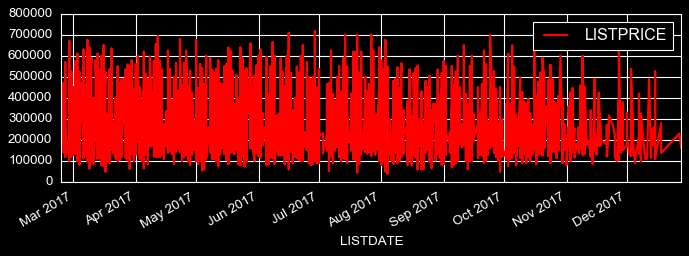

In [2005]:
plt.style.use('dark_background')
fig, ax = plt.subplots(1,1, figsize=(10,3))
timePD.plot(x='LISTDATE', y='LISTPRICE', ax=ax, 
            color="r")
plt.show()

<p>
<b>pyspark.sql.functions.to_date(col, format=None)</b><br>
Converts a Column of pyspark.sql.types.StringType 
or pyspark.sql.types.TimestampType into pyspark.sql.types.DateType 
using the optionally specified format. 
</p> 

<p>
df.select(to_date(df.t, 'yyyy-MM-dd HH:mm:ss').alias('date')).collect()<br>
[Row(date=datetime.date(1997, 2, 28))]
</p>
<a href="https://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=dateformat" target="_blank">doc</a> 


In [2006]:
# 7/15/2017 0:00
estate5 = \
estate5.withColumn('LISTDATE', to_date('LISTDATE', 'MM/dd/yyyy H:mm'))

print(show_dtype(estate5, 'LISTDATE'))
print(estate5.select('LISTDATE').show(10))

data type of LISTDATE is date
+----------+
|  LISTDATE|
+----------+
|2017-07-15|
|2017-10-09|
|2017-06-26|
|2017-08-25|
|2017-09-12|
|2017-04-10|
|2017-06-08|
|2017-11-05|
|2017-10-12|
|2017-09-02|
+----------+
only showing top 10 rows

None


Converting the date into the weekday represented by integers, whereby
Sunday is 1 and Saturday is 7.

In [2007]:
estate5 = \
estate5.withColumn("ListWeekday", dayofweek('LISTDATE'))
print(show_dtype(estate5, "ListWeekday"))
print(estate5.select("ListWeekday").show(4))

data type of ListWeekday is int
+-----------+
|ListWeekday|
+-----------+
|          7|
|          2|
|          2|
|          6|
+-----------+
only showing top 4 rows

None


In [2008]:
estate5_pd = estate5.sample(False, 0.3, 123).toPandas()

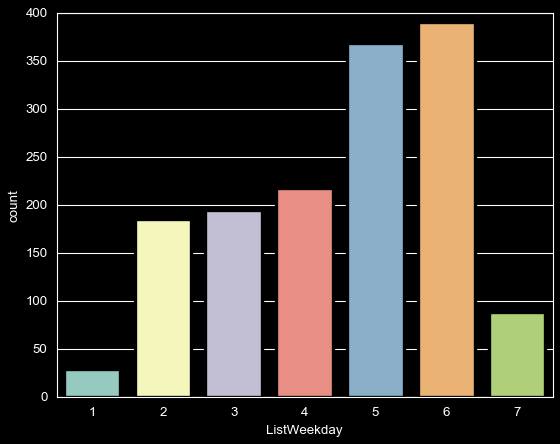

In [2009]:
g = sns.countplot('ListWeekday', data=estate5_pd, edgecolor="black",
                  linewidth=3)
plt.show()

In [2010]:
estate5.corr("SalesClosePrice", 'ListWeekday')

-0.03137032013678436

In [2011]:
ListWeekday_pd = estate5.toPandas()
# ListWeekday_pd.info()
# ListWeekday_pd['ListWeekday']

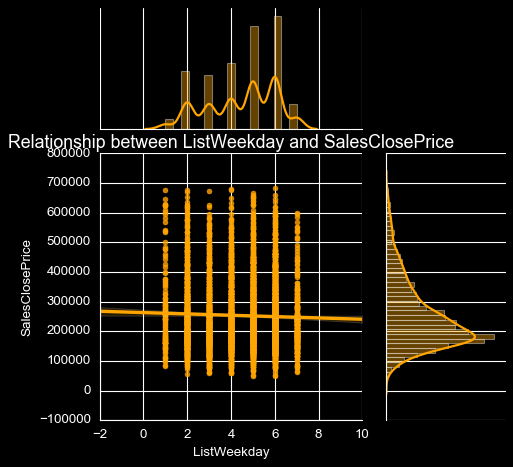

In [2012]:
plt.style.use('dark_background')
g = sns.jointplot(data=ListWeekday_pd,
                  x='ListWeekday', y='SalesClosePrice',
                  height=6, ratio=2, kind='reg', color="orange")
plt.title("Relationship between ListWeekday and SalesClosePrice")
plt.show()

#### Making month of offmarketdate a date feature

<p>
Domain knowledge might tell you that the month influences
the decision to buy,even if this is not a conscious factor.
</p> 



In [2013]:
# print(estate5.columns)
# looking for other date variables
a, b = matchPattern_onList(df=estate5, expression='date')
d = matchPattern_onList(df=estate5, expression='DATE')

print(a)
print(b)
print(d)

estate5.select('offmarketdate').show(3)

['offmarketdate']
['17.offmarketdate']
(['LISTDATE'], ['7.LISTDATE'])
+---------------+
|  offmarketdate|
+---------------+
| 7/30/2017 0:00|
|10/13/2017 0:00|
| 7/24/2017 0:00|
+---------------+
only showing top 3 rows



In [2014]:
estate5 = \
estate5.withColumn('offmarketdate', addZerosUdf(F.col('offmarketdate')))
print(estate5.select('offmarketdate').show(10))

+---------------+
|  offmarketdate|
+---------------+
|07/30/2017 0:00|
|10/13/2017 0:00|
|07/24/2017 0:00|
|09/13/2017 0:00|
|10/03/2017 0:00|
|04/27/2017 0:00|
|07/10/2017 0:00|
|11/10/2017 0:00|
|11/11/2017 0:00|
|11/20/2017 0:00|
+---------------+
only showing top 10 rows

None


In [2015]:
estate5 = \
estate5.withColumn('offmarketdate', 
                   to_date('offmarketdate', 'MM/dd/yyyy H:mm'))

estate5.select('offmarketdate').show(3)

+-------------+
|offmarketdate|
+-------------+
|   2017-07-30|
|   2017-10-13|
|   2017-07-24|
+-------------+
only showing top 3 rows



In [2016]:
estate5 = \
estate5.withColumn('offMonth', month('offmarketdate'))
estate5.select('offMonth').show(5)

+--------+
|offMonth|
+--------+
|       7|
|      10|
|       7|
|       9|
|      10|
+--------+
only showing top 5 rows



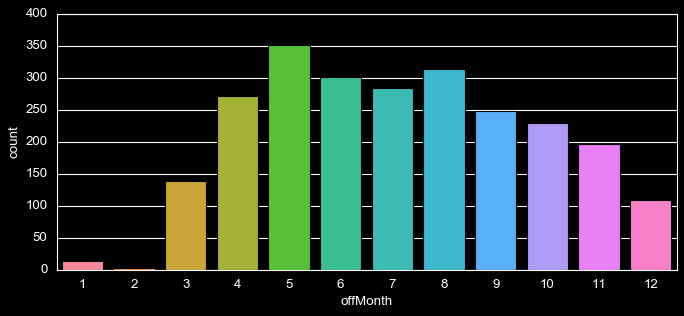

In [2017]:
offPD = estate5.sample(False, 0.5, 23).toPandas()
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
g = sns.countplot('offMonth', data=offPD, edgecolor='black',
                  linewidth=1, saturation=1, ax= ax1)
plt.show()

In [2018]:
# estate5.corr('SalesClosePrice', 'offmarketdate')
estate5.corr('SalesClosePrice', 'offMonth')

-0.06054978258454207

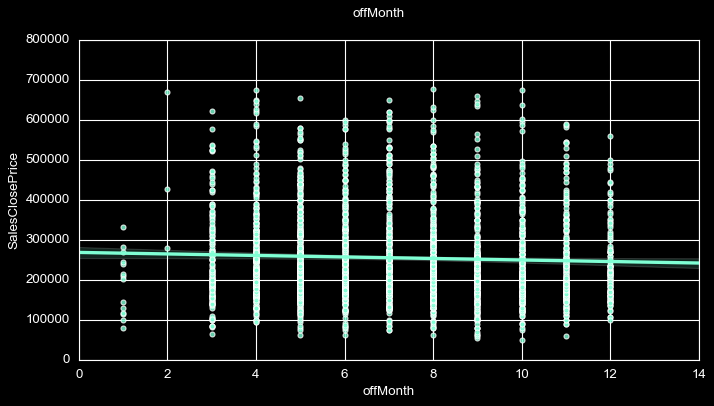

In [2019]:
fig, ax1= plt.subplots(1,1,figsize=(10,5))
plt.suptitle("offMonth")
sns.regplot(x='offMonth', y='SalesClosePrice', data=offPD,
            color='aquamarine',
            scatter_kws=dict(edgecolor='white', linewidth=1),
            ax=ax1)
plt.show()

The correlation is low and offMonth makes not a good feature.

#### Creating a feature from YEARBUILT

<p>
Domain knowledge of the market says that buyers prefer "new" houses
not older than 25 years. Is this hypothesis true?
</p> 


In [2020]:
estate5.select('YEARBUILT').show(3)
estate5.select('YEARBUILT').describe().show()
estate5.select('YEARBUILT').distinct().orderBy('YEARBUILT').show(10)
# estate5.printSchema()

+---------+
|YEARBUILT|
+---------+
|     1950|
|     1971|
|     1949|
+---------+
only showing top 3 rows

+-------+------------------+
|summary|         YEARBUILT|
+-------+------------------+
|  count|              4892|
|   mean|1958.9908013082584|
| stddev| 38.62415712224636|
|    min|              1850|
|    max|              2018|
+-------+------------------+

+---------+
|YEARBUILT|
+---------+
|     1850|
|     1858|
|     1865|
|     1868|
|     1871|
|     1872|
|     1874|
|     1875|
|     1876|
|     1878|
+---------+
only showing top 10 rows



In [2021]:
estate5.corr('SalesClosePrice', 'YEARBUILT')

0.29600249894560593

In [2022]:
newHouse_25 = 2018 -25

newHouses_udf = \
udf(lambda yearbuilt: 1 if yearbuilt >= newHouse_25 \
    else 0, IntegerType())

estate5 = \
estate5.withColumn('newHouses', newHouses_udf(F.col('YEARBUILT')))

print(estate5.select('newHouses').distinct().show())

+---------+
|newHouses|
+---------+
|        1|
|        0|
+---------+

None


In [2023]:
estate5.corr('SalesClosePrice', 'newHouses')

0.3531460383633662

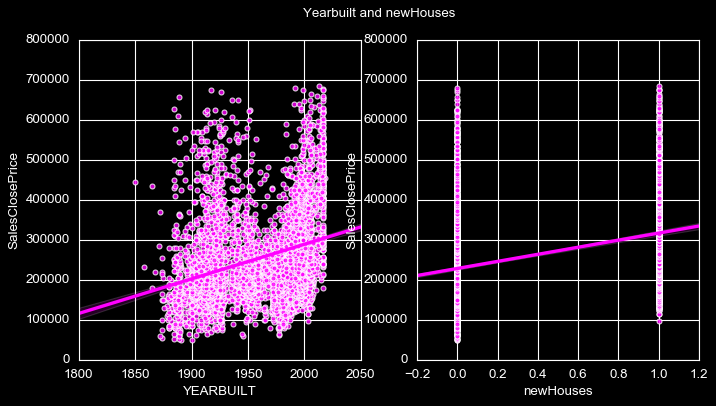

In [2024]:
newHouses_pd = estate5.toPandas()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
plt.suptitle('Yearbuilt and newHouses')

sns.regplot(x='YEARBUILT', y='SalesClosePrice', ax=ax1,
                  data=newHouses_pd, color='magenta',
                  scatter_kws=dict(edgecolor='white', linewidth=1))

sns.regplot(x='newHouses', y='SalesClosePrice', ax=ax2,
                  data=newHouses_pd, color='magenta',
                  scatter_kws=dict(edgecolor='white', linewidth=1))
plt.show()

Interestingly dividing into old and new houses increase the 
strengths of the correlation.

<b>Adding additional features from new data.</b><br>
In this case the reported median values of the year before the
year, when the real estate was listed, is added.
Buyers are probably include the reported price in their evaluation
of the list price.

In [2025]:
medianPrices = spark.read.csv('MedianHomeValues.csv', header=True,
                            sep=";", inferSchema=True)
print(type(medianPrices))
print(dfShape(medianPrices))
print(medianPrices.show(3))
medianPrices.printSchema()
print(medianPrices.select('Year').distinct().show())

<class 'pyspark.sql.dataframe.DataFrame'>
shape: n_rows: 10, n_cols: 4
+----------------+----------+---------------+----+
|CityAbbreviation|  CityName|MedianHomeValue|Year|
+----------------+----------+---------------+----+
|            LELM| Lake Elmo|         401000|2016|
|            MAPW| Maplewood|         193000|2016|
|             STP|Saint Paul|         172000|2016|
+----------------+----------+---------------+----+
only showing top 3 rows

None
root
 |-- CityAbbreviation: string (nullable = true)
 |-- CityName: string (nullable = true)
 |-- MedianHomeValue: integer (nullable = true)
 |-- Year: integer (nullable = true)

+----+
|Year|
+----+
|2016|
|2015|
+----+

None


In [2026]:
estate6 = estate5

In [2027]:
estate6 = estate6.withColumn('listYear', year('LISTDATE'))
estate6.select('listYear').show(4)

+--------+
|listYear|
+--------+
|    2017|
|    2017|
|    2017|
|    2017|
+--------+
only showing top 4 rows



In [2028]:
estate6 = estate6.withColumn('reportYear', F.col("listYear")-1)
estate6.select('reportYear').show(4)

+----------+
|reportYear|
+----------+
|      2016|
|      2016|
|      2016|
|      2016|
+----------+
only showing top 4 rows



There are two data frames. Joining these data frames
requires at leat one key to join on. The estate6 has
a city variable similar to the city variables in median prices.
The cities variables are concatenated below with Pyspark
making it equal to city in estate6.

In [2029]:
estate6.select(['City', 'listYear', 'reportYear']).show(3)
medianPrices.printSchema()

+----------------+--------+----------+
|            City|listYear|reportYear|
+----------------+--------+----------+
|LELM - Lake Elmo|    2017|      2016|
|LELM - Lake Elmo|    2017|      2016|
|LELM - Lake Elmo|    2017|      2016|
+----------------+--------+----------+
only showing top 3 rows

root
 |-- CityAbbreviation: string (nullable = true)
 |-- CityName: string (nullable = true)
 |-- MedianHomeValue: integer (nullable = true)
 |-- Year: integer (nullable = true)



In [2030]:
# from pyspark.sql.functions import concat, col, lit
medianPrices2 =\
medianPrices.withColumn("CityName_long", concat(F.col('CityAbbreviation'), \
                        lit(" - "), F.col('CityName')))

print(type(medianPrices2))
medianPrices2.printSchema()
medianPrices2.show(3)

<class 'pyspark.sql.dataframe.DataFrame'>
root
 |-- CityAbbreviation: string (nullable = true)
 |-- CityName: string (nullable = true)
 |-- MedianHomeValue: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- CityName_long: string (nullable = true)

+----------------+----------+---------------+----+----------------+
|CityAbbreviation|  CityName|MedianHomeValue|Year|   CityName_long|
+----------------+----------+---------------+----+----------------+
|            LELM| Lake Elmo|         401000|2016|LELM - Lake Elmo|
|            MAPW| Maplewood|         193000|2016|MAPW - Maplewood|
|             STP|Saint Paul|         172000|2016|STP - Saint Paul|
+----------------+----------+---------------+----+----------------+
only showing top 3 rows



In [2031]:
medianPrices3 = medianPrices2.drop('CityName').drop('CityAbbreviation')
# df.withColumnRenamed('age', 'age2').collect()
medianPrices3 = \
medianPrices3.withColumnRenamed('CityName_long', 'CityPrices')
medianPrices3.printSchema()

root
 |-- MedianHomeValue: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- CityPrices: string (nullable = true)



In [2032]:
condition_medianPrices = \
[estate6['City'] == medianPrices3['CityPrices'],
estate6['reportYear'] == medianPrices3['Year']]

In [2033]:
estate6 = \
estate6.join(medianPrices3, on = condition_medianPrices, how='left')

In [2034]:
estate6.select(['City', 'CityPrices', 'Year', 'reportYear', 'MedianHomeValue']).show(5)

+----------------+----------------+----+----------+---------------+
|            City|      CityPrices|Year|reportYear|MedianHomeValue|
+----------------+----------------+----+----------+---------------+
|LELM - Lake Elmo|LELM - Lake Elmo|2016|      2016|         401000|
|LELM - Lake Elmo|LELM - Lake Elmo|2016|      2016|         401000|
|LELM - Lake Elmo|LELM - Lake Elmo|2016|      2016|         401000|
|LELM - Lake Elmo|LELM - Lake Elmo|2016|      2016|         401000|
|LELM - Lake Elmo|LELM - Lake Elmo|2016|      2016|         401000|
+----------------+----------------+----+----------+---------------+
only showing top 5 rows



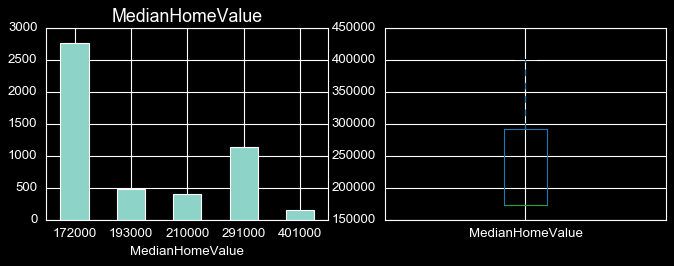

In [2035]:
estate6 = estate6.drop('CityPrices')
MedianHomeValue_hdf = estate6.toHandy()
# drop null values
MedianHomeValue_hdf = \
MedianHomeValue_hdf.dropna(subset=('MedianHomeValue'))
fig, axs = plt.subplots(1,2, figsize=(10,3))
MedianHomeValue_hdf.cols['MedianHomeValue'].hist(ax=axs[0])
MedianHomeValue_hdf.cols['MedianHomeValue'].boxplot(ax=axs[1])
plt.show()

In [2036]:
estate6.corr('SalesClosePrice', 'MedianHomeValue')

0.39110853805384693

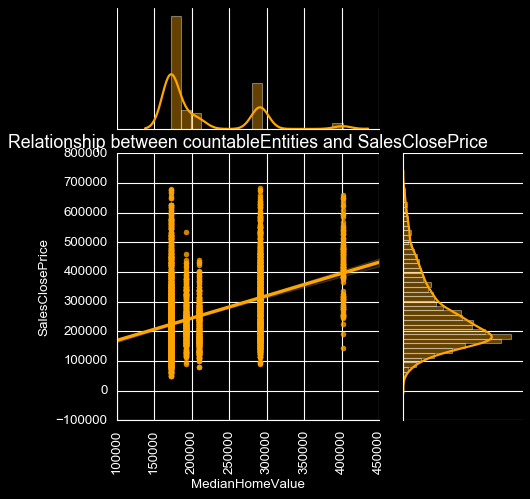

In [2037]:
MedianHomeValue_pd = estate6.toPandas()

g = sns.jointplot(data=MedianHomeValue_pd,
                  x='MedianHomeValue', y='SalesClosePrice',
                  height=6, ratio=2, kind='reg', color="orange")
plt.xticks(rotation=90)
plt.title("Relationship between countableEntities and SalesClosePrice")
plt.show()

#### Introducing Window Functions in Spark SQL

<p>
"Window functions allow users of Spark SQL to calculate results such 
as the rank of a given row or a moving average over a range of input rows. They significantly improve the expressiveness of Spark’s SQL and DataFrame APIs."
</p> 

<a href="https://databricks.com/blog/2015/07/15/introducing-window-functions-in-spark-sql.html" target="_blank">Databricks</a>


<p>
In the first example below the estate or houses indentified by
street adress are partioned by city and then ordered by 
SalesClosePrice.
</p>

In [2038]:
estate6.createOrReplaceTempView("estate6_windows")
# print(spark_session.catalog.listTables())

In [2039]:
# sort_list(estate6)

query_city = \
"SELECT streetaddress, City, SalesClosePrice \
FROM (SELECT \
streetaddress,\
City,\
SalesClosePrice,\
dense_rank() OVER (PARTITION BY city ORDER BY SalesClosePrice DESC) \
as rank FROM estate6_windows) tmp \
WHERE \
rank <= 2"

# dense_rank is window Ranking function

In [2040]:
# this show the column names
query_city_2 = spark.sql(query_city)
query_city_2.show()

+-------------------+----------------+---------------+
|      streetaddress|            City|SalesClosePrice|
+-------------------+----------------+---------------+
|4710 Olson Lake Trl|  OAKD - Oakdale|         439000|
|      8160 9th St N|  OAKD - Oakdale|         435000|
| 2478 Hillwood Dr E|MAPW - Maplewood|         535000|
|  2440 Linwood Ct E|MAPW - Maplewood|         460000|
|    11695 Aster Way|   WB - Woodbury|         683000|
| 8905 Springwood Dr|   WB - Woodbury|         675000|
|    11784 56th St N|LELM - Lake Elmo|         660000|
|4107 Lavender Ave N|LELM - Lake Elmo|         654113|
|    2369 Carter Ave|STP - Saint Paul|         680000|
|   351 Pleasant Ave|STP - Saint Paul|         677093|
+-------------------+----------------+---------------+



#### Creating features with Window functions

In [2041]:
mortages = spark.read.csv(path='mortage.csv', sep=';', header=True,
                          inferSchema=True)

print(dfShape(mortages))
mortages.printSchema()
# print(mortages.show(mortages.count(), truncate=False))
print(mortages.show(10, truncate=False))

shape: n_rows: 261, n_cols: 2
root
 |-- date: string (nullable = true)
 |-- mortage: double (nullable = true)

+----------+-------+
|date      |mortage|
+----------+-------+
|10.10.2013|4.23   |
|17.10.2013|4.28   |
|24.10.2013|4.13   |
|31.10.2013|4.1    |
|07.11.2013|4.16   |
|14.11.2013|4.35   |
|21.11.2013|4.22   |
|27.11.2013|4.29   |
|05.12.2013|4.46   |
|12.12.2013|4.42   |
+----------+-------+
only showing top 10 rows

None


In [2042]:
# 'yyyy-MM-dd HH:mm:ss'
mortages2 = \
mortages.withColumn('date', to_date('date', 'dd.MM.yyyy'))

mortages2 = mortages2.withColumnRenamed('date', 'dateMortage')

print(mortages2.show(3))
mortages2.printSchema()

+-----------+-------+
|dateMortage|mortage|
+-----------+-------+
| 2013-10-10|   4.23|
| 2013-10-17|   4.28|
| 2013-10-24|   4.13|
+-----------+-------+
only showing top 3 rows

None
root
 |-- dateMortage: date (nullable = true)
 |-- mortage: double (nullable = true)



In [2043]:
w = Window().orderBy(mortages2['dateMortage'])
print(w)


In [2044]:
mortages2 = mortages2.withColumn('date-1', lag('dateMortage').over(w))

mortages2 = mortages2.withColumn('mortage-1', lag('mortage').over(w))

mortages2.printSchema()

root
 |-- dateMortage: date (nullable = true)
 |-- mortage: double (nullable = true)
 |-- date-1: date (nullable = true)
 |-- mortage-1: double (nullable = true)



In [2045]:
mortages2.select(['dateMortage', 'mortage', 
                  'date-1', 'mortage-1']).show(4)

+-----------+-------+----------+---------+
|dateMortage|mortage|    date-1|mortage-1|
+-----------+-------+----------+---------+
| 2013-10-10|   4.23|      null|     null|
| 2013-10-17|   4.28|2013-10-10|     4.23|
| 2013-10-24|   4.13|2013-10-17|     4.28|
| 2013-10-31|    4.1|2013-10-24|     4.13|
+-----------+-------+----------+---------+
only showing top 4 rows



Checking the number of days per reporting periods.

In [2046]:
# reporting periods
mortages2 = \
mortages2.withColumn('Days_Between_Report', 
                     datediff('dateMortage', 'date-1'))

mortages2.select(['dateMortage', 'date-1', 'Days_Between_Report']).show(5)


+-----------+----------+-------------------+
|dateMortage|    date-1|Days_Between_Report|
+-----------+----------+-------------------+
| 2013-10-10|      null|               null|
| 2013-10-17|2013-10-10|                  7|
| 2013-10-24|2013-10-17|                  7|
| 2013-10-31|2013-10-24|                  7|
| 2013-11-07|2013-10-31|                  7|
+-----------+----------+-------------------+
only showing top 5 rows



In [2047]:
# difference to previous mortage
mortages2 = \
mortages2.withColumn('diff_previousMort', 
                     round(F.col('mortage') - F.col('mortage-1'),5))

mortages2.select(['dateMortage', 'mortage', 'diff_previousMort']).show(5)

+-----------+-------+-----------------+
|dateMortage|mortage|diff_previousMort|
+-----------+-------+-----------------+
| 2013-10-10|   4.23|             null|
| 2013-10-17|   4.28|             0.05|
| 2013-10-24|   4.13|            -0.15|
| 2013-10-31|    4.1|            -0.03|
| 2013-11-07|   4.16|             0.06|
+-----------+-------+-----------------+
only showing top 5 rows



In [2048]:
# estate6.columns
# 'LISTDATE'

date_condition = estate6['LISTDATE']==mortages2['dateMortage']

estate6 = \
estate6.join(mortages2, on = [date_condition], how='left')



In [2049]:
estate6.columns
m, k = matchPattern_onList(estate6, 'Mortage')
print(m)
# estate6.select(['LISTDATE', 'dateMortage', 'mortage']).show(5)

['dateMortage']


In [2050]:
estate6.select(['LISTDATE', 'dateMortage', 'mortage']).show(5)

+----------+-----------+-------+
|  LISTDATE|dateMortage|mortage|
+----------+-----------+-------+
|2017-07-15|       null|   null|
|2017-10-09|       null|   null|
|2017-06-26|       null|   null|
|2017-08-25|       null|   null|
|2017-09-12|       null|   null|
+----------+-----------+-------+
only showing top 5 rows



In [2051]:
print(estate6.select('mortage').distinct().count())
estate6.select('mortage').distinct().show(4)

27
+-------+
|mortage|
+-------+
|   4.23|
|   4.02|
|   3.88|
|   3.93|
+-------+
only showing top 4 rows



There are only 27 matches created by the left join.

In [2052]:
estate6.corr('SalesClosePrice', 'mortage')

0.007665114762011829

The correlation is minimal. As it did not work out the columns
are dropped now.

In [2053]:
mortageCol_drop = mortages2.columns
estate6 = estate6.drop(*mortageCol_drop)

z12 = matchPattern_onList(estate6, 'Mortage')
print(z12)

The expression does not match any list elements.


#### Extraction features from existing variables

In [2054]:
estate7 = estate6
print(estate7.count())
# sort_list(estate7)

4892


In [2055]:
distinct_roof = estate7.select('ROOF').distinct()

print(distinct_roof.count())
print(distinct_roof.show(10, truncate=False))

68
+------------------------------------------------------------+
|ROOF                                                        |
+------------------------------------------------------------+
|Asphalt Shingles, Age Over 8 Years                          |
|Asphalt Shingles, Pitched, Flat, Age 8 Years or Less, Rubber|
|Pitched, Age 8 Years or Less                                |
|Flat, Tar/Gravel, Rubber                                    |
|Asphalt Shingles, Pitched, Flat                             |
|Flat, Age 8 Years or Less                                   |
|Pitched, Flat, Age 8 Years or Less                          |
|Pitched                                                     |
|Asphalt Shingles, Pitched, Flat, Age Over 8 Years           |
|Asphalt Shingles, Age 8 Years or Less                       |
+------------------------------------------------------------+
only showing top 10 rows

None


#### pyspark.sql.functions.when(condition, value)

<p>
Evaluates a list of conditions and returns one of multiple possible result expressions. If Column.otherwise() is not invoked, None is returned for unmatched conditions.
</p> 

<p>
Parameters
</p> 

<ul>
  <li>condition – a boolean Column expression.</li>
  <li>value – a literal value, or a Column expression.</li>
</ul> 



<a href="https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.functions.when" target="_blank">pyspark.sql.functions</a> 



In [2056]:
# get the values based on the condition of like
age_over_8 = estate7['ROOF'].like('%Age 8 Years or Less%')
age_less_8 = estate7['ROOF'].like('%Age Over 8 Years%')

print(type(age_over_8))

<class 'pyspark.sql.column.Column'>


In [2057]:
age_over_82 = estate7.where(F.col('Roof').like('%Age 8 Years or Less%'))
age_over_82.select('Roof').show(5, truncate=False)
# okay this did work: Age 8 Years or Less

+----------------------------------------------+
|Roof                                          |
+----------------------------------------------+
|Asphalt Shingles, Pitched, Age 8 Years or Less|
|Asphalt Shingles, Pitched, Age 8 Years or Less|
|Asphalt Shingles, Age 8 Years or Less         |
|Asphalt Shingles, Age 8 Years or Less         |
|Asphalt Shingles, Age 8 Years or Less         |
+----------------------------------------------+
only showing top 5 rows



In [2058]:
estate7 = \
estate7.withColumn('newRoof',(F.when(age_less_8, 1).\
                              when(age_over_8, 0).otherwise(None)))



In [2059]:
estate7.select('newRoof').distinct().show()
estate7.select(['ROOF', 'newRoof']).show(3)

+-------+
|newRoof|
+-------+
|   null|
|      1|
|      0|
+-------+

+--------------------+-------+
|                ROOF|newRoof|
+--------------------+-------+
|                null|   null|
|Asphalt Shingles,...|      0|
|                null|   null|
+--------------------+-------+
only showing top 3 rows



In [2060]:
estate7.groupBy('newRoof').count().show()

+-------+-----+
|newRoof|count|
+-------+-----+
|   null| 2571|
|      1| 1021|
|      0| 1300|
+-------+-----+



In [2061]:
print(estate7.where(F.col('newRoof')==1).count())
print(estate7.where(F.col('newRoof')==0).count())
print(estate7.where(F.col('newRoof')=='null').count())
# null does not work here

1021
1300
0


In [2062]:
estate7.corr('SalesClosePrice', 'newRoof')

0.007534674304085954

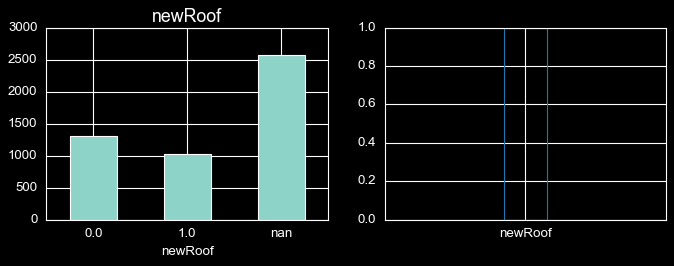

In [2063]:
hdf_roof = estate7.toHandy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=None, hspace=0.9)

hdf_roof.cols['newRoof'].hist(ax=ax1)
hdf_roof.cols['newRoof'].boxplot(ax=ax2)


plt.show()

#### Extracting new features from substrings
by splitting the string roof column along substrings. 
Every new substring could be a new feature in a model.
By doing this there is a risk that the number of features
are "exploding" without contributing to
the model effectivness.

In [2064]:
roof_split = split(F.col('ROOF'), ",")
print(type(roof_split))

estate7 = estate7.withColumn('roof_material', roof_split)

estate7.select('ROOF').show(3, truncate=False)
estate7.select('roof_material').show(3, truncate=False)


<class 'pyspark.sql.column.Column'>
+----------------------------------------------+
|ROOF                                          |
+----------------------------------------------+
|null                                          |
|Asphalt Shingles, Pitched, Age 8 Years or Less|
|null                                          |
+----------------------------------------------+
only showing top 3 rows

+--------------------------------------------------+
|roof_material                                     |
+--------------------------------------------------+
|null                                              |
|[Asphalt Shingles,  Pitched,  Age 8 Years or Less]|
|null                                              |
+--------------------------------------------------+
only showing top 3 rows



In [2065]:
roof_df = estate7.withColumn('roofSubstrings', 
                             split(F.col('ROOF'), ",")
                             )

roof_df = roof_df.withColumn('row_id', F.monotonically_increasing_id())


roof_exploded = \
roof_df.withColumn('explodedSubstrings', 
                   explode(F.col('roofSubstrings')))

In [2066]:
roof_exploded = \
roof_exploded.withColumn('constant', lit(1))

roof_exploded.select(['row_id', 'explodedSubstrings', 'constant']).show(7)

+------+--------------------+--------+
|row_id|  explodedSubstrings|constant|
+------+--------------------+--------+
|     1|    Asphalt Shingles|       1|
|     1|             Pitched|       1|
|     1| Age 8 Years or Less|       1|
|     3|    Asphalt Shingles|       1|
|     3|             Pitched|       1|
|     3| Age 8 Years or Less|       1|
|     4|    Asphalt Shingles|       1|
+------+--------------------+--------+
only showing top 7 rows



In [2067]:
roof_pivot = \
roof_exploded.groupby('row_id').pivot('explodedSubstrings')\
.agg(coalesce(first('constant')))

In [2068]:
roof_pivot

DataFrame[row_id: bigint,  Age 8 Years or Less: int,  Age Over 8 Years: int,  Flat: int,  Metal: int,  Other: int,  Pitched: int,  Rubber: int,  Shakes: int,  Slate: int,  Tar/Gravel: int,  Tile: int,  Unspecified Shingle: int,  Wood Shingles: int, Age 8 Years or Less: int, Age Over 8 Years: int, Asphalt Shingles: int, Flat: int, Metal: int, Other: int, Pitched: int, Rubber: int, Shakes: int, Tar/Gravel: int, Tile: int, Unspecified Shingle: int, Wood Shingles: int]

In [2069]:
# realEstate.select(int_cols[:5]).show(5)
roof_pivot_cols = roof_pivot.columns
roof_pivot.select(roof_pivot_cols[:5]).show(3)
roof_pivot.select(roof_pivot_cols[5:11]).show(3)

+------+--------------------+-----------------+-----+------+
|row_id| Age 8 Years or Less| Age Over 8 Years| Flat| Metal|
+------+--------------------+-----------------+-----+------+
|  2250|                null|                1| null|  null|
|  3764|                null|             null| null|  null|
|  3506|                   1|             null| null|  null|
+------+--------------------+-----------------+-----+------+
only showing top 3 rows

+------+--------+-------+-------+------+-----------+
| Other| Pitched| Rubber| Shakes| Slate| Tar/Gravel|
+------+--------+-------+-------+------+-----------+
|  null|    null|   null|   null|  null|       null|
|  null|    null|   null|   null|  null|       null|
|  null|    null|   null|   null|  null|       null|
+------+--------+-------+-------+------+-----------+
only showing top 3 rows



In [2070]:
roof_pivot = roof_pivot.fillna(0)

roof_pivot.select(roof_pivot_cols[:5]).show(3)
roof_pivot.select(roof_pivot_cols[5:11]).show(3)

+------+--------------------+-----------------+-----+------+
|row_id| Age 8 Years or Less| Age Over 8 Years| Flat| Metal|
+------+--------------------+-----------------+-----+------+
|  2250|                   0|                1|    0|     0|
|  3764|                   0|                0|    0|     0|
|  3506|                   1|                0|    0|     0|
+------+--------------------+-----------------+-----+------+
only showing top 3 rows

+------+--------+-------+-------+------+-----------+
| Other| Pitched| Rubber| Shakes| Slate| Tar/Gravel|
+------+--------+-------+-------+------+-----------+
|     0|       0|      0|      0|     0|          0|
|     0|       0|      0|      0|     0|          0|
|     0|       0|      0|      0|     0|          0|
+------+--------+-------+-------+------+-----------+
only showing top 3 rows



Splitting up the string variable roof created many new variables.
These could be potentially new features used in a model.

In [2071]:
garage = estate7
estate72 = estate7

print(matchPattern_onList(estate72, 'row_id'))

The expression does not match any list elements.


#### Extracting new features from substrings (2)
from the garage description column.

In [2072]:
# boolean for building columns with matching substrings
garage_attached = garage['GARAGEDESCRIPTION'].like('%Attached Garage%')
garage_detached = garage['GARAGEDESCRIPTION'].like('%Detached Garage%')
garage_attached

Column<b'GARAGEDESCRIPTION LIKE %Attached Garage%'>

In [2073]:
garage = garage.withColumn('garage_attached',
                          (when(garage_attached, 1).\
                           when(garage_detached, 0).\
                           otherwise(None)
                           ))

garage[['GARAGEDESCRIPTION', 'garage_attached']].show(3, truncate=False)

+-------------------------------------------------------+---------------+
|GARAGEDESCRIPTION                                      |garage_attached|
+-------------------------------------------------------+---------------+
|Attached Garage                                        |1              |
|Attached Garage, Driveway - Asphalt, Garage Door Opener|1              |
|Attached Garage                                        |1              |
+-------------------------------------------------------+---------------+
only showing top 3 rows



In [2074]:
# split turn a string into substrings (words)
# marked by a token like ','
garage = \
garage.withColumn('garage_split', 
                   split(F.col('GARAGEDESCRIPTION'), ','))

garage = garage.withColumn('id', 
                           F.monotonically_increasing_id())


# explodes turn every element of the variable into a new record
# it makes the df longer
garage = garage.withColumn('garage_explode', 
                           explode(F.col('garage_split')))


garage = garage.withColumn('const', lit(1))


print(matchPattern_onList(garage, 'id'))
print(matchPattern_onList(garage, 'garage'))
print(dfShape(garage))

garage[['const', 'garage_explode']].distinct().show(5, truncate=False)

(['id'], ['83.id'])
(['garage_attached', 'garage_split', 'garage_explode'], ['81.garage_attached', '82.garage_split', '84.garage_explode'])
shape: n_rows: 10910, n_cols: 86
+-----+----------------------------+
|const|garage_explode              |
+-----+----------------------------+
|1    |More Parking Offsite for Fee|
|1    |Other                       |
|1    |None                        |
|1    | Driveway - Gravel          |
|1    |Driveway - Concrete         |
+-----+----------------------------+
only showing top 5 rows



The number of rows is increased, because explode turned every
split substring into a new observation.

In [2075]:
garage_group = \
garage.groupBy('id').pivot('garage_explode').\
agg(coalesce(first('const')))

In [2076]:
garage_group_cols = garage_group.columns
garage_group_cols[:8]

['id',
 ' Assigned',
 ' Carport',
 ' Contract Pkg Required',
 ' Covered',
 ' Detached Garage',
 ' Driveway - Asphalt',
 ' Driveway - Concrete']

In [2077]:
garage_group[garage_group_cols[:5]].show(3)

+----+---------+--------+----------------------+--------+
|  id| Assigned| Carport| Contract Pkg Required| Covered|
+----+---------+--------+----------------------+--------+
|1806|     null|    null|                  null|    null|
|1677|     null|    null|                  null|    null|
|2927|     null|    null|                  null|    null|
+----+---------+--------+----------------------+--------+
only showing top 3 rows



In [2078]:
garage_group.select(garage_group_cols[6:9]).show(3)

+-------------------+--------------------+------------------+
| Driveway - Asphalt| Driveway - Concrete| Driveway - Gravel|
+-------------------+--------------------+------------------+
|               null|                null|              null|
|               null|                null|              null|
|               null|                   1|              null|
+-------------------+--------------------+------------------+
only showing top 3 rows



In [2079]:
print(garage_group.count())
print(dfShape(garage_group))
# garage_group_null = missingVar(garage_group)
# print(garage_group_null)
# takes too long

estate72 = estate72.withColumn('id', monotonically_increasing_id())
matchPattern_onList(estate72, 'id')

4892
shape: n_rows: 4892, n_cols: 53


(['id'], ['81.id'])

In [2080]:
print(f"estate72:{dfShape(estate72)}")

garage_group_cols = garage_group.columns
estate73 = estate72.join(garage_group, on='id', how='left') 

estate73 = estate73.fillna(0, subset=garage_group_cols)

estate72:shape: n_rows: 4892, n_cols: 82


In [2081]:
estate73_cols = estate73.columns

print(estate73.select(estate73_cols[:5]).show(3))
print(estate73.select(estate73_cols[len(estate73_cols)\
                              -3:len(estate73_cols)]).show(3))
print(estate73.select(estate73_cols[len(estate73_cols)\
                              -12:len(estate73_cols)-10]).show(3))

+---+-----+--------------------+----------+----------+
| id|MLSID|       streetaddress|STREETNAME|PostalCode|
+---+-----+--------------------+----------+----------+
| 26| RMLS|8687 Lake Jane Trl N| Lake Jane|     55042|
| 29| RMLS|9793 N 5th Street Ln|5th Street|     55042|
|474| RMLS|     2517 Mayer Ln E|     Mayer|     55119|
+---+-----+--------------------+----------+----------+
only showing top 3 rows

None
+--------------+------------------+---------------------+
|Uncovered/Open|Underground Garage|Valet Parking for Fee|
+--------------+------------------+---------------------+
|             0|                 0|                    0|
|             0|                 0|                    0|
|             0|                 0|                    0|
+--------------+------------------+---------------------+
only showing top 3 rows

None
+----------------------------+---------------------------+
|More Parking Offsite for Fee|More Parking Onsite for Fee|
+----------------------------+-

<p>
Extracting new features splitting on substrings resulted in 
53 new variables, which are potentially new features in a model.
The great number of new features bears the risk of feature 
explosion, when the features created are not contributing to
the model effectivness.
</p> 

#### Generarting new features by applying yes / no filters with binarizing

<p>
Binarization condenses possible multiple values to a yes or no value. 
For example there are different values for fireplaces,
but the buyer may only be interested if there is a fireplace or not.
Similar was done above using if-else clauses, but Pyspark ml offers
a convenient transformer method called Binarizer. 
</p> 

<p>
In words of the doc:
</p>

#### Binarizer

<p>
Binarization is the process of thresholding numerical features to binary (0/1) features.
</p>

<p>
Binarizer takes the common parameters inputCol and outputCol, as well as the threshold for binarization. Feature values greater than the threshold are binarized to 1.0; values equal to or less than the threshold are binarized to 0.0. Both Vector and Double types are supported for inputCol.
</p>

<a href="https://spark.apache.org/docs/latest/ml-features.html#binarizer" target="_blank">Binarizer</a> 

In [2082]:
# Fireplaces is allready binarized with if-else-clauses
print(matchPattern_onList(estate7, 'Fireplaces'))

estate7[['Fireplaces']].printSchema()
estate7[['Fireplaces']].show(8)
estate7[['Fireplaces']].distinct().show()

(['Fireplaces'], ['18.Fireplaces'])
root
 |-- Fireplaces: integer (nullable = true)

+----------+
|Fireplaces|
+----------+
|         0|
|         0|
|         0|
|         1|
|         1|
|         1|
|         0|
|         0|
+----------+
only showing top 8 rows

+----------+
|Fireplaces|
+----------+
|         1|
|         3|
|         2|
|         0|
+----------+



In [2083]:
estate7 = \
estate7.withColumn('Fireplaces', 
                   F.col('Fireplaces').cast('double'))

BinarizerFireplaces = Binarizer(threshold=2.0,
                          inputCol='Fireplaces', 
                          outputCol='BinarizerFireplaces')

estate7 = BinarizerFireplaces.transform(estate7)



In [2084]:
print(estate7.select('BinarizerFireplaces').distinct().show())
print(estate7.select('Fireplaces').distinct().show())
estate7[['Fireplaces', 'BinarizerFireplaces']].show(4)

+-------------------+
|BinarizerFireplaces|
+-------------------+
|                0.0|
|                1.0|
+-------------------+

None
+----------+
|Fireplaces|
+----------+
|       0.0|
|       1.0|
|       3.0|
|       2.0|
+----------+

None
+----------+-------------------+
|Fireplaces|BinarizerFireplaces|
+----------+-------------------+
|       0.0|                0.0|
|       0.0|                0.0|
|       0.0|                0.0|
|       1.0|                0.0|
+----------+-------------------+
only showing top 4 rows



In [2085]:
estate9 = estate6

# print(estate9.columns)
# print(sort_list(estate8))
print(matchPattern_onList(estate8, 'Bedrooms'))

print(estate9[['Bedrooms']].distinct().orderBy('Bedrooms').show())


estate9[['Bedrooms']].printSchema()

# from pyspark.ml.feature import Binarizer
# Binarizer needs data type double
# integers are not sufficient
estate9 = estate9.withColumn('Bedrooms',
                             F.col('Bedrooms').cast('double'))

estate9[['Bedrooms']].printSchema()

(['Bedrooms_scaled'], ['61.Bedrooms_scaled'])
+--------+
|Bedrooms|
+--------+
|       0|
|       1|
|       2|
|       3|
|       4|
|       5|
|       6|
+--------+

None
root
 |-- Bedrooms: integer (nullable = true)

root
 |-- Bedrooms: double (nullable = true)



In [2086]:
# the threshold set here is 4
# this means if there 'Bedrooms' values above 5 are
# condensed to 1
# 'Bedrooms' above 4 are considered a luxary premise

binarizer_0 = \
Binarizer(threshold=4.0, inputCol='Bedrooms',
          outputCol='LuxuryBedrooms')


estate9 = binarizer_0.transform(estate9)

estate9[['Bedrooms', 'LuxuryBedrooms']].show(4)
estate9[['LuxuryBedrooms']].distinct().show()

+--------+--------------+
|Bedrooms|LuxuryBedrooms|
+--------+--------------+
|     3.0|           0.0|
|     4.0|           0.0|
|     2.0|           0.0|
|     2.0|           0.0|
+--------+--------------+
only showing top 4 rows

+--------------+
|LuxuryBedrooms|
+--------------+
|           0.0|
|           1.0|
+--------------+



In [2087]:
n_LuxuryBedrooms = \
estate9.select(F.sum('LuxuryBedrooms')).collect()
print(n_LuxuryBedrooms)


[Row(sum(LuxuryBedrooms)=332.0)]


In [2088]:
print(estate9.corr('Bedrooms', 'SalesClosePrice'))
print(estate9.corr('LuxuryBedrooms', 'SalesClosePrice'))

0.5296217755753758
0.34195077559997705


LuxuryBedrooms and SalesClosePrice are positively correlated, but not
higher than bedrooms.

Binarize the 'ListWeekday' variable indicating if 
the real estate was listed on a weekday or weekend.

In [2089]:
# print(estate9.columns)

In [2090]:
# estate8 = estate6
print(matchPattern_onList(estate9, 'ListWeekday'))
print(matchPattern_onList(estate9, 'List_Day_of_Week'))

estate9.select('ListWeekday').printSchema()



(['ListWeekday'], ['72.ListWeekday'])
The expression does not match any list elements.
root
 |-- ListWeekday: integer (nullable = true)



In [2091]:
# from pyspark.ml.feature import Binarizer
# Binarizer needs data type double
# integers are not sufficient
estate9 = estate9.withColumn('ListWeekday', 
                             F.col('ListWeekday').cast('double'))

estate9.select('ListWeekday').printSchema()

# the threshold set here is 5
# this means if there 'ListWeekday' values above 5 are
# condensed to 1
# 'ListWeekday' above 5 are days on the weekend
binarizer_1 = Binarizer(threshold=5.0, inputCol='ListWeekday',
                        outputCol='ListWeekday_binarized')

# using the transformer created above
estate9 = binarizer_1.transform(estate9)

# this shows both features together
estate9[['ListWeekday', 'ListWeekday_binarized']].show(10)

root
 |-- ListWeekday: double (nullable = true)

+-----------+---------------------+
|ListWeekday|ListWeekday_binarized|
+-----------+---------------------+
|        7.0|                  1.0|
|        2.0|                  0.0|
|        2.0|                  0.0|
|        6.0|                  1.0|
|        3.0|                  0.0|
|        2.0|                  0.0|
|        5.0|                  0.0|
|        1.0|                  0.0|
|        5.0|                  0.0|
|        7.0|                  1.0|
+-----------+---------------------+
only showing top 10 rows



This compares the counts of weekend occurrences 
in the binarized and not binarized variable.

In [2092]:
sum_lw_1 = \
estate9.where((F.col('ListWeekday')==7)
              | (F.col('ListWeekday')==6)).count()
print(sum_lw_1)

sum_lwb_2 = \
estate9.select(F.sum('ListWeekday_binarized')).collect()
print(sum_lwb_2)

1570
[Row(sum(ListWeekday_binarized)=1570.0)]


In [2093]:
estate9.corr('ListWeekday_binarized', 'SalesClosePrice')
# The correlation is low.

-0.019431416085506484

#### Bucketizer
<p>
Bucketizer transforms a column of continuous features to a column 
of feature buckets, where the buckets are specified by users. 
It takes a parameter splits for mapping continuous features into buckets.
</p> 

<a href="https://spark.apache.org/docs/latest/ml-features.html#bucketizer" target="_blank">
Bucketizer</a> 

    

In [2094]:
# from pyspark.ml.feature import Bucketizer

estate9[['bedrooms']].printSchema()
print(estate9[['bedrooms']].distinct().orderBy('bedrooms').show())

bedrooms9 = estate9.sample(False, 0.35, 77)
bedrooms_pd = bedrooms9.toPandas()

root
 |-- bedrooms: double (nullable = true)

+--------+
|bedrooms|
+--------+
|     0.0|
|     1.0|
|     2.0|
|     3.0|
|     4.0|
|     5.0|
|     6.0|
+--------+

None


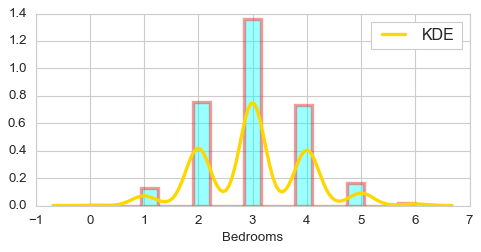

In [2095]:
sns.set_style('whitegrid') 

fig, ax = plt.subplots(1,1,figsize=(7,3))

sns.distplot(bedrooms_pd['Bedrooms'],
                 color='magenta',
                 kde_kws={"color": "gold", "lw": 3, "label": "KDE"},
                 hist_kws=
                 dict(edgecolor="red", linewidth=3, 
                               color=['cyan']),
                 axlabel='Bedrooms', ax=ax)
plt.show()

In [2096]:
# splits = [-float("inf"), -0.5, 0.0, 0.5, float("inf")]
splits_1 = [-float("inf"), 1.0, 2.0, 3.0, 4.0, 5.0, float("inf")]

# create the bucketizer transformer
# bucketizer = Bucketizer(splits=splits, inputCol="features", 
# outputCol="bucketedFeatures")

bucketizer_1 = Bucketizer(splits=splits_1, inputCol='Bedrooms',
                          outputCol="bucketedBedrooms")

# Transform original data into its bucket index.
# bucketedData = bucketizer.transform(dataFrame)
bucketedData_1 = bucketizer_1.transform(estate9)

In [2097]:
# print(sort_list(bucketedData_1))

print(matchPattern_onList(bucketedData_1, 'bucketedBedrooms'))
print(bucketedData_1[['bucketedBedrooms','bucketedBedrooms']].show(10))
print(bucketedData_1[['bucketedBedrooms']].distinct().show())

(['bucketedBedrooms'], ['81.bucketedBedrooms'])
+----------------+----------------+
|bucketedBedrooms|bucketedBedrooms|
+----------------+----------------+
|             3.0|             3.0|
|             4.0|             4.0|
|             2.0|             2.0|
|             2.0|             2.0|
|             3.0|             3.0|
|             3.0|             3.0|
|             3.0|             3.0|
|             3.0|             3.0|
|             3.0|             3.0|
|             3.0|             3.0|
+----------------+----------------+
only showing top 10 rows

None
+----------------+
|bucketedBedrooms|
+----------------+
|             0.0|
|             1.0|
|             4.0|
|             3.0|
|             2.0|
|             5.0|
+----------------+

None


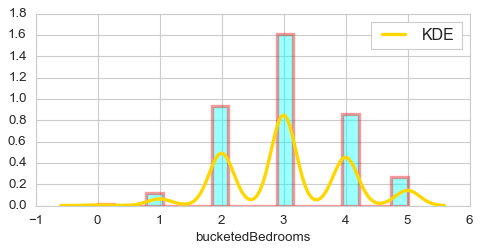

In [2098]:
bucketed_pd = bucketedData_1.sample(False, 0.7, 87).toPandas()

sns.set_style('whitegrid') 

fig, ax = plt.subplots(1,1,figsize=(7,3))

sns.distplot(bucketed_pd['bucketedBedrooms'],
                 color='magenta',
                 kde_kws={"color": "gold", "lw": 3, "label": "KDE"},
                 hist_kws=
                 dict(edgecolor="red", linewidth=3, 
                               color=['cyan']),
                 axlabel='bucketedBedrooms', ax=ax)
plt.show()

In [2099]:
print(bucketedData_1.corr('SalesClosePrice', 'bucketedBedrooms'))
print(estate9.corr('SalesClosePrice', 'Bedrooms'))

0.528922576351429
0.5296217755753759


#### OneHotEncoderEstimator

<p>
"One-hot encoding maps a categorical feature, represented as a label index, to a binary vector with at most a single one-value indicating the presence of a specific feature value from among the set of all feature values. This encoding allows algorithms which expect continuous features, such as Logistic Regression, to use categorical features. For string type input data, it is common to encode categorical features using StringIndexer first."
</p> 

<p>
"StringIndexer encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), and four ordering options are supported."
</p>


<a href="https://spark.apache.org/docs/latest/ml-features.html#onehotencoderestimator" target="_blank">OneHotEncoderEstimator</a> 

<p>
Exploring the 'SchoolDistrictNumber' variable.
</p> 

In [2100]:
print(matchPattern_onList(estate8, 'SCHOOLDISTRICTNUMBER'))
print(matchPattern_onList(estate8, 'SchoolDistrictNumber'))
# print(sort_list(estate8))

estate9[['SchoolDistrictNumber']].show(4, truncate=False)
estate9[['SchoolDistrictNumber']].distinct().count()


SchoolDistrictNumber = \
estate9.groupBy('SchoolDistrictNumber').count().\
orderBy('count')

SchoolDistrictNumber.show(truncate=False)


The expression does not match any list elements.
(['SchoolDistrictNumber'], ['10.SchoolDistrictNumber'])
+-----------------------------+
|SchoolDistrictNumber         |
+-----------------------------+
|834 - Stillwater             |
|834 - Stillwater             |
|622 - North St Paul-Maplewood|
|834 - Stillwater             |
+-----------------------------+
only showing top 4 rows

+-----------------------------+-----+
|SchoolDistrictNumber         |count|
+-----------------------------+-----+
|624 - White Bear Lake        |5    |
|832 - Mahtomedi              |6    |
|623 - Roseville              |87   |
|834 - Stillwater             |257  |
|833 - South Washington County|873  |
|622 - North St Paul-Maplewood|911  |
|625 - St. Paul               |2753 |
+-----------------------------+-----+



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
SchoolDistrictNumber    7 non-null object
count                   7 non-null int64
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


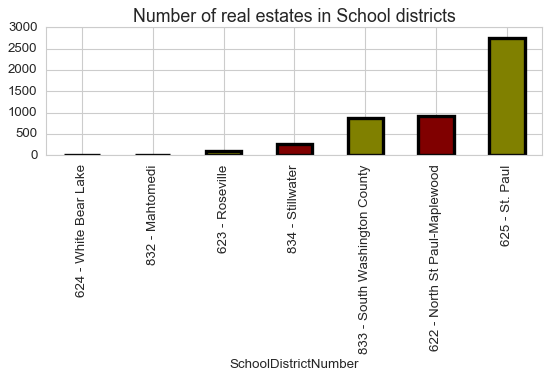

In [2101]:
SchoolDistrictNumber_pd = SchoolDistrictNumber.toPandas()
SchoolDistrictNumber_pd.info()

SchoolDistrictNumber_pd.plot.bar(x='SchoolDistrictNumber',
                                 y='count', 
                                 figsize=(8,2),
                                 color=['olive', 'maroon'],
                                 linewidth=3, edgecolor='black',
                                 legend=False, 
                                 title='Number of real estates in School districts')
plt.show()

OneHotEncoder - pipeline

In [2102]:
# from pyspark.ml.feature import OneHotEncoder, StringIndexer

stringIndexer_school = \
StringIndexer(inputCol='SchoolDistrictNumber', outputCol='schoolDN_enc')

school_df = stringIndexer_school.fit(estate9).transform(estate9)
school_cols_len = len(school_df.columns)

print(school_df.columns[-5:school_cols_len])
school_df[['SchoolDistrictNumber', 'schoolDN_enc']].\
show(5, truncate=False)
school_df[['schoolDN_enc']].printSchema()
school_df[['schoolDN_enc']].distinct().\
orderBy('schoolDN_enc').show()



['MedianHomeValue', 'Year', 'LuxuryBedrooms', 'ListWeekday_binarized', 'schoolDN_enc']
+-----------------------------+------------+
|SchoolDistrictNumber         |schoolDN_enc|
+-----------------------------+------------+
|834 - Stillwater             |3.0         |
|834 - Stillwater             |3.0         |
|622 - North St Paul-Maplewood|1.0         |
|834 - Stillwater             |3.0         |
|622 - North St Paul-Maplewood|1.0         |
+-----------------------------+------------+
only showing top 5 rows

root
 |-- schoolDN_enc: double (nullable = false)

+------------+
|schoolDN_enc|
+------------+
|         0.0|
|         1.0|
|         2.0|
|         3.0|
|         4.0|
|         5.0|
|         6.0|
+------------+



The string variable SchoolDistrictNumber was substituted 
with float numbers by the string indexer.

Below the OneHotEncoder creates dummy variables. Other than
in Pandas and Scikit the dummy variables are compressed into
one column and not stored in multiple columns added to the 
data frame. This keeps the data frame clear.

In [2103]:
school_encoder = \
OneHotEncoder(inputCol='schoolDN_enc', outputCol='schoolDN_vec')
fit_model_school = school_encoder.fit(school_df)
school_df = fit_model_school.transform(school_df)

In [2104]:
print(school_df.columns[-5:school_cols_len])
school_df[['SchoolDistrictNumber', 'schoolDN_enc', 'schoolDN_vec']].\
show(5, truncate=False)
school_df[['schoolDN_vec']].printSchema()
school_df[['schoolDN_vec']].distinct().\
orderBy('schoolDN_vec').show()


['Year', 'LuxuryBedrooms', 'ListWeekday_binarized', 'schoolDN_enc']
+-----------------------------+------------+-------------+
|SchoolDistrictNumber         |schoolDN_enc|schoolDN_vec |
+-----------------------------+------------+-------------+
|834 - Stillwater             |3.0         |(6,[3],[1.0])|
|834 - Stillwater             |3.0         |(6,[3],[1.0])|
|622 - North St Paul-Maplewood|1.0         |(6,[1],[1.0])|
|834 - Stillwater             |3.0         |(6,[3],[1.0])|
|622 - North St Paul-Maplewood|1.0         |(6,[1],[1.0])|
+-----------------------------+------------+-------------+
only showing top 5 rows

root
 |-- schoolDN_vec: vector (nullable = true)

+-------------+
| schoolDN_vec|
+-------------+
|    (6,[],[])|
|(6,[0],[1.0])|
|(6,[1],[1.0])|
|(6,[2],[1.0])|
|(6,[3],[1.0])|
|(6,[4],[1.0])|
|(6,[5],[1.0])|
+-------------+



In [2105]:
estate10 = school_df

<p>
"OneHotEncoderEstimator can transform multiple columns, returning an one-hot-encoded output vector column for each input column. It is common to merge these vectors into a single feature vector using VectorAssembler."
</p> 




In [2106]:
estate10_columns = estate10.columns
# estate10_columns

In [2107]:
estate10.select(estate10_columns[:4]).show(4)

+-----+--------------------+----------+----------+
|MLSID|       streetaddress|STREETNAME|PostalCode|
+-----+--------------------+----------+----------+
| RMLS|11511 Stillwater ...|Stillwater|     55042|
| RMLS|     11200 31st St N|      31st|     55042|
| RMLS|8583 Stillwater B...|Stillwater|     55042|
| RMLS|      9350 31st St N|      31st|     55042|
+-----+--------------------+----------+----------+
only showing top 4 rows



#### Creating a train-test-split by splitting on a date variable

In [2108]:
# print(sort_list(estate10))
af1 = matchPattern_onList(estate10, 'OFFMKTDATE')
print(af1)

af2 = matchPattern_onList(estate10, 'offmarketdate')
print(af2)

The expression does not match any list elements.
(['offmarketdate'], ['17.offmarketdate'])


In [2109]:
# from datetime import timedelta

def train_test_split_date(df, split_col, test_days=45):
  """Calculate the date to split test and training sets"""
  
  # Find how many days our data spans
  min_date = df.agg({split_col: 'min'}).collect()[0][0]
  max_date = df.agg({split_col: 'max'}).collect()[0][0]
  # Subtract an integer number of days from the last date in dataset
  split_date = max_date - timedelta(days=test_days)
  return split_date



In [2110]:
split_date = train_test_split_date(estate10, 'offmarketdate')
print(split_date)

2017-12-10


In [2111]:
train_df = estate10.where(estate10['offmarketdate'] < split_date)
test_df = estate10.where(estate10['offmarketdate'] >= split_date).\
where(estate10['LISTDATE'] <= split_date)

print(dfShape(train_df))
print(dfShape(test_df))

shape: n_rows: 4725, n_cols: 83
shape: n_rows: 151, n_cols: 83


The function 'lit' creates single values where an entire column is
expected in a function call.

In [2112]:
split_date = to_date(lit('2017-12-10'))
print(split_date)

Column<b"to_date('2017-12-10')">


In [2113]:
# Create Sequential Test set
test_df_133 = \
estate10.where(estate10['offmarketdate'] >= split_date).\
where(estate10['LISTDATE'] <= split_date)

In [2114]:
# Create a copy of DAYSONMARKET to review later
test_df_244 = \
test_df_133.withColumn('DAYSONMARKET_Original', 
                       test_df_133['DAYSONMARKET'])

In [2115]:
# Recalculate DAYSONMARKET from what we know on our split date
test_df_244 = \
test_df_244.withColumn('DAYSONMARKET', datediff(split_date, 'LISTDATE'))

In [2116]:
# Review the difference
test_df_244[['LISTDATE', 'offmarketdate', 
             'DAYSONMARKET_Original', 'DAYSONMARKET']].show(5)

+----------+-------------+---------------------+------------+
|  LISTDATE|offmarketdate|DAYSONMARKET_Original|DAYSONMARKET|
+----------+-------------+---------------------+------------+
|2017-10-06|   2018-01-24|                  110|          65|
|2017-11-07|   2017-12-12|                   35|          33|
|2017-10-30|   2017-12-11|                   42|          41|
|2017-07-14|   2017-12-19|                  158|         149|
|2017-10-25|   2017-12-20|                   45|          46|
+----------+-------------+---------------------+------------+
only showing top 5 rows



#### Dimensionaly reduction

by dropping variables with null values above a threshold.

#### Count of Missing (NaN,Na) and null values in Pyspark

<p>
"Count of Missing and null values in pyspark can be accomplished using isnan()  function and isNull() function respectively. isnan() function returns the count of missing values of column in pyspark – (nan, na) .  isnull() function returns the count of null values of column in pyspark."
</p> 

<a href="http://www.datasciencemadesimple.com/count-of-missing-nanna-and-null-values-in-pyspark/" target="_blank">DataScience Made Simple
</a> 

<p>
df_orders.select([count(when(isnan(c), c)).alias(c) for c in df_orders.columns]).show()
</p> 



In [2117]:
# sort_list(estate10)

In [2118]:
estate10.select([count(when(isnan('DAYSONMARKET'),True))]).\
collect()[0][0]

0

In [2119]:
estate10.select([count(when(isnan('DAYSONMARKET').\
                            isNull() , True))]).collect()

[Row(count(CASE WHEN (isnan(DAYSONMARKET) IS NULL) THEN true END)=0)]

In [2120]:
estate10.select([count(when(isnan('DAYSONMARKET').\
                            isNull() , True))]).collect()[0][0]

0

In [2121]:
estate10.select('TAXYEAR').printSchema()
estate10.select([count(when(isnan('TAXYEAR').isNull() , True))]).show()

root
 |-- TAXYEAR: integer (nullable = true)

+-------------------------------------------------------+
|count(CASE WHEN (isnan(TAXYEAR) IS NULL) THEN true END)|
+-------------------------------------------------------+
|                                                      0|
+-------------------------------------------------------+



In [2122]:
from pyspark.sql.functions import col, trim, lower
estate10.select('LISTDATE').printSchema()
# estate10.select([count(when(isnan('LISTDATE').isNull() , True))]).show()
estate10.select([count(when(col('LISTDATE').isNull(),True))]).show()

root
 |-- LISTDATE: date (nullable = true)

+-------------------------------------------------+
|count(CASE WHEN (LISTDATE IS NULL) THEN true END)|
+-------------------------------------------------+
|                                                0|
+-------------------------------------------------+



In [2123]:
col

<function pyspark.sql.functions._create_function.<locals>._(col)>

In [2124]:
# Here was this error
# PySpark: TypeError: 'str' object is not callable in dataframe operations
# Possible that col was overwritten and this caused this error
# Importing the functions here again overwrites again this error
# https://stackoverflow.com/questions/57705164/pyspark-typeerror-str-object-is-not-callable-in-dataframe-operations
from pyspark.sql.functions import col, trim, lower

nullValues_10 = estate10.select([count(when(col(c).isNull(), c)).alias(c) \
                                 for c in estate10.columns])

nullValues_10_cols = nullValues_10.columns

nullValues_10.select(nullValues_10_cols[0:5]).show()
nullValues_10.select(nullValues_10_cols[6:11]).show()

+-----+-------------+----------+----------+---------------+
|MLSID|streetaddress|STREETNAME|PostalCode|StateOrProvince|
+-----+-------------+----------+----------+---------------+
|    0|            0|         0|         0|              0|
+-----+-------------+----------+----------+---------------+

+---------------+--------+---------+--------+-----------------+
|SalesClosePrice|LISTDATE|LISTPRICE|LISTTYPE|OriginalListPrice|
+---------------+--------+---------+--------+-----------------+
|              0|       0|        0|       0|                0|
+---------------+--------+---------+--------+-----------------+



In [2125]:
# from pyspark.sql.functions import col,sum

nullValues_10 = \
estate10.select(*(sum(col(c).isNull().cast("int")).alias(c) 
                  for c in estate10.columns))


In [2126]:
nullValues_10_cols = nullValues_10.columns

nullValues_10.select(nullValues_10_cols[:5]).show()
nullValues_10.select(nullValues_10_cols[19:25]).show()

+-----+-------------+----------+----------+---------------+
|MLSID|streetaddress|STREETNAME|PostalCode|StateOrProvince|
+-----+-------------+----------+----------+---------------+
|    0|            0|         0|         0|              0|
+-----+-------------+----------+----------+---------------+

+---------+--------+----+----------+------------------+----+
|RoomArea4|roomtype|ROOF|RoomFloor4|PotentialShortSale|PDOM|
+---------+--------+----+----------+------------------+----+
|      298|       0| 751|       151|                 0|   0|
+---------+--------+----+----------+------------------+----+



In [2127]:


cols_greater_30 = []

for i in nullValues_10.columns:
    nNull = nullValues_10.select(i).collect()[0][0]
    if nNull >= 30:
        cols_greater_30.append(i)
        
        
print(cols_greater_30)    

['FENCE', 'RoomArea4', 'ROOF', 'RoomFloor4', 'RoomFloor1', 'RoomArea1', 'APPLIANCES', 'ROOMFAMILYCHAR', 'RoomArea3', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7']


Removing columns with less than 50 observations.

In [2128]:
estate11 = estate10.drop(*cols_greater_30)

print(dfShape(estate10))
print(dfShape(estate11))

shape: n_rows: 4892, n_cols: 83
shape: n_rows: 4892, n_cols: 63


#### Mapping numeric values to string variables using StringIndexer

In [2129]:
# sort_list(estate10)
# the variable City is a string
estate11.select('City', 'Exterior', 'BASEMENT').show(5)

+----------------+------------+--------------------+
|            City|    Exterior|            BASEMENT|
+----------------+------------+--------------------+
|LELM - Lake Elmo|       Vinyl|                Full|
|LELM - Lake Elmo|       Vinyl|Full, Partial Fin...|
|LELM - Lake Elmo|Cement Board|Full, Crawl Space...|
|LELM - Lake Elmo|      Stucco|Full, Partial Fin...|
|LELM - Lake Elmo|       Vinyl|Walkout, Full, Fi...|
+----------------+------------+--------------------+
only showing top 5 rows



In [2130]:
# dtypes gives tuples as pairs consisting of colname and dtype
# 0: colname, 1: dtype
categoricalVariables = \
[i[0] for i in estate11.dtypes if i[1].startswith('string')]

print(columnList)

['MLSID', 'streetaddress', 'STREETNAME', 'StateOrProvince', 'City', 'LISTTYPE', 'MapLetter', 'SchoolDistrictNumber', 'roomtype', 'PotentialShortSale', 'GarageDescription', 'ZONING', 'STYLE', 'CoolingDescription', 'EXTERIOR', 'BASEMENT', 'RoomArea8', 'ASSESSMENTPENDING']


In [2131]:
date_cols = [i[0] for i in estate11.dtypes if i[1].startswith('date')]
date_cols

['LISTDATE', 'offmarketdate']

In [2132]:
from pyspark.ml import Pipeline

# Replace missing values
estate12 = estate11.fillna(-1, subset=['WALKSCORE', 'BIKESCORE'])

In [2133]:
# Create list of StringIndexers using list comprehension
indexers = [StringIndexer(inputCol=i, outputCol=i+"_IDX")\
            .setHandleInvalid("keep") for i in categoricalVariables ]


In [2134]:
# Create pipeline of indexers
indexer_pipeline = Pipeline(stages=indexers)


In [2135]:
# Fit and Transform the pipeline to the original data
estate12_indexed = \
indexer_pipeline.fit(estate12).transform(estate12)
# estate12_indexed.dtypes

In [2136]:
# Clean up redundant columns
estate12_indexed = estate12_indexed.drop(*categoricalVariables )
estate12_indexed = estate12_indexed.drop(*date_cols)
# Inspect data transformations
print(estate12_indexed.dtypes)

[('PostalCode', 'int'), ('SalesClosePrice', 'int'), ('LISTPRICE', 'int'), ('OriginalListPrice', 'int'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'int'), ('DAYSONMARKET', 'int'), ('Fireplaces', 'int'), ('PDOM', 'int'), ('SQFTABOVEGROUND', 'int'), ('Taxes', 'int'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'int'), ('LivingArea', 'int'), ('YEARBUILT', 'int'), ('ACRES', 'double'), ('BathsFull', 'int'), ('BathsHalf', 'int'), ('BATHQUARTER', 'int'), ('BATHSTHREEQUARTER', 'int'), ('BATHSTOTAL', 'int'), ('Bedrooms', 'double'), ('SQFTBELOWGROUND', 'int'), ('AssociationFee', 'int'), ('AssessedValuation', 'double'), ('estate_area', 'double'), ('frontYard', 'double'), ('valList', 'double'), ('sqftSum', 'int'), ('Bath_perSQFT', 'double'), ('taxes_split', 'int'), ('countableEntities', 'int'), ('ListWeekday', 'double'), ('offMonth', 'int'), ('newHouses', 'int'), ('listYear', 'int'), ('reportYear', 'int'), ('MedianHomeValue', 'int'), ('Year', 'int'), ('LuxuryBedrooms', 'double'), ('ListWeekd

In [2137]:
estate12_indexed.printSchema()

root
 |-- PostalCode: integer (nullable = true)
 |-- SalesClosePrice: integer (nullable = true)
 |-- LISTPRICE: integer (nullable = true)
 |-- OriginalListPrice: integer (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: integer (nullable = true)
 |-- DAYSONMARKET: integer (nullable = true)
 |-- Fireplaces: integer (nullable = true)
 |-- PDOM: integer (nullable = true)
 |-- SQFTABOVEGROUND: integer (nullable = true)
 |-- Taxes: integer (nullable = true)
 |-- TAXWITHASSESSMENTS: double (nullable = true)
 |-- TAXYEAR: integer (nullable = true)
 |-- LivingArea: integer (nullable = true)
 |-- YEARBUILT: integer (nullable = true)
 |-- ACRES: double (nullable = true)
 |-- BathsFull: integer (nullable = true)
 |-- BathsHalf: integer (nullable = true)
 |-- BATHQUARTER: integer (nullable = true)
 |-- BATHSTHREEQUARTER: integer (nullable = true)
 |-- BATHSTOTAL: integer (nullable = true)
 |-- Bedrooms: double (nullable = true)
 |-- SQFTBELOWGROUND: integer (nullab

In [2138]:
estate12_indexed.select('LISTTYPE_IDX', 
                        'SchoolDistrictNumber_IDX','City_IDX').show(5)

+------------+------------------------+--------+
|LISTTYPE_IDX|SchoolDistrictNumber_IDX|City_IDX|
+------------+------------------------+--------+
|         0.0|                     3.0|     4.0|
|         0.0|                     3.0|     4.0|
|         0.0|                     1.0|     4.0|
|         0.0|                     3.0|     4.0|
|         0.0|                     1.0|     4.0|
+------------+------------------------+--------+
only showing top 5 rows



# Developing Machine Learning models

<p>
As explained in the summary the goal of this project is not to 
develop machine learning models, but to examine the possibilities
of data preprocessing in Pyspark with a particular interest in
feature engineering. However the data preprocessing process leads
to building machine learning models on top of it. 
Two machine learning are applied here.
</p> 

## Base model: RandomForestRegressor 

<p>
<b>According to Scikit:</b><br>
"A random forest is a meta estimator that fits a number of 
classifying decision trees on various sub-samples of the dataset 
and uses averaging to improve the predictive accuracy and control 
over-fitting. The sub-sample size is controlled with 
the max_samples parameter if bootstrap=True (default), 
otherwise the whole dataset is used to build each tree."
</p> 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html" target="_blank">sklearn.ensemble.RandomForestRegressor</a> 

<p>
The Pyspark implementation goes like this:
</p> 

<p>
class pyspark.ml.regression.RandomForestRegressor(featuresCol='features', labelCol='label', predictionCol='prediction', maxDepth=5, maxBins=32, minInstancesPerNode=1, minInfoGain=0.0, maxMemoryInMB=256, cacheNodeIds=False, checkpointInterval=10, impurity='variance', subsamplingRate=1.0, seed=None, numTrees=20, featureSubsetStrategy='auto')
</p> 
<a href=https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.RandomForestRegressor target="_blank">pyspark.ml package</a> 



In [2139]:
estate13_modeling =  estate12_indexed

In [2140]:
# replacing missing values with -1
estate13_modeling = estate13_modeling.fillna(-1)

In [2141]:
featureColumns_1 = list(estate13_modeling.columns)
featureColumns_1.remove('SalesClosePrice')

### VectorAssembler

<p>
VectorAssembler is a transformer that combines a given list of 
columns into a single vector column. It is useful for combining
raw features and features generated by different feature transformers 
into a single feature vector, in order to train ML models like logistic 
regression and decision trees. 
</p> 

<a href="https://spark.apache.org/docs/latest/ml-features.html#vectorassembler" target="_blank">MLlib</a> 



In [2142]:
# generating a vector assembler
vector_1 = \
VectorAssembler(inputCols=featureColumns_1, outputCol='features_1')

vector_1

VectorAssembler_4693b38ee11d

In [2143]:
estate14_vectorized = vector_1.transform(estate14_vectorized)

IllegalArgumentException: Output column features_1 already exists.

In [ ]:
# Select response variable and the feature vectors from all columns
estate142 = \
estate14_vectorized.select(['SALESCLOSEPRICE', 'features_1'])


estate142.show(1)

### RandomForestRegressor - model 1

This data frame contains feature vectors and the response variable.
The data frame works with a machine learning model.

In [ ]:
randomreg_1 = \
RandomForestRegressor(featuresCol='features_1',
                     labelCol='SalesClosePrice',
                     predictionCol='price_predicted',
                     seed=56)

In [ ]:
# model is trained here without train-test-split
model_1 = randomreg_1.fit(estate14_vectorized)
model_1

In [ ]:
# predictions = model.transform(test_df)
predictions_1 = model_1.transform(estate14_vectorized)

In [ ]:
predictions_1.select('price_predicted', 'SalesClosePrice').show(5)

### Model Evaluation 1

In [ ]:
# from pyspark.ml.evaluation import RegressionEvaluator

# Construct evaluator
evaluator_1 = RegressionEvaluator(labelCol='SalesClosePrice', 
                                predictionCol='price_predicted')

rmse_1 = \
evaluator_1.evaluate(predictions_1 , {evaluator_1.metricName: 'rmse'})

r2_1 = \
evaluator_1.evaluate(predictions_1, {evaluator_1.metricName: 'r2'})

In [ ]:
print("RandomForestRegressionModel: RMSE: {}".format(rmse_1))
print("RandomForestRegressionModel: R^2: {}".format(r2_1))

### Gradient Boosted Trees - model 2

In [ ]:

# from pyspark.ml.regression import GBTRegressor
# Train a Gradient Boosted Trees (GBT) model.
gbt_2 = \
GBTRegressor(featuresCol='features_1',
             labelCol='SalesClosePrice',
             predictionCol='price_predicted',
             seed=97)

In [ ]:
model_2 = gbt_2.fit(estate14_vectorized)

In [ ]:
predictions_2 = model_2.transform(estate14_vectorized)
predictions_2.select('price_predicted', 'SalesClosePrice').show(5)

### Model evaluation - 2

In [ ]:
# from pyspark.ml.evaluation import RegressionEvaluator

# Construct evaluator
evaluator_2 = \
RegressionEvaluator(labelCol='SalesClosePrice', 
                    predictionCol='price_predicted')

rmse_2 = \
evaluator_2.evaluate(predictions_2 , {evaluator_2.metricName: 'rmse'})

r2_2 = \
evaluator_2.evaluate(predictions_2, {evaluator_2.metricName: 'r2'})

In [ ]:
print("RandomForestRegressionModel: RMSE: {}".format(rmse_2))
print("RandomForestRegressionModel: R^2: {}".format(r2_2))

The GBT model performs better.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Select columns to compute test error
evaluator = RegressionEvaluator(labelCol='SALESCLOSEPRICE', 
                                predictionCol='Prediction_Price')
# Dictionary of model predictions to loop over
models = {'Gradient Boosted Trees': gbt_predictions, 
          'Random Forest Regression': rfr_predictions}
for key, preds in models.items():
  # Create evaluation metrics
  rmse = evaluator.evaluate(preds , {evaluator.metricName: 'rmse'})
  r2 = evaluator.evaluate(preds , {evaluator.metricName: 'r2'})
  
  # Print Model Metrics
  print(key + ' RMSE: ' + str(rmse))
  print(key + ' R^2: ' + str(r2))